# Import the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.utils import resample
import os
import re
%matplotlib inline

# Connecting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import files

In [ ]:
folder_path = '/content/drive/MyDrive/EC439/CSV Data'
all_files = os.listdir(folder_path)

# Creating and Cleaning DataFrames

## Price History DataFrame

In [ ]:
ph_files = [f for f in all_files if f.endswith('.csv') and 'Price History' in f]

ph_dfs = {}
for file in ph_files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
            if 'Exchange Date' in line:
                skiprows = i
                break
        else:
            skiprows = 0  # If 'Exchange Date' not found, don't skip any rows
    ph_dfs[file] = pd.read_csv(file_path, skiprows=skiprows)

In [ ]:
print("There is amount of files:", len(ph_dfs.keys()))
ph_dfs["AKR.Price History (STARK).csv"].head()

There is amount of files: 18


,Exchange Date,Close,Net,%Chg,Open,Low,High,Volume,Turnover - THB,Flow,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,27-ก.ย.-2024,0.96,0.01,+1.05%,0.95,0.95,0.98,"3,590,000","3,450,017.00","12,750,049,352.00",NaN,NaN,NaN,NaN,NaN,NaN
1,20-ก.ย.-2024,0.95,0.01,+1.06%,0.95,0.93,0.98,"11,836,300","11,337,320.00","12,746,599,335.00",NaN,NaN,NaN,NaN,NaN,NaN
2,13-ก.ย.-2024,0.94,0.01,+1.08%,0.94,0.91,0.97,"15,850,800","14,971,829.00","12,735,262,015.00",NaN,NaN,NaN,NaN,NaN,NaN
3,06-ก.ย.-2024,0.93,0.03,+3.33%,0.91,0.88,0.93,"10,390,600","9,478,282.00","12,720,290,186.00",NaN,NaN,NaN,NaN,NaN,NaN
4,30-ส.ค.-2024,0.90,0.02,+2.27%,0.89,0.88,0.92,"8,502,700","7,661,700.00","12,710,811,904.00",NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for key in ph_dfs:
    ph_dfs[key] = ph_dfs[key][['Exchange Date', 'Close']]

ph_dfs["AKR.Price History (STARK).csv"].head(10)

,Exchange Date,Close
0,27-ก.ย.-2024,0.96
1,20-ก.ย.-2024,0.95
2,13-ก.ย.-2024,0.94
3,06-ก.ย.-2024,0.93
4,30-ส.ค.-2024,0.90
5,23-ส.ค.-2024,0.88
6,16-ส.ค.-2024,0.85
7,09-ส.ค.-2024,0.85
8,02-ส.ค.-2024,0.85
9,26-ก.ค.-2024,0.87


In [ ]:
for key, df in ph_dfs.items():
    print(f"File: {key}")
    nan_counts = df.isna().sum()
    columns_with_na = nan_counts[nan_counts > 0]
    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
    print("-" * 20)  # Separator between files

File: AKR.Price History (STARK).csv
--------------------
File: ACE.Price History (EA).csv
--------------------
File: BBGI.Price History (EA).csv
--------------------
File: BCPG.Price History (EA).csv
--------------------
File: CKP.Price History (EA).csv
--------------------
File: CPT.Price History (STARK).csv
--------------------
File: EA.Price History.csv
--------------------
File: ETC.Price History (EA).csv
--------------------
File: LNE.Price History (STARK).csv
--------------------
File: SCI.Price History (STARK).csv
--------------------
File: SPCG.Price History (EA).csv
--------------------
File: SSP.Price History (EA).csv
--------------------
File: STARK.Price History.csv
Column 'Close' has 4 NaN values.
--------------------
File: SUPER.Price History (EA).csv
--------------------
File: TGE.Price History (EA).csv
--------------------
File: TMIm.Price History (STARK).csv
--------------------
File: TPIPP.Price History (EA).csv
--------------------
File: TRTm.Price History (STARK).cs

In [ ]:
ph_dfs["STARK.Price History.csv"].head(10)

,Exchange Date,Close
0,06-ก.ย.-2024,0.01
1,30-ส.ค.-2024,0.01
2,23-ส.ค.-2024,0.01
3,28-ก.ค.-2023,NaN
4,21-ก.ค.-2023,NaN
5,14-ก.ค.-2023,NaN
6,07-ก.ค.-2023,NaN
7,30-มิ.ย.-2023,0.02
8,23-มิ.ย.-2023,0.02
9,16-มิ.ย.-2023,0.08


In [ ]:
for key in ph_dfs:
    ph_dfs[key]['Close'] = pd.to_numeric(ph_dfs[key]['Close'], errors='coerce').fillna(0)

In [ ]:
for key, df in ph_dfs.items():
    print(f"File: {key}")
    nan_counts = df.isna().sum()
    columns_with_na = nan_counts[nan_counts > 0]
    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
    print("-" * 20)  # Separator between files

File: AKR.Price History (STARK).csv
--------------------
File: ACE.Price History (EA).csv
--------------------
File: BBGI.Price History (EA).csv
--------------------
File: BCPG.Price History (EA).csv
--------------------
File: CKP.Price History (EA).csv
--------------------
File: CPT.Price History (STARK).csv
--------------------
File: EA.Price History.csv
--------------------
File: ETC.Price History (EA).csv
--------------------
File: LNE.Price History (STARK).csv
--------------------
File: SCI.Price History (STARK).csv
--------------------
File: SPCG.Price History (EA).csv
--------------------
File: SSP.Price History (EA).csv
--------------------
File: STARK.Price History.csv
--------------------
File: SUPER.Price History (EA).csv
--------------------
File: TGE.Price History (EA).csv
--------------------
File: TMIm.Price History (STARK).csv
--------------------
File: TPIPP.Price History (EA).csv
--------------------
File: TRTm.Price History (STARK).csv
--------------------


In [ ]:
for key in ph_dfs:
    # Extract company name using regular expression
    company_name = re.search(r'(.*)\.Price History', key).group(1)

    # Add 'Company name' column
    ph_dfs[key]['Company name'] = company_name

In [ ]:
for key in ph_dfs:
    # Add 'Fraud' column and initialize to 0
    ph_dfs[key]['Fraud'] = 0

    # Set 'Fraud' to 1 for specific companies
    company_name = ph_dfs[key]['Company name'].iloc[0]  # Get company name
    if company_name in ['EA', 'STARK']:
        ph_dfs[key]['Fraud'] = 1

In [ ]:
ph_dfs['STARK.Price History.csv'].head(10)

,Exchange Date,Close,Company name,Fraud
0,06-ก.ย.-2024,0.01,STARK,1
1,30-ส.ค.-2024,0.01,STARK,1
2,23-ส.ค.-2024,0.01,STARK,1
3,28-ก.ค.-2023,0.00,STARK,1
4,21-ก.ค.-2023,0.00,STARK,1
5,14-ก.ค.-2023,0.00,STARK,1
6,07-ก.ค.-2023,0.00,STARK,1
7,30-มิ.ย.-2023,0.02,STARK,1
8,23-มิ.ย.-2023,0.02,STARK,1
9,16-มิ.ย.-2023,0.08,STARK,1


In [ ]:
def parse_thai_date(date_str):
        thai_months = {"ม.ค.": "Jan", "ก.พ.": "Feb", "มี.ค.": "Mar", "เม.ย.": "Apr",
                       "พ.ค.": "May", "มิ.ย.": "Jun", "ก.ค.": "Jul", "ส.ค.": "Aug",
                       "ก.ย.": "Sep", "ต.ค.": "Oct", "พ.ย.": "Nov", "ธ.ค.": "Dec"}
        for thai, eng in thai_months.items():
            date_str = date_str.replace(thai, eng)
        return pd.to_datetime(date_str, format='%d-%b-%Y', errors='coerce')

for key in ph_dfs:
    ph_dfs[key]['Exchange Date'] = ph_dfs[key]['Exchange Date'].apply(parse_thai_date)

In [ ]:
ph_dfs['STARK.Price History.csv'].head(10)

,Exchange Date,Close,Company name,Fraud
0,2024-09-06,0.01,STARK,1
1,2024-08-30,0.01,STARK,1
2,2024-08-23,0.01,STARK,1
3,2023-07-28,0.00,STARK,1
4,2023-07-21,0.00,STARK,1
5,2023-07-14,0.00,STARK,1
6,2023-07-07,0.00,STARK,1
7,2023-06-30,0.02,STARK,1
8,2023-06-23,0.02,STARK,1
9,2023-06-16,0.08,STARK,1


In [ ]:
# Resample weekly data to daily data
for key, df in ph_dfs.items():

    # Set 'Exchange Date' as index and resample
    df.set_index('Exchange Date', inplace=True)
    df_resampled = df.resample('D').ffill()  # 'D' for daily, ffill to forward fill values

    # Reset index (optional, if you want 'Exchange Date' as a column again)
    df_resampled.reset_index(inplace=True)

    # Update the original DataFrame in ph_dfs
    ph_dfs[key] = df_resampled

In [ ]:
ph_dfs['STARK.Price History.csv']

,Exchange Date,Close,Company name,Fraud
0,2014-09-12,3.23,STARK,1
1,2014-09-13,3.23,STARK,1
2,2014-09-14,3.23,STARK,1
3,2014-09-15,3.23,STARK,1
4,2014-09-16,3.23,STARK,1
...,...,...,...,...
3643,2024-09-02,0.01,STARK,1
3644,2024-09-03,0.01,STARK,1
3645,2024-09-04,0.01,STARK,1
3646,2024-09-05,0.01,STARK,1


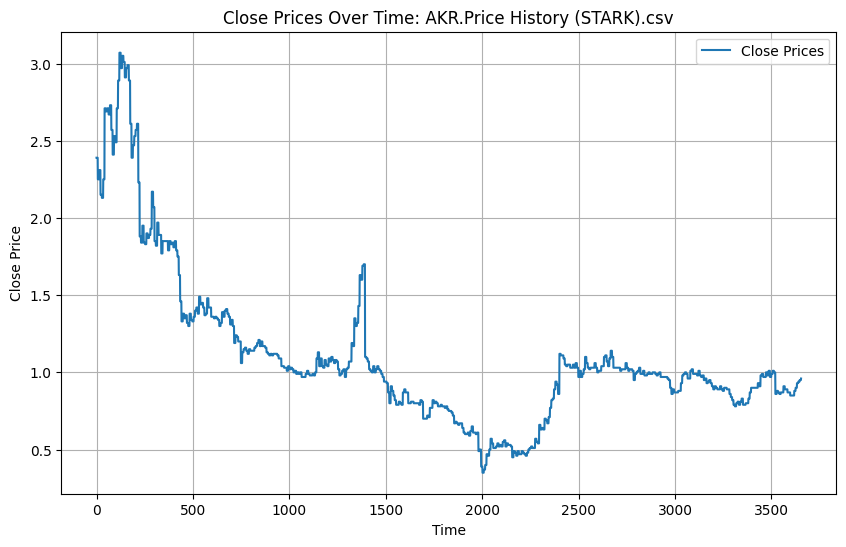

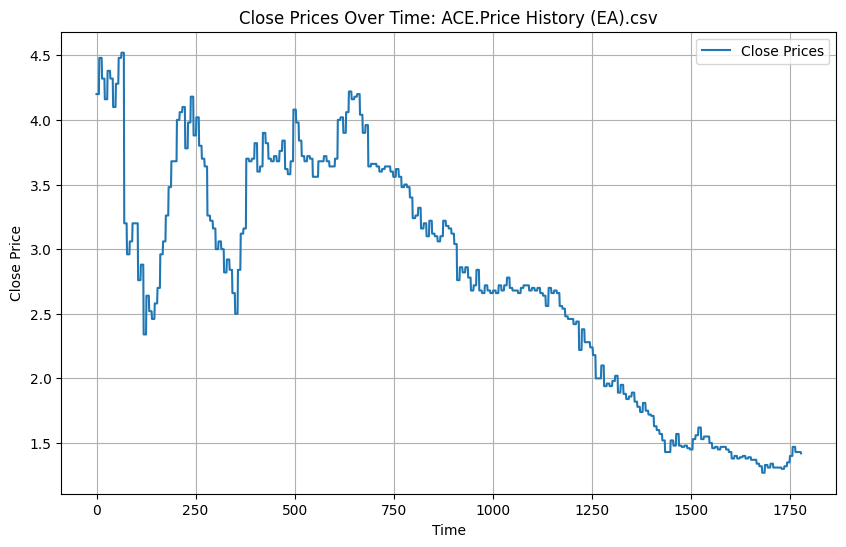

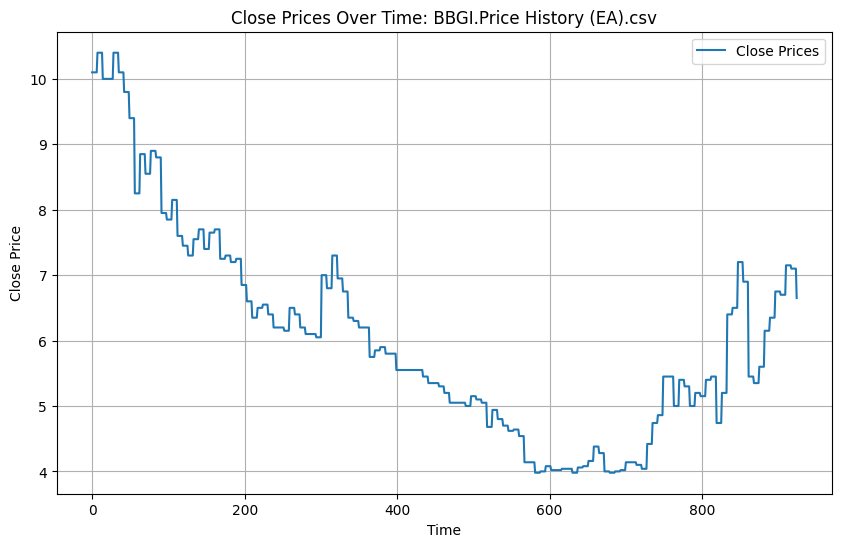

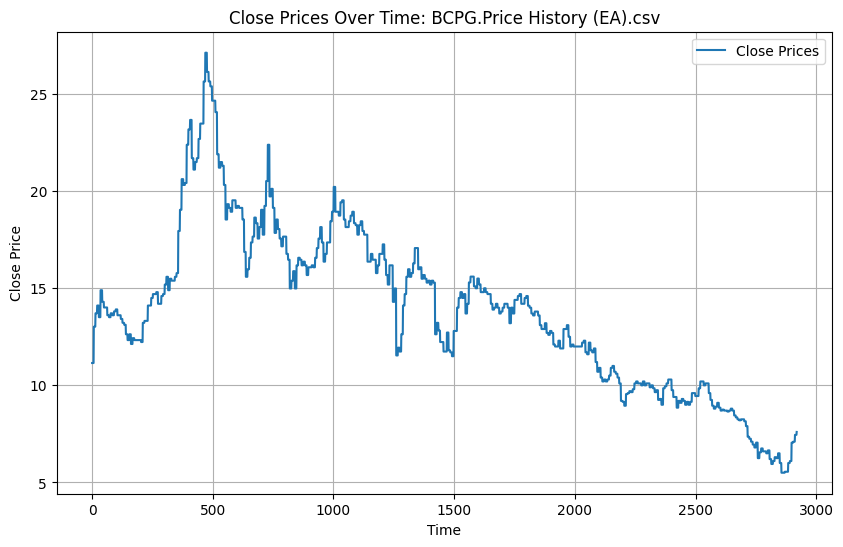

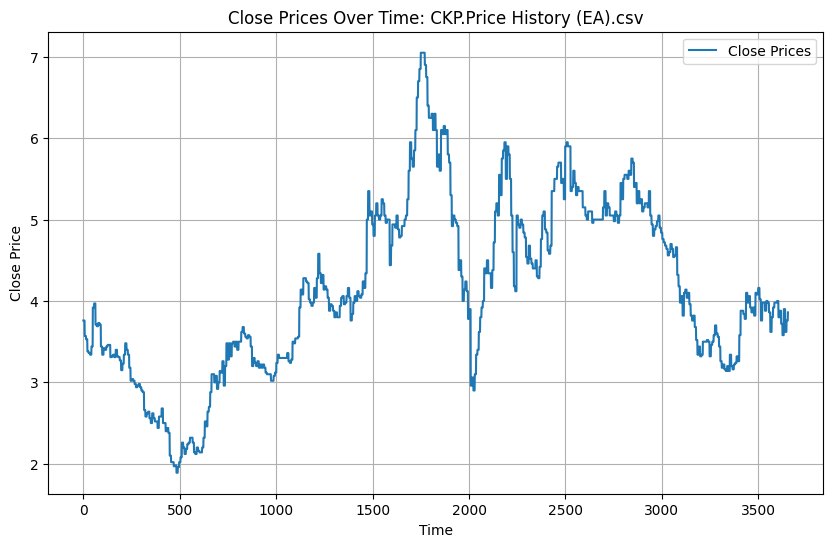

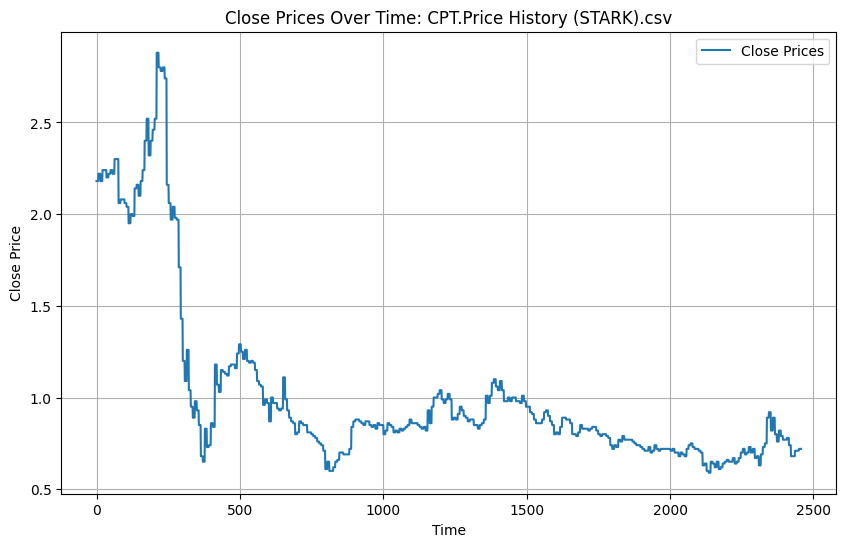

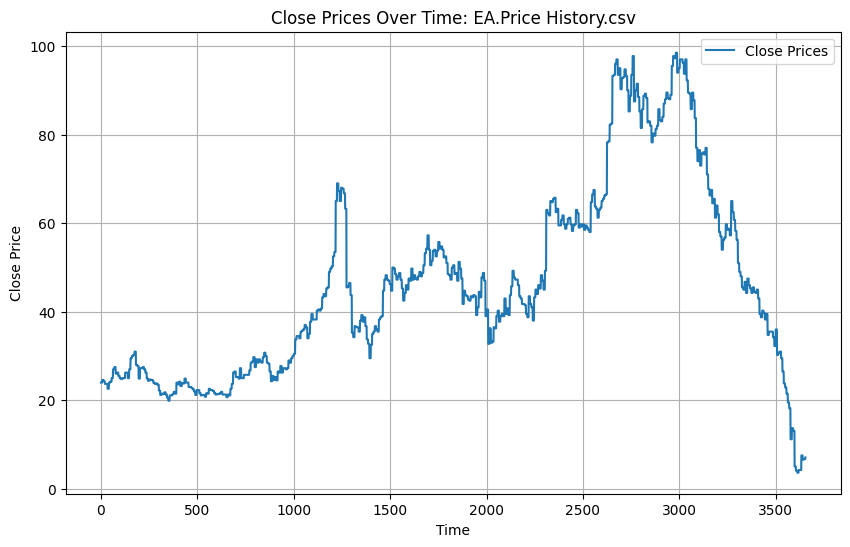

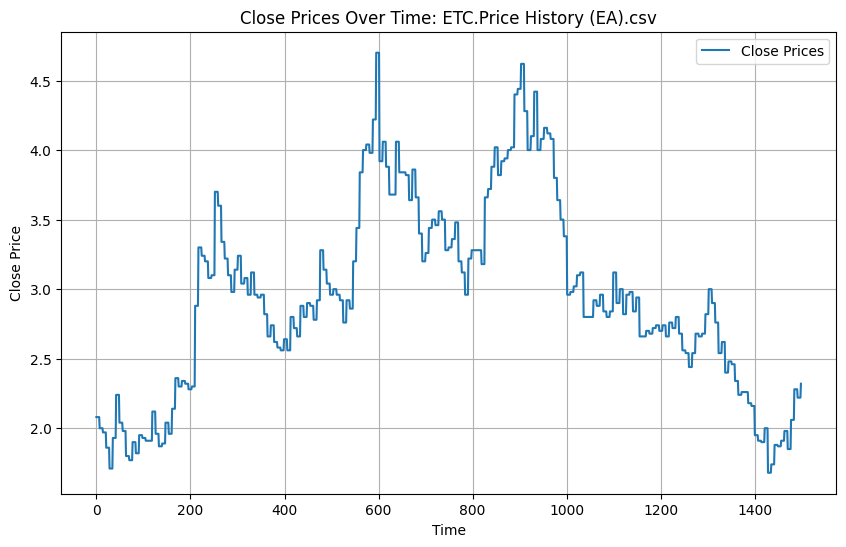

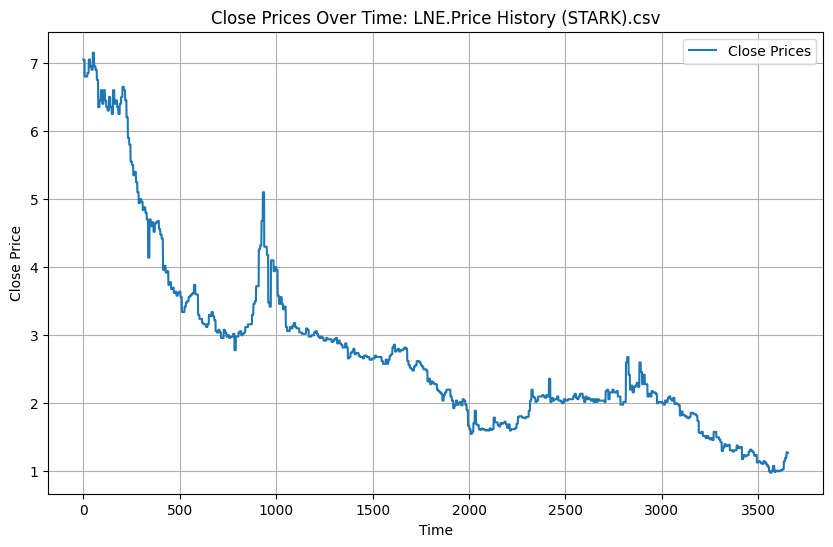

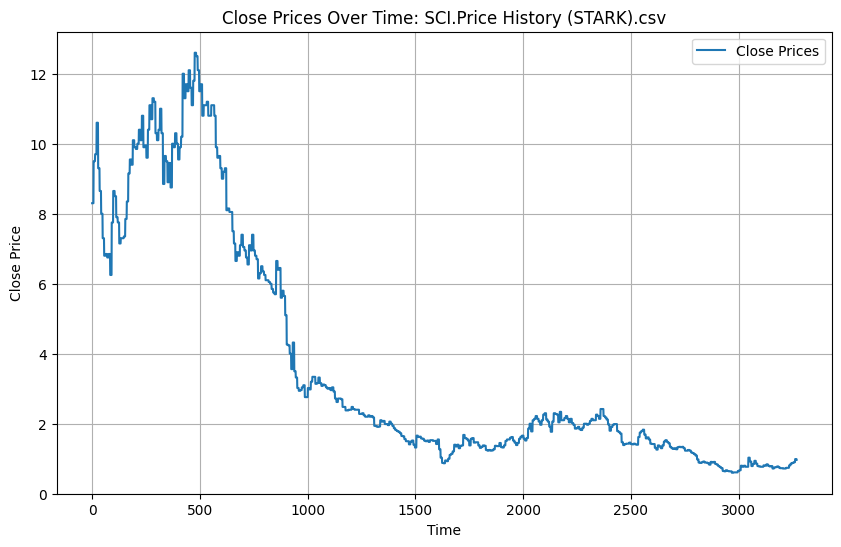

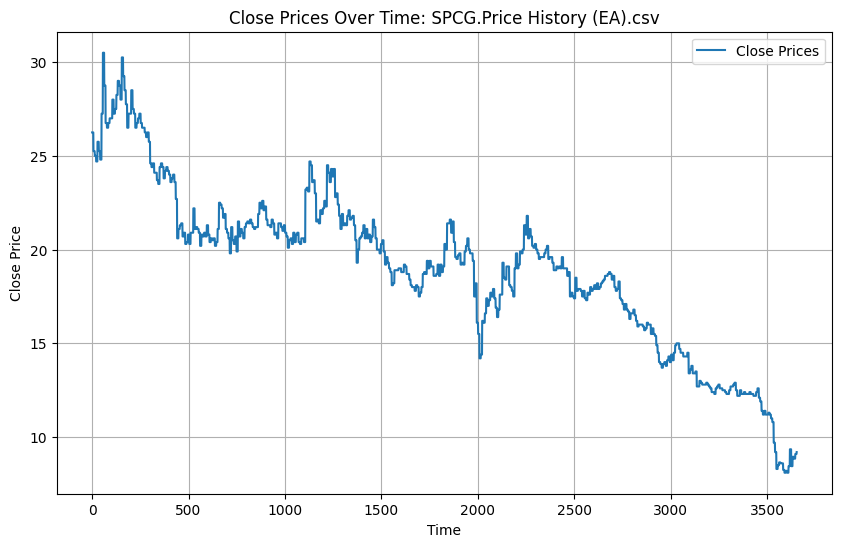

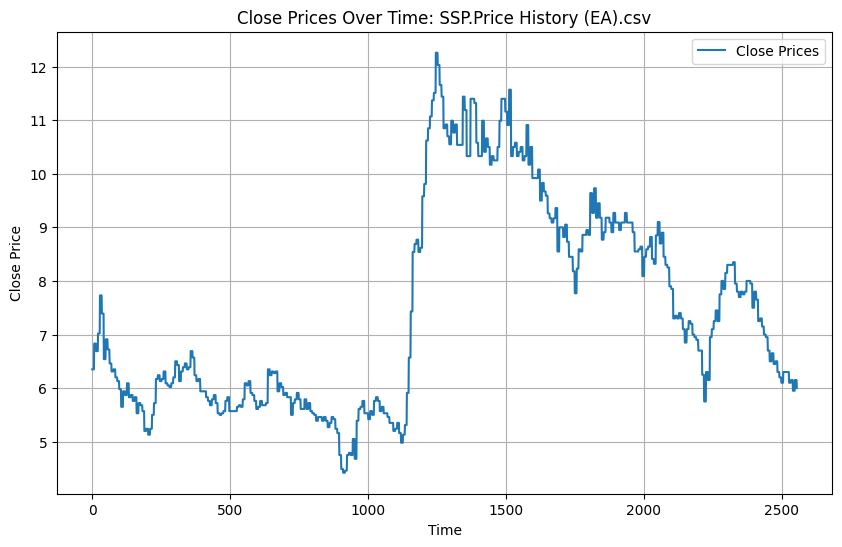

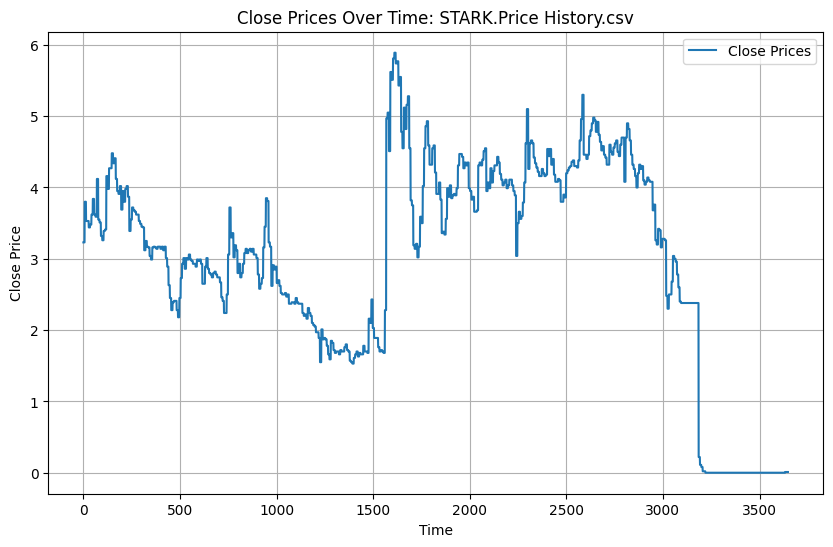

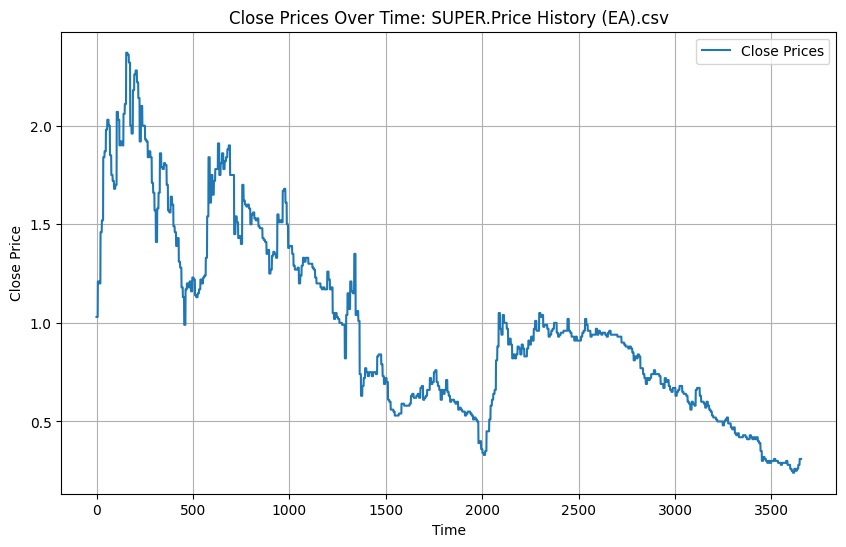

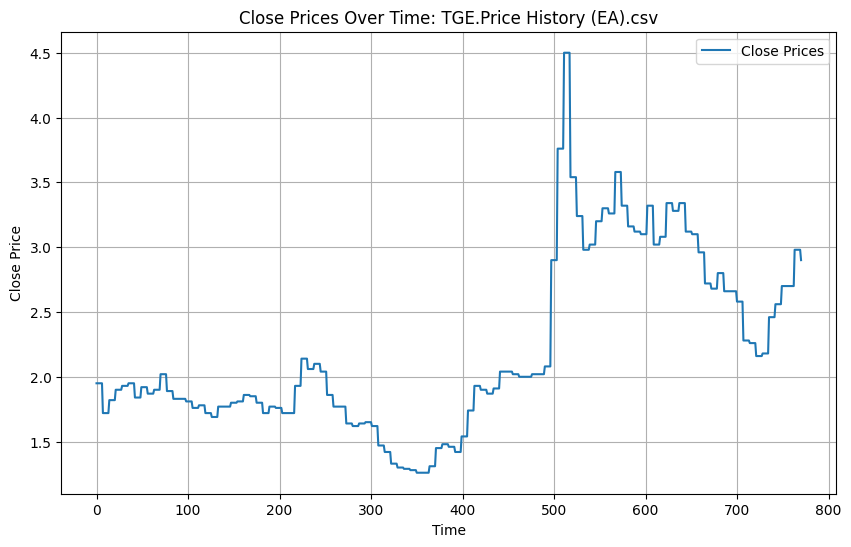

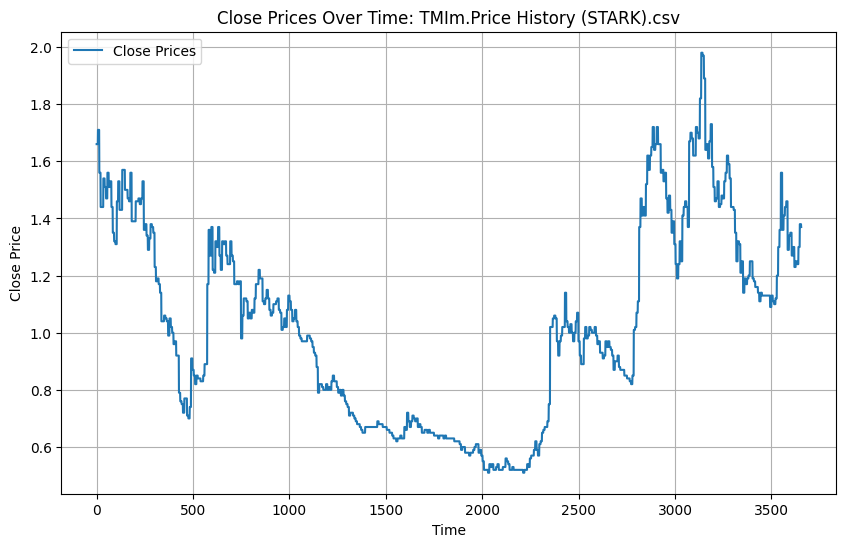

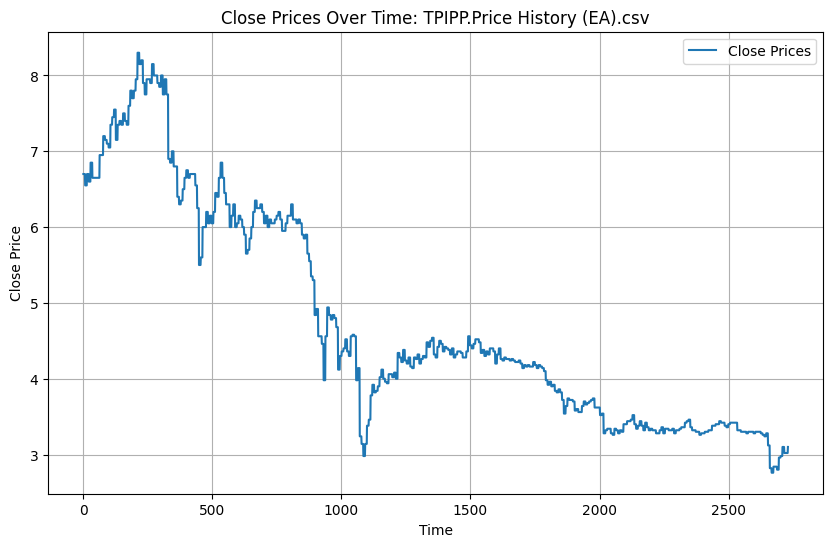

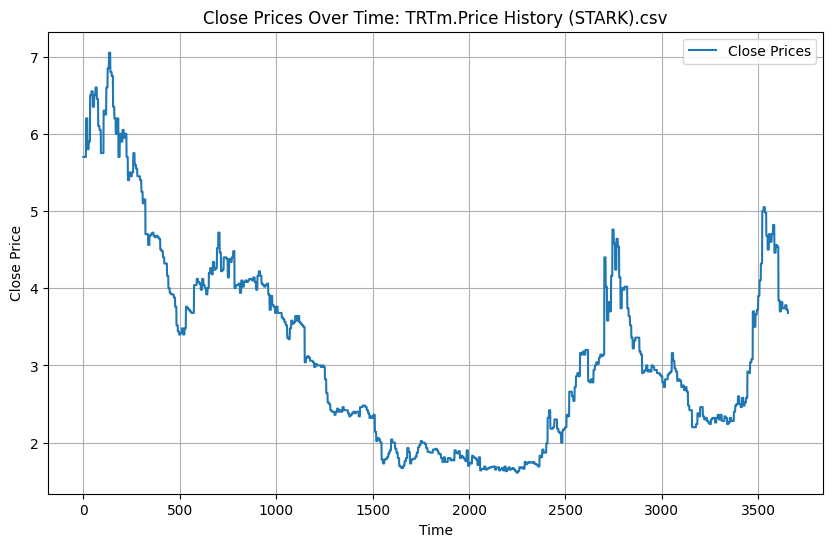

In [ ]:
# Loop through each DataFrame in ph_dfs
for key, df in ph_dfs.items():
    if 'Close' in df.columns:  # ตรวจสอบว่าคอลัมน์ 'Close' มีอยู่ใน DataFrame หรือไม่
        plt.figure(figsize=(10, 6))  # ตั้งค่าขนาดของกราฟ
        plt.plot(df['Close'], label='Close Prices')
        plt.title(f'Close Prices Over Time: {key}')
        plt.xlabel('Time')
        plt.ylabel('Close Price')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"'Close' column not found in {key}")

In [ ]:
ph_dfs_merged = pd.concat(ph_dfs.values(), ignore_index=True)
ph_df = ph_dfs_merged
ph_df

,Exchange Date,Close,Company name,Fraud
0,2014-09-26,2.39,AKR,0
1,2014-09-27,2.39,AKR,0
2,2014-09-28,2.39,AKR,0
3,2014-09-29,2.39,AKR,0
4,2014-09-30,2.39,AKR,0
...,...,...,...,...
51792,2024-09-23,3.72,TRTm,0
51793,2024-09-24,3.72,TRTm,0
51794,2024-09-25,3.72,TRTm,0
51795,2024-09-26,3.72,TRTm,0


In [ ]:
ph_df.dtypes

,0
Exchange Date,datetime64[ns]
Close,float64
Company name,object
Fraud,int64


In [ ]:
# Define the save path
save_path = '/content/drive/MyDrive/EC439/ph_df.csv'

# Ensure the directory exists (create if necessary)
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the DataFrame to CSV
ph_df.to_csv(save_path, index=False)

## Balancesheet DataFrame

In [ ]:
bs_files = [f for f in all_files if f.endswith('.csv') and 'balancesheet' in f]

bs_dfs = {}
# bs_dfs_test = {}
for file in bs_files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
          # print(i,"-----",line)
          if 'Period End Date' in line:
                skiprows = i
                break
        else:
            skiprows = 0  # If 'Period End Date' not found, don't skip any rows
    bs_dfs[file] = pd.read_csv(file_path, skiprows=skiprows, header=None)

    # Transpose
    bs_dfs[file] = pd.read_csv(file_path, skiprows=skiprows, header=None).transpose()
    # Shift first row to header
    bs_dfs[file].columns = bs_dfs[file].iloc[0]
    bs_dfs[file] = bs_dfs[file][1:]

In [ ]:
print("There is amount of files:", len(bs_dfs.keys()))
bs_dfs['AKR.balancesheet (STARK).xls.csv'].head(10)

There is amount of files: 18


,Period End Date,Assets (THB Thousands),Cash and Short Term Investments,Cash,Cash & Equivalents,Short Term Investments,"Accounts Receivable - Trade, Net","Accounts Receivable - Trade, Gross",Provision for Doubtful Accounts,"Total Receivables, Net",...,Capital Lease Payments Due in 4-5 Years,Cap. Lease Pymts. Due in Year 6 & Beyond,Total Funded Status,Unfunded Plan Obligations,Period End Assumptions,Discount Rate - Domestic,Compensation Rate - Domestic,Net Assets Recognized on Balance Sheet,Accrued Liabilities - Domestic,Total Plan Obligations
1,31-Dec-2004,NaN,"33,950",--,"33,950",--,"389,706","425,090","(35,384)","394,115",...,--,--,--,--,--,--,--,--,--,--
2,30-Jun-2005,NaN,"38,295",--,"38,295",--,"407,976","418,756","(10,780)","422,799",...,--,--,--,--,--,--,--,--,--,--
3,31-Dec-2005,NaN,"45,014",--,"45,014",--,"316,608","326,237","(9,629)","337,608",...,--,--,--,--,--,--,--,--,--,--
4,31-Mar-2006,NaN,"87,349",--,"87,349",--,"280,428","291,767","(11,339)","292,276",...,--,--,--,--,--,--,--,--,--,--
5,30-Jun-2006,NaN,"46,049",--,"46,049",--,"378,248","389,935","(11,687)","390,979",...,--,--,--,--,--,--,--,--,--,--
6,30-Sep-2006,NaN,"151,603",--,"151,603",--,"404,091","415,704","(11,613)","430,778",...,--,--,--,--,--,--,--,--,--,--
7,31-Dec-2006,NaN,"103,532",--,"103,223",309,"362,982","375,714","(12,732)","405,173",...,--,--,--,--,--,--,--,--,--,--
8,31-Mar-2007,NaN,"226,105",--,"195,671","30,434","238,902","253,490","(14,588)","303,729",...,--,--,--,--,--,--,--,--,--,--
9,30-Jun-2007,NaN,"49,881",--,"49,536",345,"224,210","241,531","(17,321)","294,973",...,--,--,--,--,--,--,--,--,--,--
10,30-Sep-2007,NaN,"77,057",--,"76,689",368,"455,879","473,669","(17,790)","549,293",...,--,--,--,--,--,--,--,--,--,--


In [ ]:
# Get the columns for the first DataFrame as a starting point
all_columns = set(bs_dfs[list(bs_dfs.keys())[0]].columns)

# Find common columns (intersection)
common_columns = all_columns.intersection(*[set(df.columns) for df in bs_dfs.values()])

# Find different columns (unique to each DataFrame)
different_columns = {}
for key, df in bs_dfs.items():
    unique_cols = set(df.columns) - common_columns
    if unique_cols:  # Add only if there are unique columns
        different_columns[key] = list(unique_cols)

# Print the results
print("Common Columns:", list(common_columns))
print("\nDifferent Columns (Unique to each DataFrame):")
for key, cols in different_columns.items():
    print(f"{key}: {cols}")

# Count common and different columns
num_common_cols = len(common_columns)
num_different_cols = sum(len(cols) for cols in different_columns.values())
print("-" * 20)
# Print the results
print(f"Number of Common Columns: {num_common_cols}")
print(f"Number of Different Columns: {num_different_cols}")

Common Columns: [nan, 'Tangible Book Value, Common Equity', 'Total Equity & Minority Interest', 'Accounts Receivable - Trade, Gross', 'Total Liabilities', 'Minority Interest', 'Total Assets', "Total Liabilities & Shareholders' Equity", 'Net Debt Incl. Pref.Stock & Min.Interest', 'Total Long Term Debt', 'Other Liabilities, Total', 'Other Current liabilities, Total', 'Supplemental (THB Thousands)', 'Receivables - Other', 'Common Stock', 'Income Taxes Payable', 'Additional Paid-In Capital', 'Cash & Equivalents', 'Capital Lease Obligations', 'Common Stock, Total', 'Notes Payable/Short Term Debt', 'Long Term Investments', 'Current Port. of LT Debt/Capital Leases', 'Defered Income Tax - Long Term Asset', 'Total Debt', 'Property/Plant/Equipment, Total - Net', 'Total Equity', 'Period End Date', 'Cash and Short Term Investments', 'Long Term Debt', 'Treas Shares - Common Stock Prmry Issue', 'Other Long Term Assets', 'Liabilities (THB Thousands)', 'Accounts Receivable - Trade, Net', 'Total Receiv

In [ ]:
# Drop different columns in each DataFrame and update bs_dfs
for key in bs_dfs:
    bs_dfs[key] = bs_dfs[key][list(common_columns)]

In [ ]:
bs_dfs["AKR.balancesheet (STARK).xls.csv"].head(10)

,NaN,NaN,NaN,NaN,NaN,NaN,"Tangible Book Value, Common Equity",Total Equity & Minority Interest,"Accounts Receivable - Trade, Gross",Total Liabilities,...,Assets (THB Thousands),Other Payables,Total Current Assets,Total Common Shares Outstanding,Minority Interest - Non Redeemable,Shares Outs - Common Stock Primary Issue,Retained Earnings (Accumulated Deficit),"Curr. Port. of LT Capital Leases, Suppl.","Other Long Term Assets, Total",Shareholders Equity (THB Thousands)
1,NaN,NaN,NaN,NaN,NaN,NaN,"213,202","65,847","425,090","912,887",...,NaN,"38,687","729,311","1,002,140","(179,534)","1,002,140","(167,701)",--,"10,787",NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,"513,794","513,794","418,756","716,527",...,NaN,"11,824","888,928","1,002,140",--,"1,002,140","(96,783)",--,"6,059",NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,"620,668","620,668","326,237","765,483",...,NaN,"33,399","800,537","1,002,140",--,"1,002,140","7,570",--,"13,225",NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,"624,519","624,519","291,767","852,888",...,NaN,"64,432","825,486","1,002,140",--,"1,002,140","11,421",--,"7,976",NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,"669,173","669,173","389,935","864,479",...,NaN,"59,396","855,745","1,002,140",--,"1,002,140","56,075",--,"8,836",NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,"1,193,653","1,193,653","415,704","595,555",...,NaN,"44,880","1,055,666","1,002,140",--,"1,002,140","106,897",--,"9,707",NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,"1,231,902","1,231,902","375,714","725,678",...,NaN,"217,428","946,502","1,002,140",--,"1,002,140","145,146",--,"9,766",NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,"1,145,761","1,145,761","253,490","1,053,827",...,NaN,"70,617","1,150,594","1,002,140",--,"1,002,140","58,880",--,"9,678",NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,"1,144,912","1,144,912","241,531","1,480,202",...,NaN,"156,355","1,061,454","1,002,140",--,"1,002,140","58,228",--,"9,535",NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,"1,200,088","1,200,088","473,669","1,560,409",...,NaN,"130,664","1,164,960","1,002,140",--,"1,002,140","113,381",--,"8,942",NaN


In [ ]:
# Drop Column with NAN
for key in bs_dfs:
  bs_dfs[key] = bs_dfs[key].dropna(axis=1)

In [ ]:
bs_dfs["AKR.balancesheet (STARK).xls.csv"].head(10)

,"Tangible Book Value, Common Equity",Total Equity & Minority Interest,"Accounts Receivable - Trade, Gross",Total Liabilities,Minority Interest,Total Assets,Total Liabilities & Shareholders' Equity,Net Debt Incl. Pref.Stock & Min.Interest,Total Long Term Debt,"Other Liabilities, Total",...,Total Current Assets less Inventory,Total Current Liabilities,Other Payables,Total Current Assets,Total Common Shares Outstanding,Minority Interest - Non Redeemable,Shares Outs - Common Stock Primary Issue,Retained Earnings (Accumulated Deficit),"Curr. Port. of LT Capital Leases, Suppl.","Other Long Term Assets, Total"
1,"213,202","65,847","425,090","912,887","(179,534)","1,158,267","1,158,268","388,877","270,921",--,...,"447,718","821,500","38,687","729,311","1,002,140","(179,534)","1,002,140","(167,701)",--,"10,787"
2,"513,794","513,794","418,756","716,527",--,"1,230,321","1,230,321","413,544","90,312",--,...,"492,350","626,215","11,824","888,928","1,002,140",--,"1,002,140","(96,783)",--,"6,059"
3,"620,668","620,668","326,237","765,483",--,"1,386,151","1,386,151","526,473","61,591",--,...,"410,495","703,892","33,399","800,537","1,002,140",--,"1,002,140","7,570",--,"13,225"
4,"624,519","624,519","291,767","852,888",--,"1,477,407","1,477,407","465,818","67,238",--,...,"417,965","785,650","64,432","825,486","1,002,140",--,"1,002,140","11,421",--,"7,976"
5,"669,173","669,173","389,935","864,479",--,"1,533,652","1,533,652","546,941","99,976",--,...,"476,753","764,503","59,396","855,745","1,002,140",--,"1,002,140","56,075",--,"8,836"
6,"1,193,653","1,193,653","415,704","595,555",--,"1,789,208","1,789,208","169,498","120,367",--,...,"602,968","475,188","44,880","1,055,666","1,002,140",--,"1,002,140","106,897",--,"9,707"
7,"1,231,902","1,231,902","375,714","725,678",--,"1,957,580","1,957,580","191,233","154,305",--,...,"532,498","571,373","217,428","946,502","1,002,140",--,"1,002,140","145,146",--,"9,766"
8,"1,145,761","1,145,761","253,490","1,053,827",--,"2,199,588","2,199,588","429,104","283,410",--,...,"553,264","770,417","70,617","1,150,594","1,002,140",--,"1,002,140","58,880",--,"9,678"
9,"1,144,912","1,144,912","241,531","1,480,202",--,"2,625,114","2,625,114","993,809","604,443",--,...,"395,975","875,759","156,355","1,061,454","1,002,140",--,"1,002,140","58,228",--,"9,535"
10,"1,200,088","1,200,088","473,669","1,560,409",--,"2,760,497","2,760,497","1,079,585","578,751",--,...,"675,566","981,658","130,664","1,164,960","1,002,140",--,"1,002,140","113,381",--,"8,942"


In [ ]:
for key, df in bs_dfs.items():
    print(f"File: {key}")
    nan_counts = df.isna().sum()
    columns_with_na = nan_counts[nan_counts > 0]
    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
    print("-" * 20)  # Separator between files

File: AKR.balancesheet (STARK).xls.csv
--------------------
File: ACE.balancesheet (EA).csv
--------------------
File: BBGI.balancesheet (EA).csv
--------------------
File: BCPG.balancesheet (EA).csv
--------------------
File: CKP.balancesheet (EA).csv
--------------------
File: CPT.balancesheet (STARK).csv
--------------------
File: ETC.balancesheet (EA).csv
--------------------
File: EA.balancesheet.csv
--------------------
File: SCI.balancesheet (STARK).csv
--------------------
File: LNE.balancesheet (STARK).csv
--------------------
File: SSP.balancesheet (EA).csv
--------------------
File: SPCG.balancesheet (EA).csv
--------------------
File: SUPER.balancesheet (EA).csv
--------------------
File: STARK.balancesheet.csv
--------------------
File: TMIm.balancesheet (STARK).csv
--------------------
File: TGE.balancesheet (EA).csv
--------------------
File: TRTm.balancesheet (STARK).csv
--------------------
File: TPIPP.balancesheet (EA).csv
--------------------


In [ ]:
for key in bs_dfs:
    # Get a list of columns, with 'Period End Date' moved to the front
    cols = ['Period End Date'] + [col for col in bs_dfs[key].columns if col != 'Period End Date']

    # Reorder the DataFrame columns
    bs_dfs[key] = bs_dfs[key][cols]

In [ ]:
# Get the column names from the first DataFrame as the reference order
reference_columns = bs_dfs[list(bs_dfs.keys())[0]].columns

# Reorder columns in all DataFrames to match the reference order
for key in bs_dfs:
    bs_dfs[key] = bs_dfs[key][reference_columns]

In [ ]:
for key in bs_dfs:
    # Extract company name using regular expression
    company_name = re.search(r'(.*)\.balancesheet', key).group(1)

    # Add 'Company name' column
    bs_dfs[key]['Company name'] = company_name

bs_dfs["AKR.balancesheet (STARK).xls.csv"]

,Period End Date,"Tangible Book Value, Common Equity",Total Equity & Minority Interest,"Accounts Receivable - Trade, Gross",Total Liabilities,Minority Interest,Total Assets,Total Liabilities & Shareholders' Equity,Net Debt Incl. Pref.Stock & Min.Interest,Total Long Term Debt,...,Total Current Liabilities,Other Payables,Total Current Assets,Total Common Shares Outstanding,Minority Interest - Non Redeemable,Shares Outs - Common Stock Primary Issue,Retained Earnings (Accumulated Deficit),"Curr. Port. of LT Capital Leases, Suppl.","Other Long Term Assets, Total",Company name
1,31-Dec-2004,"213,202","65,847","425,090","912,887","(179,534)","1,158,267","1,158,268","388,877","270,921",...,"821,500","38,687","729,311","1,002,140","(179,534)","1,002,140","(167,701)",--,"10,787",AKR
2,30-Jun-2005,"513,794","513,794","418,756","716,527",--,"1,230,321","1,230,321","413,544","90,312",...,"626,215","11,824","888,928","1,002,140",--,"1,002,140","(96,783)",--,"6,059",AKR
3,31-Dec-2005,"620,668","620,668","326,237","765,483",--,"1,386,151","1,386,151","526,473","61,591",...,"703,892","33,399","800,537","1,002,140",--,"1,002,140","7,570",--,"13,225",AKR
4,31-Mar-2006,"624,519","624,519","291,767","852,888",--,"1,477,407","1,477,407","465,818","67,238",...,"785,650","64,432","825,486","1,002,140",--,"1,002,140","11,421",--,"7,976",AKR
5,30-Jun-2006,"669,173","669,173","389,935","864,479",--,"1,533,652","1,533,652","546,941","99,976",...,"764,503","59,396","855,745","1,002,140",--,"1,002,140","56,075",--,"8,836",AKR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,30-Jun-2023,"1,345,452","1,368,696","391,843","841,264",288,"2,209,673","2,209,673","268,909","18,700",...,"685,937",--,"1,462,191","1,471,533",288,"1,471,533","165,533","12,919","73,857",AKR
74,30-Sep-2023,"1,402,985","1,425,575","415,747","847,000",283,"2,272,293","2,272,293","235,839","26,701",...,"684,015",--,"1,510,727","1,471,533",283,"1,471,533","222,418","12,568","66,032",AKR
75,31-Dec-2023,"1,472,100","1,495,255","357,468","752,345",474,"2,247,127","2,247,127","15,635","21,435",...,"604,710",--,"1,440,077","1,471,533",474,"1,471,533","291,907","12,480","60,817",AKR
76,31-Mar-2024,"1,510,652","1,534,216","363,996","819,983","1,468","2,352,730","2,352,730","95,673","18,939",...,"670,841",--,"1,542,595","1,471,533","1,468","1,471,533","329,873","12,408","59,036",AKR


In [ ]:
for key in bs_dfs:
    # Add 'Fraud' column and initialize to 0
    bs_dfs[key]['Fraud'] = 0

    # Set 'Fraud' to 1 for specific companies
    company_name = bs_dfs[key]['Company name'].iloc[0]  # Get company name
    if company_name in ['EA', 'STARK']:
        bs_dfs[key]['Fraud'] = 1

bs_dfs["AKR.balancesheet (STARK).xls.csv"]

,Period End Date,"Tangible Book Value, Common Equity",Total Equity & Minority Interest,"Accounts Receivable - Trade, Gross",Total Liabilities,Minority Interest,Total Assets,Total Liabilities & Shareholders' Equity,Net Debt Incl. Pref.Stock & Min.Interest,Total Long Term Debt,...,Other Payables,Total Current Assets,Total Common Shares Outstanding,Minority Interest - Non Redeemable,Shares Outs - Common Stock Primary Issue,Retained Earnings (Accumulated Deficit),"Curr. Port. of LT Capital Leases, Suppl.","Other Long Term Assets, Total",Company name,Fraud
1,31-Dec-2004,"213,202","65,847","425,090","912,887","(179,534)","1,158,267","1,158,268","388,877","270,921",...,"38,687","729,311","1,002,140","(179,534)","1,002,140","(167,701)",--,"10,787",AKR,0
2,30-Jun-2005,"513,794","513,794","418,756","716,527",--,"1,230,321","1,230,321","413,544","90,312",...,"11,824","888,928","1,002,140",--,"1,002,140","(96,783)",--,"6,059",AKR,0
3,31-Dec-2005,"620,668","620,668","326,237","765,483",--,"1,386,151","1,386,151","526,473","61,591",...,"33,399","800,537","1,002,140",--,"1,002,140","7,570",--,"13,225",AKR,0
4,31-Mar-2006,"624,519","624,519","291,767","852,888",--,"1,477,407","1,477,407","465,818","67,238",...,"64,432","825,486","1,002,140",--,"1,002,140","11,421",--,"7,976",AKR,0
5,30-Jun-2006,"669,173","669,173","389,935","864,479",--,"1,533,652","1,533,652","546,941","99,976",...,"59,396","855,745","1,002,140",--,"1,002,140","56,075",--,"8,836",AKR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,30-Jun-2023,"1,345,452","1,368,696","391,843","841,264",288,"2,209,673","2,209,673","268,909","18,700",...,--,"1,462,191","1,471,533",288,"1,471,533","165,533","12,919","73,857",AKR,0
74,30-Sep-2023,"1,402,985","1,425,575","415,747","847,000",283,"2,272,293","2,272,293","235,839","26,701",...,--,"1,510,727","1,471,533",283,"1,471,533","222,418","12,568","66,032",AKR,0
75,31-Dec-2023,"1,472,100","1,495,255","357,468","752,345",474,"2,247,127","2,247,127","15,635","21,435",...,--,"1,440,077","1,471,533",474,"1,471,533","291,907","12,480","60,817",AKR,0
76,31-Mar-2024,"1,510,652","1,534,216","363,996","819,983","1,468","2,352,730","2,352,730","95,673","18,939",...,--,"1,542,595","1,471,533","1,468","1,471,533","329,873","12,408","59,036",AKR,0


In [ ]:
def compare_columns_in_dict(dfs_dict):
  results = {}
  first_df_columns = sorted(list(dfs_dict.values())[0].columns)  # Get columns of the first DataFrame

  for key, df in dfs_dict.items():
    current_df_columns = sorted(df.columns)
    if current_df_columns == first_df_columns:
      results[key] = "Yes"
    else:
      results[key] = "No"

  return results

# Example usage:
column_comparison_results = compare_columns_in_dict(bs_dfs)

for file, result in column_comparison_results.items():
  print(f"File: {file}, Columns Same: {result}")

File: AKR.balancesheet (STARK).xls.csv, Columns Same: Yes
File: ACE.balancesheet (EA).csv, Columns Same: Yes
File: BBGI.balancesheet (EA).csv, Columns Same: Yes
File: BCPG.balancesheet (EA).csv, Columns Same: Yes
File: CKP.balancesheet (EA).csv, Columns Same: Yes
File: CPT.balancesheet (STARK).csv, Columns Same: Yes
File: ETC.balancesheet (EA).csv, Columns Same: Yes
File: EA.balancesheet.csv, Columns Same: Yes
File: SCI.balancesheet (STARK).csv, Columns Same: Yes
File: LNE.balancesheet (STARK).csv, Columns Same: Yes
File: SSP.balancesheet (EA).csv, Columns Same: Yes
File: SPCG.balancesheet (EA).csv, Columns Same: Yes
File: SUPER.balancesheet (EA).csv, Columns Same: Yes
File: STARK.balancesheet.csv, Columns Same: Yes
File: TMIm.balancesheet (STARK).csv, Columns Same: Yes
File: TGE.balancesheet (EA).csv, Columns Same: Yes
File: TRTm.balancesheet (STARK).csv, Columns Same: Yes
File: TPIPP.balancesheet (EA).csv, Columns Same: Yes


In [ ]:
def acc_tran(num):
  if type(num) != str:
    return num

  if num == '--':  # Check if the value is '--' and ignore if it is
    return np.nan

  num = num.replace(",", "")
  if (num[0] == "(" and num[-1] == ")"):
      num = num[1:-1]
      num = float(num) * (-1)
  else:
      num = float(num)

  return num

In [ ]:
# Get the column names from one of your DataFrames within the dictionary
column_names = bs_dfs[list(bs_dfs.keys())[0]].columns
# This gets the columns of the first dataframe stored in the bs_dfs dict

blacklist = ["Period End Date","Company name","Fraud"]
for col in column_names:
    if col not in blacklist:
        # Loop through each DataFrame in the dictionary and apply the function
        for key in bs_dfs:
            bs_dfs[key][col] = bs_dfs[key][col].apply(acc_tran)

bs_dfs['AKR.balancesheet (STARK).xls.csv']

,Period End Date,"Tangible Book Value, Common Equity",Total Equity & Minority Interest,"Accounts Receivable - Trade, Gross",Total Liabilities,Minority Interest,Total Assets,Total Liabilities & Shareholders' Equity,Net Debt Incl. Pref.Stock & Min.Interest,Total Long Term Debt,...,Other Payables,Total Current Assets,Total Common Shares Outstanding,Minority Interest - Non Redeemable,Shares Outs - Common Stock Primary Issue,Retained Earnings (Accumulated Deficit),"Curr. Port. of LT Capital Leases, Suppl.","Other Long Term Assets, Total",Company name,Fraud
1,31-Dec-2004,213202.0,65847.0,425090.0,912887.0,-179534.0,1158267.0,1158268.0,388877.0,270921.0,...,38687.0,729311.0,1002140.0,-179534.0,1002140.0,-167701.0,NaN,10787.0,AKR,0
2,30-Jun-2005,513794.0,513794.0,418756.0,716527.0,NaN,1230321.0,1230321.0,413544.0,90312.0,...,11824.0,888928.0,1002140.0,NaN,1002140.0,-96783.0,NaN,6059.0,AKR,0
3,31-Dec-2005,620668.0,620668.0,326237.0,765483.0,NaN,1386151.0,1386151.0,526473.0,61591.0,...,33399.0,800537.0,1002140.0,NaN,1002140.0,7570.0,NaN,13225.0,AKR,0
4,31-Mar-2006,624519.0,624519.0,291767.0,852888.0,NaN,1477407.0,1477407.0,465818.0,67238.0,...,64432.0,825486.0,1002140.0,NaN,1002140.0,11421.0,NaN,7976.0,AKR,0
5,30-Jun-2006,669173.0,669173.0,389935.0,864479.0,NaN,1533652.0,1533652.0,546941.0,99976.0,...,59396.0,855745.0,1002140.0,NaN,1002140.0,56075.0,NaN,8836.0,AKR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,30-Jun-2023,1345452.0,1368696.0,391843.0,841264.0,288.0,2209673.0,2209673.0,268909.0,18700.0,...,NaN,1462191.0,1471533.0,288.0,1471533.0,165533.0,12919.0,73857.0,AKR,0
74,30-Sep-2023,1402985.0,1425575.0,415747.0,847000.0,283.0,2272293.0,2272293.0,235839.0,26701.0,...,NaN,1510727.0,1471533.0,283.0,1471533.0,222418.0,12568.0,66032.0,AKR,0
75,31-Dec-2023,1472100.0,1495255.0,357468.0,752345.0,474.0,2247127.0,2247127.0,15635.0,21435.0,...,NaN,1440077.0,1471533.0,474.0,1471533.0,291907.0,12480.0,60817.0,AKR,0
76,31-Mar-2024,1510652.0,1534216.0,363996.0,819983.0,1468.0,2352730.0,2352730.0,95673.0,18939.0,...,NaN,1542595.0,1471533.0,1468.0,1471533.0,329873.0,12408.0,59036.0,AKR,0


In [ ]:
#Fill median in NaN
for key in bs_dfs:
    for column in bs_dfs[key].columns:
        if pd.api.types.is_numeric_dtype(bs_dfs[key][column]):
            median = bs_dfs[key][column].median()
            bs_dfs[key][column] = bs_dfs[key][column].replace(np.nan, median)

In [ ]:
bs_dfs['AKR.balancesheet (STARK).xls.csv']

,Period End Date,"Tangible Book Value, Common Equity",Total Equity & Minority Interest,"Accounts Receivable - Trade, Gross",Total Liabilities,Minority Interest,Total Assets,Total Liabilities & Shareholders' Equity,Net Debt Incl. Pref.Stock & Min.Interest,Total Long Term Debt,...,Other Payables,Total Current Assets,Total Common Shares Outstanding,Minority Interest - Non Redeemable,Shares Outs - Common Stock Primary Issue,Retained Earnings (Accumulated Deficit),"Curr. Port. of LT Capital Leases, Suppl.","Other Long Term Assets, Total",Company name,Fraud
1,31-Dec-2004,213202.0,65847.0,425090.0,912887.0,-179534.0,1158267.0,1158268.0,388877.0,270921.0,...,38687.0,729311.0,1002140.0,-179534.0,1002140.0,-167701.0,11101.5,10787.0,AKR,0
2,30-Jun-2005,513794.0,513794.0,418756.0,716527.0,326.0,1230321.0,1230321.0,413544.0,90312.0,...,11824.0,888928.0,1002140.0,326.0,1002140.0,-96783.0,11101.5,6059.0,AKR,0
3,31-Dec-2005,620668.0,620668.0,326237.0,765483.0,326.0,1386151.0,1386151.0,526473.0,61591.0,...,33399.0,800537.0,1002140.0,326.0,1002140.0,7570.0,11101.5,13225.0,AKR,0
4,31-Mar-2006,624519.0,624519.0,291767.0,852888.0,326.0,1477407.0,1477407.0,465818.0,67238.0,...,64432.0,825486.0,1002140.0,326.0,1002140.0,11421.0,11101.5,7976.0,AKR,0
5,30-Jun-2006,669173.0,669173.0,389935.0,864479.0,326.0,1533652.0,1533652.0,546941.0,99976.0,...,59396.0,855745.0,1002140.0,326.0,1002140.0,56075.0,11101.5,8836.0,AKR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,30-Jun-2023,1345452.0,1368696.0,391843.0,841264.0,288.0,2209673.0,2209673.0,268909.0,18700.0,...,20237.0,1462191.0,1471533.0,288.0,1471533.0,165533.0,12919.0,73857.0,AKR,0
74,30-Sep-2023,1402985.0,1425575.0,415747.0,847000.0,283.0,2272293.0,2272293.0,235839.0,26701.0,...,20237.0,1510727.0,1471533.0,283.0,1471533.0,222418.0,12568.0,66032.0,AKR,0
75,31-Dec-2023,1472100.0,1495255.0,357468.0,752345.0,474.0,2247127.0,2247127.0,15635.0,21435.0,...,20237.0,1440077.0,1471533.0,474.0,1471533.0,291907.0,12480.0,60817.0,AKR,0
76,31-Mar-2024,1510652.0,1534216.0,363996.0,819983.0,1468.0,2352730.0,2352730.0,95673.0,18939.0,...,20237.0,1542595.0,1471533.0,1468.0,1471533.0,329873.0,12408.0,59036.0,AKR,0


In [ ]:
for key in bs_dfs:
    bs_dfs[key]['Period End Date'] = bs_dfs[key]['Period End Date'].str.strip()  # ลบช่องว่าง
    bs_dfs[key]['Period End Date'] = pd.to_datetime(bs_dfs[key]['Period End Date'], format='%d-%b-%Y', errors='coerce')

In [ ]:
bs_dfs['AKR.balancesheet (STARK).xls.csv']

,Period End Date,"Tangible Book Value, Common Equity",Total Equity & Minority Interest,"Accounts Receivable - Trade, Gross",Total Liabilities,Minority Interest,Total Assets,Total Liabilities & Shareholders' Equity,Net Debt Incl. Pref.Stock & Min.Interest,Total Long Term Debt,...,Other Payables,Total Current Assets,Total Common Shares Outstanding,Minority Interest - Non Redeemable,Shares Outs - Common Stock Primary Issue,Retained Earnings (Accumulated Deficit),"Curr. Port. of LT Capital Leases, Suppl.","Other Long Term Assets, Total",Company name,Fraud
1,2004-12-31,213202.0,65847.0,425090.0,912887.0,-179534.0,1158267.0,1158268.0,388877.0,270921.0,...,38687.0,729311.0,1002140.0,-179534.0,1002140.0,-167701.0,11101.5,10787.0,AKR,0
2,2005-06-30,513794.0,513794.0,418756.0,716527.0,326.0,1230321.0,1230321.0,413544.0,90312.0,...,11824.0,888928.0,1002140.0,326.0,1002140.0,-96783.0,11101.5,6059.0,AKR,0
3,2005-12-31,620668.0,620668.0,326237.0,765483.0,326.0,1386151.0,1386151.0,526473.0,61591.0,...,33399.0,800537.0,1002140.0,326.0,1002140.0,7570.0,11101.5,13225.0,AKR,0
4,2006-03-31,624519.0,624519.0,291767.0,852888.0,326.0,1477407.0,1477407.0,465818.0,67238.0,...,64432.0,825486.0,1002140.0,326.0,1002140.0,11421.0,11101.5,7976.0,AKR,0
5,2006-06-30,669173.0,669173.0,389935.0,864479.0,326.0,1533652.0,1533652.0,546941.0,99976.0,...,59396.0,855745.0,1002140.0,326.0,1002140.0,56075.0,11101.5,8836.0,AKR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2023-06-30,1345452.0,1368696.0,391843.0,841264.0,288.0,2209673.0,2209673.0,268909.0,18700.0,...,20237.0,1462191.0,1471533.0,288.0,1471533.0,165533.0,12919.0,73857.0,AKR,0
74,2023-09-30,1402985.0,1425575.0,415747.0,847000.0,283.0,2272293.0,2272293.0,235839.0,26701.0,...,20237.0,1510727.0,1471533.0,283.0,1471533.0,222418.0,12568.0,66032.0,AKR,0
75,2023-12-31,1472100.0,1495255.0,357468.0,752345.0,474.0,2247127.0,2247127.0,15635.0,21435.0,...,20237.0,1440077.0,1471533.0,474.0,1471533.0,291907.0,12480.0,60817.0,AKR,0
76,2024-03-31,1510652.0,1534216.0,363996.0,819983.0,1468.0,2352730.0,2352730.0,95673.0,18939.0,...,20237.0,1542595.0,1471533.0,1468.0,1471533.0,329873.0,12408.0,59036.0,AKR,0


In [ ]:
bs_dfs_merged = pd.concat(bs_dfs.values(), ignore_index=True)
bs_df = bs_dfs_merged
bs_df

,Period End Date,"Tangible Book Value, Common Equity",Total Equity & Minority Interest,"Accounts Receivable - Trade, Gross",Total Liabilities,Minority Interest,Total Assets,Total Liabilities & Shareholders' Equity,Net Debt Incl. Pref.Stock & Min.Interest,Total Long Term Debt,...,Other Payables,Total Current Assets,Total Common Shares Outstanding,Minority Interest - Non Redeemable,Shares Outs - Common Stock Primary Issue,Retained Earnings (Accumulated Deficit),"Curr. Port. of LT Capital Leases, Suppl.","Other Long Term Assets, Total",Company name,Fraud
0,2004-12-31,213202.0,65847.0,425090.0,912887.0,-179534.0,1158267.0,1158268.0,388877.0,270921.0,...,38687.0,729311.0,1002140.0,-179534.0,1002140.0,-167701.0,11101.5,10787.0,AKR,0
1,2005-06-30,513794.0,513794.0,418756.0,716527.0,326.0,1230321.0,1230321.0,413544.0,90312.0,...,11824.0,888928.0,1002140.0,326.0,1002140.0,-96783.0,11101.5,6059.0,AKR,0
2,2005-12-31,620668.0,620668.0,326237.0,765483.0,326.0,1386151.0,1386151.0,526473.0,61591.0,...,33399.0,800537.0,1002140.0,326.0,1002140.0,7570.0,11101.5,13225.0,AKR,0
3,2006-03-31,624519.0,624519.0,291767.0,852888.0,326.0,1477407.0,1477407.0,465818.0,67238.0,...,64432.0,825486.0,1002140.0,326.0,1002140.0,11421.0,11101.5,7976.0,AKR,0
4,2006-06-30,669173.0,669173.0,389935.0,864479.0,326.0,1533652.0,1533652.0,546941.0,99976.0,...,59396.0,855745.0,1002140.0,326.0,1002140.0,56075.0,11101.5,8836.0,AKR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,2023-06-30,32537824.0,32537828.0,2677737.0,24461650.0,4.0,56999474.0,56999474.0,16217813.0,19450347.0,...,989731.0,11064717.0,8400000.0,4.0,8400000.0,9556938.0,27162.0,155823.0,TPIPP,0
847,2023-09-30,32368559.0,32368563.0,1650596.0,24938859.0,4.0,57307418.0,57307418.0,17133071.0,15428019.0,...,1773943.0,9494944.0,8400000.0,4.0,8400000.0,9387673.0,23786.0,145773.0,TPIPP,0
848,2023-12-31,33201585.0,33201589.0,1726988.0,26565590.0,4.0,59767175.0,59767175.0,19253137.0,19632384.0,...,2187910.0,8482294.0,8400000.0,4.0,8400000.0,10220699.0,40053.0,149207.0,TPIPP,0
849,2024-03-31,32893000.0,32893004.0,1831224.0,27346098.0,4.0,60239098.0,60239098.0,19639111.0,19568759.0,...,2823693.0,8005102.0,8400000.0,4.0,8400000.0,9912114.0,39400.0,137348.0,TPIPP,0


In [ ]:
bs_df.dtypes

,0
0,
Period End Date,datetime64[ns]
"Tangible Book Value, Common Equity",float64
Total Equity & Minority Interest,float64
"Accounts Receivable - Trade, Gross",float64
Total Liabilities,float64
Minority Interest,float64
Total Assets,float64
Total Liabilities & Shareholders' Equity,float64
Net Debt Incl. Pref.Stock & Min.Interest,float64


In [ ]:
# Define the save path
save_path = '/content/drive/MyDrive/EC439/bs_df.csv'

# Ensure the directory exists (create if necessary)
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the DataFrame to CSV
bs_df.to_csv(save_path, index=False)

## Cash Flow DataFrame

In [ ]:
cf_files = [f for f in all_files if f.endswith('.csv') and 'cashflow' in f]

cf_dfs = {}
for file in cf_files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
            if 'Period End Date' in line:
                skiprows = i
                break
        else:
            skiprows = 0  # If 'Period End Date' not found, don't skip any rows
    cf_dfs[file] = pd.read_csv(file_path, skiprows=skiprows, header=None)

    # Transpose
    cf_dfs[file] = pd.read_csv(file_path, skiprows=skiprows, header=None).transpose()
    # Shift first row to header
    cf_dfs[file].columns = cf_dfs[file].iloc[0]
    cf_dfs[file] = cf_dfs[file][1:]

In [ ]:
print("There is amount of files:", len(cf_dfs.keys()))
cf_dfs['AKR.cashflow (STARK).xls.csv'].head(10)

There is amount of files: 18


,Period End Date,Cash Flow-Operating Activities (THB Thousands),Net Income/Starting Line,Depreciation/Depletion,Depreciation,Amortization,Amortization of Intangibles,Non-Cash Items,Unusual Items,Equity in Net Earnings (Loss),...,Net Cash - Beginning Balance,Net Cash - Ending Balance,Cash Interest Paid,Cash Taxes Paid,"Lease liability Issued, Supplemental","Lease liability Reduced, Supplemental",Net Changes in Working Capital,NaN,Free Cash Flow,NaN
1,30-Jun-2004,NaN,"60,301","56,369","56,369","1,105","1,105","(7,705)",(187),(728),...,"19,400","59,899","2,116","2,720",--,--,"(55,841)",NaN,"51,142",NaN
2,31-Dec-2004,NaN,"1,532,320","113,428","113,428","2,595","2,595","(1,501,984)","(1,605,063)","114,841",...,"19,400","33,950","26,881","5,126",--,--,"(98,420)",NaN,"(30,402)",NaN
3,31-Mar-2005,NaN,"2,520","5,404","5,404",--,--,(443),89,0,...,"33,950","23,096","3,894","1,230",--,--,"(95,091)",NaN,"(90,814)",NaN
4,30-Jun-2005,NaN,"68,398","15,741","15,741",--,--,(959),89,--,...,"33,950","38,295","7,217","2,116",--,--,"(261,066)",NaN,"(191,941)",NaN
5,30-Sep-2005,NaN,"128,614","26,213","26,213",--,--,"9,401",36,--,...,"33,950","46,359","14,689","5,117",--,--,"(273,379)",NaN,"(137,072)",NaN
6,31-Dec-2005,NaN,"175,271","37,280","37,280",--,--,"(12,022)",186,--,...,"33,950","45,014","21,513","8,178",--,--,"(231,722)",NaN,"(303,073)",NaN
7,31-Mar-2006,NaN,"3,851","11,404","11,404",--,--,"3,716",0,0,...,"45,736","87,349","8,674","1,062",--,--,"69,184",NaN,"60,655",NaN
8,30-Jun-2006,NaN,"48,505","22,397","22,397",--,--,"3,418",68,--,...,"45,736","46,049","20,721","2,466",--,--,"(18,596)",NaN,"(20,677)",NaN
9,30-Sep-2006,NaN,"99,327","33,380","33,380",--,--,"4,183",(6),--,...,"45,014","151,603","32,316","4,314",--,--,"(111,651)",NaN,"(110,433)",NaN
10,31-Dec-2006,NaN,"137,576","44,874","44,874",--,--,"7,340",(144),--,...,"45,014","103,223","38,444","6,959",--,--,"(51,454)",NaN,"(126,363)",NaN


In [ ]:
# Get the columns for the first DataFrame as a starting point
all_columns = set(cf_dfs[list(cf_dfs.keys())[0]].columns)

# Find common columns (intersection)
common_columns = all_columns.intersection(*[set(df.columns) for df in cf_dfs.values()])

# Find different columns (unique to each DataFrame)
different_columns = {}
for key, df in cf_dfs.items():
    unique_cols = set(df.columns) - common_columns
    if unique_cols:  # Add only if there are unique columns
        different_columns[key] = list(unique_cols)

# Print the results
print("Common Columns:", list(common_columns))
print("\nDifferent Columns (Unique to each DataFrame):")
for key, cols in different_columns.items():
    print(f"{key}: {cols}")

# Count common and different columns
num_common_cols = len(common_columns)
num_different_cols = sum(len(cols) for cols in different_columns.values())
print("-" * 20)
# Print the results
print(f"Number of Common Columns: {num_common_cols}")
print(f"Number of Different Columns: {num_different_cols}")

Common Columns: ['Issuance (Retirement) of Debt, Net', nan, 'Cash Flow-Investing Activities (THB Thousands)', 'Net Income/Starting Line', 'Long Term Debt, Net', 'Non-Cash Items', 'Other Investing Cash Flow', 'Cash Taxes Paid', 'Long Term Debt Reduction', 'Financing Cash Flow Items', 'Net Change in Cash', 'Depreciation/Depletion', 'Sale/Maturity of Investment', 'Depreciation', 'Other Operating Cash Flow', 'Net Cash - Ending Balance', 'Free Cash Flow', 'Other Investing Cash Flow Items, Total', 'Other Assets', 'Period End Date', 'Net Cash - Beginning Balance', 'Cash Flow-Financing Activities (THB Thousands)', 'Lease liability Reduced, Supplemental', 'Accounts Receivable', 'Changes in Working Capital', 'Other Liabilities', 'Net Changes in Working Capital', 'Other Financing Cash Flow', 'Cash from Operating Activities', 'Cash Flow-Operating Activities (THB Thousands)', 'Cash from Financing Activities', 'Capital Expenditures', 'Purchase of Fixed Assets', 'Other Non-Cash Items', 'Sale of Fixed

In [ ]:
# Drop different columns in each DataFrame and update cf_dfs
for key in cf_dfs:
    cf_dfs[key] = cf_dfs[key][list(common_columns)]

In [ ]:
cf_dfs["AKR.cashflow (STARK).xls.csv"].head(10)

,"Issuance (Retirement) of Debt, Net",NaN,NaN,NaN,NaN,NaN,NaN,Cash Flow-Investing Activities (THB Thousands),Net Income/Starting Line,"Long Term Debt, Net",...,Cash from Operating Activities,Cash Flow-Operating Activities (THB Thousands),Cash from Financing Activities,Capital Expenditures,Purchase of Fixed Assets,Other Non-Cash Items,Sale of Fixed Assets,Cash Interest Paid,Cash from Investing Activities,Unusual Items
1,"(11,402)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"60,301",(626),...,"54,229",NaN,"(11,402)","(3,087)","(3,087)","(6,790)",187,"2,116","(2,900)",(187)
2,"47,882",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,532,320","20,866",...,"47,939",NaN,"50,608","(78,341)","(78,341)","(11,762)",403,"26,881","(77,913)","(1,605,063)"
3,"(114,314)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2,520","(167,628)",...,"(87,610)",NaN,"85,686","(3,204)","(3,204)",(532),--,"3,894","(8,946)",89
4,"2,012",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"68,398","(182,932)",...,"(177,886)",NaN,"202,012","(14,055)","(14,055)","(1,048)",0,"7,217","(19,797)",89
5,"(44,793)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"128,614","(195,323)",...,"(109,151)",NaN,"155,207","(27,921)","(27,921)","9,365",0,"14,689","(33,663)",36
6,"119,863",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"175,271","(210,655)",...,"(31,193)",NaN,"319,863","(271,880)","(271,880)","(12,208)",0,"21,513","(277,622)",186
7,"(19,042)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,851","5,677",...,"88,155",NaN,"(19,042)","(27,500)","(27,500)","3,716",0,"8,674","(27,500)",0
8,"20,781",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"48,505","38,445",...,"55,724",NaN,"20,781","(76,401)","(76,401)","3,350",209,"20,721","(76,192)",68
9,"(257,059)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"99,327","23,559",...,"25,239",NaN,"216,599","(135,672)","(135,672)","4,189",423,"32,316","(135,249)",(6)
10,"(290,037)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"137,576","49,018",...,"138,336",NaN,"183,621","(264,699)","(264,699)","7,484","1,042","38,444","(263,748)",(144)


In [ ]:
#Drop Column with NAN
for key in cf_dfs:
  cf_dfs[key] = cf_dfs[key].dropna(axis=1)

In [ ]:
cf_dfs["AKR.cashflow (STARK).xls.csv"].head(10)

,"Issuance (Retirement) of Debt, Net",Net Income/Starting Line,"Long Term Debt, Net",Non-Cash Items,Other Investing Cash Flow,Cash Taxes Paid,Long Term Debt Reduction,Financing Cash Flow Items,Net Change in Cash,Depreciation/Depletion,...,Other Financing Cash Flow,Cash from Operating Activities,Cash from Financing Activities,Capital Expenditures,Purchase of Fixed Assets,Other Non-Cash Items,Sale of Fixed Assets,Cash Interest Paid,Cash from Investing Activities,Unusual Items
1,"(11,402)","60,301",(626),"(7,705)",--,"2,720",(626),--,"40,499","56,369",...,--,"54,229","(11,402)","(3,087)","(3,087)","(6,790)",187,"2,116","(2,900)",(187)
2,"47,882","1,532,320","20,866","(1,501,984)",--,"5,126","(643,253)",--,"14,550","113,428",...,--,"47,939","50,608","(78,341)","(78,341)","(11,762)",403,"26,881","(77,913)","(1,605,063)"
3,"(114,314)","2,520","(167,628)",(443),"(5,742)","1,230","(167,628)",--,"(10,854)","5,404",...,--,"(87,610)","85,686","(3,204)","(3,204)",(532),--,"3,894","(8,946)",89
4,"2,012","68,398","(182,932)",(959),"(5,742)","2,116","(182,932)",--,"4,345","15,741",...,--,"(177,886)","202,012","(14,055)","(14,055)","(1,048)",0,"7,217","(19,797)",89
5,"(44,793)","128,614","(195,323)","9,401","(5,742)","5,117","(195,323)",--,"12,409","26,213",...,--,"(109,151)","155,207","(27,921)","(27,921)","9,365",0,"14,689","(33,663)",36
6,"119,863","175,271","(210,655)","(12,022)","(5,742)","8,178","(210,655)",--,"11,064","37,280",...,--,"(31,193)","319,863","(271,880)","(271,880)","(12,208)",0,"21,513","(277,622)",186
7,"(19,042)","3,851","5,677","3,716",0,"1,062","(15,339)",--,"41,613","11,404",...,--,"88,155","(19,042)","(27,500)","(27,500)","3,716",0,"8,674","(27,500)",0
8,"20,781","48,505","38,445","3,418",0,"2,466","(30,685)",--,313,"22,397",...,--,"55,724","20,781","(76,401)","(76,401)","3,350",209,"20,721","(76,192)",68
9,"(257,059)","99,327","23,559","4,183",--,"4,314","(76,197)",--,"106,589","33,380",...,--,"25,239","216,599","(135,672)","(135,672)","4,189",423,"32,316","(135,249)",(6)
10,"(290,037)","137,576","49,018","7,340",(91),"6,959","(92,103)",--,"58,210","44,874",...,--,"138,336","183,621","(264,699)","(264,699)","7,484","1,042","38,444","(263,748)",(144)


In [ ]:
for key, df in cf_dfs.items():
    print(f"File: {key}")
    nan_counts = df.isna().sum()
    columns_with_na = nan_counts[nan_counts > 0]
    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
    print("-" * 20)  # Separator between files

File: AKR.cashflow (STARK).xls.csv
--------------------
File: ACE.cashflow (EA).csv
--------------------
File: BBGI.cashflow (EA).csv
--------------------
File: BCPG.cashflow (EA).csv
--------------------
File: CKP.cashflow (EA).csv
--------------------
File: CPT.cashflow (STARK).csv
--------------------
File: ETC.cashflow (EA).csv
--------------------
File: EA.cashflow.csv
--------------------
File: SCI.cashflow (STARK).csv
--------------------
File: LNE.cashflow (STARK).csv
--------------------
File: SSP.cashflow (EA).csv
--------------------
File: SPCG.cashflow (EA).csv
--------------------
File: SUPER.cashflow (EA).csv
--------------------
File: TMIm.cashflow (STARK).csv
--------------------
File: TGE.cashflow (EA).csv
--------------------
File: TPIPP.cashflow (EA).csv
--------------------
File: TRTm.cashflow (STARK).csv
--------------------
File: STARK.cashflow.csv
--------------------


In [ ]:
for key in cf_dfs:
    # Get a list of columns, with 'Period End Date' moved to the front
    cols = ['Period End Date'] + [col for col in cf_dfs[key].columns if col != 'Period End Date']

    # Reorder the DataFrame columns
    cf_dfs[key] = cf_dfs[key][cols]

In [ ]:
# Get the column names from the first DataFrame as the reference order
reference_columns = cf_dfs[list(cf_dfs.keys())[0]].columns

# Reorder columns in all DataFrames to match the reference order
for key in cf_dfs:
    cf_dfs[key] = cf_dfs[key][reference_columns]

In [ ]:
for key in cf_dfs:
    # Extract company name using regular expression
    company_name = re.search(r'(.*)\.cashflow', key).group(1)

    # Add 'Company name' column
    cf_dfs[key]['Company name'] = company_name

In [ ]:
for key in cf_dfs:
    # Add 'Fraud' column and initialize to 0
    cf_dfs[key]['Fraud'] = 0

    # Set 'Fraud' to 1 for specific companies
    company_name = cf_dfs[key]['Company name'].iloc[0]  # Get company name
    if company_name in ['EA', 'STARK']:
        cf_dfs[key]['Fraud'] = 1

In [ ]:
column_comparison_results = compare_columns_in_dict(cf_dfs)

for file, result in column_comparison_results.items():
  print(f"File: {file}, Columns Same: {result}")

File: AKR.cashflow (STARK).xls.csv, Columns Same: Yes
File: ACE.cashflow (EA).csv, Columns Same: Yes
File: BBGI.cashflow (EA).csv, Columns Same: Yes
File: BCPG.cashflow (EA).csv, Columns Same: Yes
File: CKP.cashflow (EA).csv, Columns Same: Yes
File: CPT.cashflow (STARK).csv, Columns Same: Yes
File: ETC.cashflow (EA).csv, Columns Same: Yes
File: EA.cashflow.csv, Columns Same: Yes
File: SCI.cashflow (STARK).csv, Columns Same: Yes
File: LNE.cashflow (STARK).csv, Columns Same: Yes
File: SSP.cashflow (EA).csv, Columns Same: Yes
File: SPCG.cashflow (EA).csv, Columns Same: Yes
File: SUPER.cashflow (EA).csv, Columns Same: Yes
File: TMIm.cashflow (STARK).csv, Columns Same: Yes
File: TGE.cashflow (EA).csv, Columns Same: Yes
File: TPIPP.cashflow (EA).csv, Columns Same: Yes
File: TRTm.cashflow (STARK).csv, Columns Same: Yes
File: STARK.cashflow.csv, Columns Same: Yes


In [ ]:
# Get the column names from one of your DataFrames within the dictionary
column_names = cf_dfs[list(cf_dfs.keys())[0]].columns
# This gets the columns of the first dataframe stored in the cf_dfs dict

blacklist = ["Period End Date","Company name","Fraud"]
for col in column_names:
    if col not in blacklist:
        # Loop through each DataFrame in the dictionary and apply the function
        for key in cf_dfs:
            cf_dfs[key][col] = cf_dfs[key][col].apply(acc_tran)

cf_dfs['AKR.cashflow (STARK).xls.csv']

,Period End Date,"Issuance (Retirement) of Debt, Net",Net Income/Starting Line,"Long Term Debt, Net",Non-Cash Items,Other Investing Cash Flow,Cash Taxes Paid,Long Term Debt Reduction,Financing Cash Flow Items,Net Change in Cash,...,Cash from Financing Activities,Capital Expenditures,Purchase of Fixed Assets,Other Non-Cash Items,Sale of Fixed Assets,Cash Interest Paid,Cash from Investing Activities,Unusual Items,Company name,Fraud
1,30-Jun-2004,-11402.0,60301.0,-626.0,-7705.0,NaN,2720.0,-626.0,NaN,40499.0,...,-11402.0,-3087.0,-3087.0,-6790.0,187.0,2116.0,-2900.0,-187.0,AKR,0
2,31-Dec-2004,47882.0,1532320.0,20866.0,-1501984.0,NaN,5126.0,-643253.0,NaN,14550.0,...,50608.0,-78341.0,-78341.0,-11762.0,403.0,26881.0,-77913.0,-1605063.0,AKR,0
3,31-Mar-2005,-114314.0,2520.0,-167628.0,-443.0,-5742.0,1230.0,-167628.0,NaN,-10854.0,...,85686.0,-3204.0,-3204.0,-532.0,NaN,3894.0,-8946.0,89.0,AKR,0
4,30-Jun-2005,2012.0,68398.0,-182932.0,-959.0,-5742.0,2116.0,-182932.0,NaN,4345.0,...,202012.0,-14055.0,-14055.0,-1048.0,0.0,7217.0,-19797.0,89.0,AKR,0
5,30-Sep-2005,-44793.0,128614.0,-195323.0,9401.0,-5742.0,5117.0,-195323.0,NaN,12409.0,...,155207.0,-27921.0,-27921.0,9365.0,0.0,14689.0,-33663.0,36.0,AKR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,30-Jun-2023,79873.0,72492.0,-18897.0,34920.0,287.0,22935.0,-18897.0,NaN,10754.0,...,13654.0,-46049.0,-36164.0,37562.0,94.0,13460.0,-45668.0,-2642.0,AKR,0
77,30-Sep-2023,46673.0,129371.0,-7640.0,64833.0,287.0,36969.0,-27640.0,NaN,14483.0,...,-19546.0,-83308.0,-71318.0,66722.0,406.0,20487.0,-82615.0,-1889.0,AKR,0
78,31-Dec-2023,-8368.0,220677.0,-18140.0,88423.0,563.0,39851.0,-38140.0,NaN,172285.0,...,-96660.0,-120031.0,-106994.0,89704.0,676.0,27903.0,-118792.0,-1281.0,AKR,0
79,31-Mar-2024,20065.0,38960.0,-9330.0,17309.0,0.0,2597.0,-9330.0,NaN,-54173.0,...,20065.0,-24866.0,-24777.0,17408.0,648.0,5750.0,-24218.0,-99.0,AKR,0


In [ ]:
#Fill median in NaN
for key in cf_dfs:
    for column in cf_dfs[key].columns:
        if pd.api.types.is_numeric_dtype(cf_dfs[key][column]):
            median = cf_dfs[key][column].median()
            cf_dfs[key][column] = cf_dfs[key][column].replace(np.nan, median)

In [ ]:
cf_dfs['AKR.cashflow (STARK).xls.csv']

,Period End Date,"Issuance (Retirement) of Debt, Net",Net Income/Starting Line,"Long Term Debt, Net",Non-Cash Items,Other Investing Cash Flow,Cash Taxes Paid,Long Term Debt Reduction,Financing Cash Flow Items,Net Change in Cash,...,Cash from Financing Activities,Capital Expenditures,Purchase of Fixed Assets,Other Non-Cash Items,Sale of Fixed Assets,Cash Interest Paid,Cash from Investing Activities,Unusual Items,Company name,Fraud
1,30-Jun-2004,-11402.0,60301.0,-626.0,-7705.0,179.0,2720.0,-626.0,-10.0,40499.0,...,-11402.0,-3087.0,-3087.0,-6790.0,187.0,2116.0,-2900.0,-187.0,AKR,0
2,31-Dec-2004,47882.0,1532320.0,20866.0,-1501984.0,179.0,5126.0,-643253.0,-10.0,14550.0,...,50608.0,-78341.0,-78341.0,-11762.0,403.0,26881.0,-77913.0,-1605063.0,AKR,0
3,31-Mar-2005,-114314.0,2520.0,-167628.0,-443.0,-5742.0,1230.0,-167628.0,-10.0,-10854.0,...,85686.0,-3204.0,-3204.0,-532.0,823.0,3894.0,-8946.0,89.0,AKR,0
4,30-Jun-2005,2012.0,68398.0,-182932.0,-959.0,-5742.0,2116.0,-182932.0,-10.0,4345.0,...,202012.0,-14055.0,-14055.0,-1048.0,0.0,7217.0,-19797.0,89.0,AKR,0
5,30-Sep-2005,-44793.0,128614.0,-195323.0,9401.0,-5742.0,5117.0,-195323.0,-10.0,12409.0,...,155207.0,-27921.0,-27921.0,9365.0,0.0,14689.0,-33663.0,36.0,AKR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,30-Jun-2023,79873.0,72492.0,-18897.0,34920.0,287.0,22935.0,-18897.0,-10.0,10754.0,...,13654.0,-46049.0,-36164.0,37562.0,94.0,13460.0,-45668.0,-2642.0,AKR,0
77,30-Sep-2023,46673.0,129371.0,-7640.0,64833.0,287.0,36969.0,-27640.0,-10.0,14483.0,...,-19546.0,-83308.0,-71318.0,66722.0,406.0,20487.0,-82615.0,-1889.0,AKR,0
78,31-Dec-2023,-8368.0,220677.0,-18140.0,88423.0,563.0,39851.0,-38140.0,-10.0,172285.0,...,-96660.0,-120031.0,-106994.0,89704.0,676.0,27903.0,-118792.0,-1281.0,AKR,0
79,31-Mar-2024,20065.0,38960.0,-9330.0,17309.0,0.0,2597.0,-9330.0,-10.0,-54173.0,...,20065.0,-24866.0,-24777.0,17408.0,648.0,5750.0,-24218.0,-99.0,AKR,0


In [ ]:
for key in cf_dfs:
    cf_dfs[key]['Period End Date'] = cf_dfs[key]['Period End Date'].str.strip()  # ลบช่องว่าง
    cf_dfs[key]['Period End Date'] = pd.to_datetime(cf_dfs[key]['Period End Date'], format='%d-%b-%Y', errors='coerce')

In [ ]:
cf_dfs['AKR.cashflow (STARK).xls.csv']

,Period End Date,"Issuance (Retirement) of Debt, Net",Net Income/Starting Line,"Long Term Debt, Net",Non-Cash Items,Other Investing Cash Flow,Cash Taxes Paid,Long Term Debt Reduction,Financing Cash Flow Items,Net Change in Cash,...,Cash from Financing Activities,Capital Expenditures,Purchase of Fixed Assets,Other Non-Cash Items,Sale of Fixed Assets,Cash Interest Paid,Cash from Investing Activities,Unusual Items,Company name,Fraud
1,2004-06-30,-11402.0,60301.0,-626.0,-7705.0,179.0,2720.0,-626.0,-10.0,40499.0,...,-11402.0,-3087.0,-3087.0,-6790.0,187.0,2116.0,-2900.0,-187.0,AKR,0
2,2004-12-31,47882.0,1532320.0,20866.0,-1501984.0,179.0,5126.0,-643253.0,-10.0,14550.0,...,50608.0,-78341.0,-78341.0,-11762.0,403.0,26881.0,-77913.0,-1605063.0,AKR,0
3,2005-03-31,-114314.0,2520.0,-167628.0,-443.0,-5742.0,1230.0,-167628.0,-10.0,-10854.0,...,85686.0,-3204.0,-3204.0,-532.0,823.0,3894.0,-8946.0,89.0,AKR,0
4,2005-06-30,2012.0,68398.0,-182932.0,-959.0,-5742.0,2116.0,-182932.0,-10.0,4345.0,...,202012.0,-14055.0,-14055.0,-1048.0,0.0,7217.0,-19797.0,89.0,AKR,0
5,2005-09-30,-44793.0,128614.0,-195323.0,9401.0,-5742.0,5117.0,-195323.0,-10.0,12409.0,...,155207.0,-27921.0,-27921.0,9365.0,0.0,14689.0,-33663.0,36.0,AKR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2023-06-30,79873.0,72492.0,-18897.0,34920.0,287.0,22935.0,-18897.0,-10.0,10754.0,...,13654.0,-46049.0,-36164.0,37562.0,94.0,13460.0,-45668.0,-2642.0,AKR,0
77,2023-09-30,46673.0,129371.0,-7640.0,64833.0,287.0,36969.0,-27640.0,-10.0,14483.0,...,-19546.0,-83308.0,-71318.0,66722.0,406.0,20487.0,-82615.0,-1889.0,AKR,0
78,2023-12-31,-8368.0,220677.0,-18140.0,88423.0,563.0,39851.0,-38140.0,-10.0,172285.0,...,-96660.0,-120031.0,-106994.0,89704.0,676.0,27903.0,-118792.0,-1281.0,AKR,0
79,2024-03-31,20065.0,38960.0,-9330.0,17309.0,0.0,2597.0,-9330.0,-10.0,-54173.0,...,20065.0,-24866.0,-24777.0,17408.0,648.0,5750.0,-24218.0,-99.0,AKR,0


In [ ]:
cf_dfs_merged = pd.concat(cf_dfs.values(), ignore_index=True)
cf_df = cf_dfs_merged
cf_df

,Period End Date,"Issuance (Retirement) of Debt, Net",Net Income/Starting Line,"Long Term Debt, Net",Non-Cash Items,Other Investing Cash Flow,Cash Taxes Paid,Long Term Debt Reduction,Financing Cash Flow Items,Net Change in Cash,...,Cash from Financing Activities,Capital Expenditures,Purchase of Fixed Assets,Other Non-Cash Items,Sale of Fixed Assets,Cash Interest Paid,Cash from Investing Activities,Unusual Items,Company name,Fraud
0,2004-06-30,-11402.0,60301.0,-626.0,-7705.0,179.0,2720.0,-626.0,-10.0,40499.0,...,-11402.0,-3087.0,-3087.0,-6790.0,187.0,2116.0,-2900.0,-187.0,AKR,0
1,2004-12-31,47882.0,1532320.0,20866.0,-1501984.0,179.0,5126.0,-643253.0,-10.0,14550.0,...,50608.0,-78341.0,-78341.0,-11762.0,403.0,26881.0,-77913.0,-1605063.0,AKR,0
2,2005-03-31,-114314.0,2520.0,-167628.0,-443.0,-5742.0,1230.0,-167628.0,-10.0,-10854.0,...,85686.0,-3204.0,-3204.0,-532.0,823.0,3894.0,-8946.0,89.0,AKR,0
3,2005-06-30,2012.0,68398.0,-182932.0,-959.0,-5742.0,2116.0,-182932.0,-10.0,4345.0,...,202012.0,-14055.0,-14055.0,-1048.0,0.0,7217.0,-19797.0,89.0,AKR,0
4,2005-09-30,-44793.0,128614.0,-195323.0,9401.0,-5742.0,5117.0,-195323.0,-10.0,12409.0,...,155207.0,-27921.0,-27921.0,9365.0,0.0,14689.0,-33663.0,36.0,AKR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,2021-12-31,1541399.0,3529261.0,5439420.0,1362045.0,-199032.0,412408.0,-1575177.0,0.0,-126552.0,...,1560915.0,-181675.0,-181660.0,1774757.0,0.0,852807.0,-406021.0,-412763.0,STARK,1
901,2022-03-31,619340.0,808625.0,-559661.0,202093.0,-51286.0,354484.0,-559661.0,0.0,-382466.0,...,619340.0,-89853.0,-89661.0,235217.0,187.0,242535.0,-141138.0,-33214.0,STARK,1
902,2022-06-30,2040745.0,1767371.0,1275499.0,562149.0,6643.0,618700.0,-3201573.0,0.0,-303596.0,...,2040745.0,-184598.0,-184549.0,676189.0,187.0,687183.0,-177955.0,-114059.0,STARK,1
903,2022-09-30,1350831.0,2966221.0,877897.0,1548418.0,6531.0,710433.0,-3599175.0,0.0,-575997.0,...,1350831.0,-182167.0,-181972.0,1090359.0,1945.0,859418.0,-173691.0,456544.0,STARK,1


In [ ]:
cf_df.dtypes

,0
0,
Period End Date,datetime64[ns]
"Issuance (Retirement) of Debt, Net",float64
Net Income/Starting Line,float64
"Long Term Debt, Net",float64
Non-Cash Items,float64
Other Investing Cash Flow,float64
Cash Taxes Paid,float64
Long Term Debt Reduction,float64
Financing Cash Flow Items,float64


In [ ]:
# Define the save path
save_path = '/content/drive/MyDrive/EC439/cf_df.csv'

# Ensure the directory exists (create if necessary)
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the DataFrame to CSV
cf_df.to_csv(save_path, index=False)

## Incomesheet DataFrame

In [ ]:
is_files = [f for f in all_files if f.endswith('.csv') and 'incomesheet' in f]

is_dfs = {}
for file in is_files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
            if 'Period End Date' in line:
                skiprows = i
                break
        else:
            skiprows = 0  # If 'Period End Date' not found, don't skip any rows
    is_dfs[file] = pd.read_csv(file_path, skiprows=skiprows, header=None)

    # Transpose
    is_dfs[file] = pd.read_csv(file_path, skiprows=skiprows, header=None).transpose()
    # Shift first row to header
    is_dfs[file].columns = is_dfs[file].iloc[0]
    is_dfs[file] = is_dfs[file][1:]

In [ ]:
print("There is amount of files:", len(is_dfs.keys()))
is_dfs['AKR.incomesheet (STARK).xls.csv'].head(10)

There is amount of files: 18


,Period End Date,Revenue,Net Sales,Total Revenue,"Cost of Revenue, Total",Cost of Revenue,Gross Profit,NaN,"Selling/General/Admin. Expenses, Total",Selling/General/Administrative Expense,...,Stock Dividend,NaN,Write Off,NaN,Stock Dividend,NaN,Rights Issue,NaN,Scrip Issue,NaN
1,31-Mar-2005,"232,247","232,247","232,247","191,563","191,563","40,684",NaN,"36,638","36,358",...,--,NaN,--,NaN,--,NaN,--,NaN,--,NaN
2,30-Jun-2005,"409,817","409,817","409,817","280,720","280,720","129,097",NaN,"59,646","59,106",...,--,NaN,--,NaN,--,NaN,--,NaN,--,NaN
3,30-Sep-2005,"424,294","424,294","424,294","294,796","294,796","129,498",NaN,"67,901","67,496",...,--,NaN,--,NaN,--,NaN,--,NaN,--,NaN
4,31-Dec-2005,"445,565","445,565","445,565","347,735","347,735","97,830",NaN,"58,739","58,244",...,--,NaN,--,NaN,--,NaN,--,NaN,--,NaN
5,31-Mar-2006,"342,994","342,994","342,994","275,991","275,991","67,003",NaN,"59,750","59,300",...,--,NaN,--,NaN,--,NaN,--,NaN,--,NaN
6,30-Jun-2006,"426,553","426,553","426,553","319,652","319,652","106,901",NaN,"57,263","56,813",...,--,NaN,--,NaN,--,NaN,--,NaN,--,NaN
7,30-Sep-2006,"445,619","445,619","445,619","305,322","305,322","140,297",NaN,"77,145","76,740",...,--,NaN,--,NaN,--,NaN,--,NaN,--,NaN
8,31-Dec-2006,"456,247","456,247","456,247","326,177","326,177","130,070",NaN,"70,876","70,471",...,--,NaN,--,NaN,--,NaN,--,NaN,--,NaN
9,31-Mar-2007,"231,422","231,422","231,422","172,891","172,891","58,531",NaN,"62,388","61,873",...,--,NaN,--,NaN,--,NaN,--,NaN,--,NaN
10,30-Jun-2007,"317,320","317,320","317,320","235,844","235,844","81,476",NaN,"73,325","71,340",...,--,NaN,--,NaN,--,NaN,--,NaN,--,NaN


In [ ]:
# Get the columns for the first DataFrame as a starting point
all_columns = set(is_dfs[list(is_dfs.keys())[0]].columns)

# Find common columns (intersection)
common_columns = all_columns.intersection(*[set(df.columns) for df in is_dfs.values()])

# Find different columns (unique to each DataFrame)
different_columns = {}
for key, df in is_dfs.items():
    unique_cols = set(df.columns) - common_columns
    if unique_cols:  # Add only if there are unique columns
        different_columns[key] = list(unique_cols)
print("-" * 20)
# Print the results
print("Common Columns:", list(common_columns))
print("\nDifferent Columns (Unique to each DataFrame):")
for key, cols in different_columns.items():
    print(f"{key}: {cols}")
print("-" * 20)
# Count common and different columns
num_common_cols = len(common_columns)
num_different_cols = sum(len(cols) for cols in different_columns.values())
print()
# Print the results
print(f"Number of Common Columns: {num_common_cols}")
print(f"Number of Different Columns: {num_different_cols}")
print("-" * 20)

--------------------
Common Columns: ['Total Revenue', 'Provision for Income Taxes', 'Net Income', nan, 'Net Income Before Taxes', 'Revenue', 'Minority Interest', 'Inc Tax Ex Impact of Sp Items', 'Normalized EBITDA', 'Other, Net', 'Net Income Before Extra. Items', 'Supplemental (THB Thousands)', 'Cash Dividend', 'Cost of Revenue', 'Net Income After Taxes', 'Diluted Normalized EPS', 'Period End Date', 'Total Operating Expense', 'Diluted EPS Excluding ExtraOrd Items', 'Diluted Weighted Average Shares', 'DPS - Common Stock Primary Issue', 'Minority Interest, Supplemental', 'Normalized Income Before Taxes', 'Basic EPS Excluding Extraordinary Items', 'Selling/General/Admin. Expenses, Total', 'Dividends and Capital Changes', 'Basic Weighted Average Shares', 'Selling/General/Administrative Expense', 'Income Available to Com Excl ExtraOrd', 'Income Available to Com Incl ExtraOrd', 'Normalized Income After Taxes', 'Normalized EBIT', 'Depreciation, Supplemental', 'Normalized Inc. Avail to Com.',

In [ ]:
# Drop different columns in each DataFrame and update is_dfs
for key in is_dfs:
    is_dfs[key] = is_dfs[key][list(common_columns)]

In [ ]:
is_dfs["STARK.incomesheet.csv"].head(10)

,Total Revenue,Provision for Income Taxes,Net Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Depreciation, Supplemental",Normalized Inc. Avail to Com.,Diluted EPS Including ExtraOrd Items,Basic EPS Including Extraordinary Items,Basic Normalized EPS,"Other Operating Expenses, Total",Operating Income,"Interest Inc.(Exp.),Net-Non-Op., Total","Cost of Revenue, Total",Diluted Net Income
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"111,444","7,987","15,799",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"3,021","14,922",0.17,0.17,0.16,"(1,016)","25,783","(1,997)","59,174","15,799"
3,"124,996","8,063","16,985",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"3,108","17,079",0.18,0.18,0.18,"(1,566)","27,029","(1,981)","72,559","16,985"
4,"106,356","4,784","2,863",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"3,162","5,713",0.03,0.03,0.06,"(2,474)","9,594","(1,947)","69,285","2,863"
5,"143,632","10,943","23,821",NaN,NaN,NaN,(31-Dec) Pd.End,NaN,NaN,NaN,...,"3,209","21,269",0.25,0.25,0.23,"(1,231)","36,561","(1,797)","75,419","23,821"
6,"176,782","12,190","19,356",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"3,066","19,700",0.19,0.19,0.20,"(2,354)","33,418","(1,872)","107,123","19,356"
7,"168,510","7,566","19,206",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"2,997","19,133",0.16,0.16,0.16,"(2,960)","28,026","(1,254)","106,618","19,206"
8,"150,988","6,033","7,075",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"3,163","7,175",0.05,0.05,0.05,"(2,783)","14,538","(1,430)","95,117","7,075"
9,"160,721",578,"(2,367)",NaN,NaN,NaN,(31-Dec) Pd.End,NaN,NaN,NaN,...,"3,274","(2,785)",(0.02),(0.02),(0.02),"(2,279)",146,"(1,935)","97,834","(2,367)"
10,"130,440","2,680","3,466",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"3,247","3,466",0.03,0.03,0.03,"(4,748)","8,624","(2,478)","84,905","3,466"


In [ ]:
for key, df in is_dfs.items():
    print(f"File: {key}")
    nan_counts = df.isna().sum()
    columns_with_na = nan_counts[nan_counts > 0]
    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
    print("-" * 20)  # Separator between files

File: AKR.incomesheet (STARK).xls.csv
Column 'nan' has 78 NaN values.
Column 'nan' has 78 NaN values.
Column 'nan' has 78 NaN values.
Column 'nan' has 58 NaN values.
Column 'nan' has 75 NaN values.
Column 'nan' has 77 NaN values.
Column 'nan' has 77 NaN values.
Column 'nan' has 77 NaN values.
Column 'nan' has 77 NaN values.
Column 'nan' has 76 NaN values.
Column 'Supplemental (THB Thousands)' has 78 NaN values.
Column 'Dividends and Capital Changes' has 78 NaN values.
--------------------
File: ACE.incomesheet (EA).csv
Column 'nan' has 26 NaN values.
Column 'nan' has 26 NaN values.
Column 'nan' has 26 NaN values.
Column 'nan' has 20 NaN values.
Column 'nan' has 25 NaN values.
Column 'Supplemental (THB Thousands)' has 26 NaN values.
Column 'Dividends and Capital Changes' has 26 NaN values.
--------------------
File: BBGI.incomesheet (EA).csv
Column 'nan' has 14 NaN values.
Column 'nan' has 14 NaN values.
Column 'nan' has 14 NaN values.
Column 'nan' has 10 NaN values.
Column 'Supplementa

In [ ]:
is_dfs["TMIm.incomesheet (STARK).csv"] = is_dfs["TMIm.incomesheet (STARK).csv"].iloc[1:]
is_dfs["STARK.incomesheet.csv"] = is_dfs["STARK.incomesheet.csv"].iloc[1:]

In [ ]:
#Drop Column with NAN
for key in is_dfs:
  is_dfs[key] = is_dfs[key].dropna(axis=1)

In [ ]:
for key, df in is_dfs.items():
    columns_to_drop = ['Cash Dividend']

    # Drop columns if they exist in the DataFrame
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

    # Update the DataFrame in cf_dfs
    is_dfs[key] = df

In [ ]:
is_dfs["STARK.incomesheet.csv"].head(10)

,Total Revenue,Provision for Income Taxes,Net Income,Net Income Before Taxes,Revenue,Minority Interest,Inc Tax Ex Impact of Sp Items,Normalized EBITDA,"Other, Net","Other, Net",...,"Depreciation, Supplemental",Normalized Inc. Avail to Com.,Diluted EPS Including ExtraOrd Items,Basic EPS Including Extraordinary Items,Basic Normalized EPS,"Other Operating Expenses, Total",Operating Income,"Interest Inc.(Exp.),Net-Non-Op., Total","Cost of Revenue, Total",Diluted Net Income
2,"111,444","7,987","15,799","23,786","111,444",--,"7,543","31,618","(1,016)",--,...,"3,021","14,922",0.17,0.17,0.16,"(1,016)","25,783","(1,997)","59,174","15,799"
3,"124,996","8,063","16,985","25,048","124,996",--,"8,107","34,065","(1,566)",--,...,"3,108","17,079",0.18,0.18,0.18,"(1,566)","27,029","(1,981)","72,559","16,985"
4,"106,356","4,784","2,863","7,647","106,356",--,"6,319","21,826","(2,474)",--,...,"3,162","5,713",0.03,0.03,0.06,"(2,474)","9,594","(1,947)","69,285","2,863"
5,"143,632","10,943","23,821","34,764","143,632",--,"9,771","45,739","(1,231)",--,...,"3,209","21,269",0.25,0.25,0.23,"(1,231)","36,561","(1,797)","75,419","23,821"
6,"176,782","12,190","19,356","31,546","176,782",--,"12,406","42,205","(2,354)",--,...,"3,066","19,700",0.19,0.19,0.20,"(2,354)","33,418","(1,872)","107,123","19,356"
7,"168,510","7,566","19,206","26,772","168,510",--,"7,537","37,160","(2,960)",--,...,"2,997","19,133",0.16,0.16,0.16,"(2,960)","28,026","(1,254)","106,618","19,206"
8,"150,988","6,033","7,075","13,108","150,988",--,"6,118","23,868","(2,783)",--,...,"3,163","7,175",0.05,0.05,0.05,"(2,783)","14,538","(1,430)","95,117","7,075"
9,"160,721",578,"(2,367)","(1,789)","160,721",--,353,"7,685","(2,279)",--,...,"3,274","(2,785)",(0.02),(0.02),(0.02),"(2,279)",146,"(1,935)","97,834","(2,367)"
10,"130,440","2,680","3,466","6,146","130,440",--,"2,680","14,055","(4,748)",--,...,"3,247","3,466",0.03,0.03,0.03,"(4,748)","8,624","(2,478)","84,905","3,466"
11,"137,785","2,010","3,398","5,408","137,785",--,"12,827","45,921","(11,522)",--,...,"3,241","19,230",0.03,0.03,0.15,"(11,522)","8,061","(2,653)","89,548","3,398"


In [ ]:
is_dfs["TPIPP.incomesheet (EA).csv"].head(10)

,Total Revenue,Provision for Income Taxes,Net Income,NaN,Net Income Before Taxes,Revenue,Minority Interest,Inc Tax Ex Impact of Sp Items,Normalized EBITDA,"Other, Net",...,"Depreciation, Supplemental",Normalized Inc. Avail to Com.,Diluted EPS Including ExtraOrd Items,Basic EPS Including Extraordinary Items,Basic Normalized EPS,"Other Operating Expenses, Total",Operating Income,"Interest Inc.(Exp.),Net-Non-Op., Total","Cost of Revenue, Total",Diluted Net Income
1,"591,691","(3,514)","186,838",--,"183,324","591,691",0,"(3,514)",--,"(8,495)",...,--,"186,838",0.04,0.04,0.04,"(8,495)","169,224","14,100","409,877","186,838"
2,"565,434","1,182","189,457",--,"190,639","565,434",0,"1,182",--,"(34,640)",...,--,"189,457",0.04,0.04,0.04,"(34,640)","210,201","(19,562)","363,073","189,457"
3,"1,135,308","(2,097)","636,257",--,"634,160","1,135,308",0,"(2,097)",--,"(7,486)",...,--,"636,257",0.11,0.11,0.11,"(7,486)","590,471","43,689","503,608","636,257"
4,"1,120,224","(1,073)","499,688",--,"498,615","1,120,224",0,"(1,073)",--,"(9,252)",...,--,"499,688",0.08,0.08,0.08,"(9,252)","532,963","(34,348)","548,641","499,688"
5,"897,805","(2,159)","284,231",--,"282,072","897,805",--,"(2,159)","394,368","(7,729)",...,"89,248","284,231",0.05,0.05,0.05,"(7,729)","305,120","(23,048)","546,620","284,231"
6,"1,214,823","(1,576)","404,072",--,"402,496","1,214,823",0,"(1,576)","611,505","(9,495)",...,"93,526","404,072",0.07,0.07,0.07,"(9,495)","517,979","(115,483)","666,140","404,072"
7,"1,166,550","2,616","698,493",--,"701,109","1,166,550",--,"2,616","730,181","(2,549)",...,"84,470","698,493",0.12,0.12,0.12,"(2,549)","645,711","55,398","475,499","698,493"
8,"1,241,125","9,920","706,364",--,"716,284","1,241,125",--,"9,920","759,291","(10,374)",...,"91,356","706,364",0.08,0.08,0.08,"(10,374)","667,935","48,349","533,848","706,364"
9,"1,143,190","26,035","593,354",THB 0.04 Extra,"619,389","1,143,190",--,"26,035","650,455","(23,687)",...,"95,840","593,354",0.07,0.07,0.07,"(23,687)","554,615","64,774","535,033","593,354"
10,"1,313,949","37,009","593,320",THB 0.02 Extra,"630,329","1,313,949",0,"37,009","658,621","(12,811)",...,"92,773","593,320",0.07,0.07,0.07,"(12,811)","565,848","64,481","683,155","593,320"


In [ ]:
# Get the columns for the first DataFrame as a starting point
all_columns = set(is_dfs[list(is_dfs.keys())[0]].columns)

# Find common columns (intersection)
common_columns = all_columns.intersection(*[set(df.columns) for df in is_dfs.values()])

# Find different columns (unique to each DataFrame)
different_columns = {}
for key, df in is_dfs.items():
    unique_cols = set(df.columns) - common_columns
    if unique_cols:  # Add only if there are unique columns
        different_columns[key] = list(unique_cols)
print("-" * 20)
# Print the results
print("Common Columns:", list(common_columns))
print("\nDifferent Columns (Unique to each DataFrame):")
for key, cols in different_columns.items():
    print(f"{key}: {cols}")
print("-" * 20)
# Count common and different columns
num_common_cols = len(common_columns)
num_different_cols = sum(len(cols) for cols in different_columns.values())
print()
# Print the results
print(f"Number of Common Columns: {num_common_cols}")
print(f"Number of Different Columns: {num_different_cols}")
print("-" * 20)

--------------------
Common Columns: ['Total Revenue', 'Provision for Income Taxes', 'Net Income', 'Net Income Before Taxes', 'Revenue', 'Minority Interest', 'Inc Tax Ex Impact of Sp Items', 'Normalized EBITDA', 'Other, Net', 'Net Income Before Extra. Items', 'Cost of Revenue', 'Net Income After Taxes', 'Diluted Normalized EPS', 'Period End Date', 'Total Operating Expense', 'Diluted EPS Excluding ExtraOrd Items', 'Diluted Weighted Average Shares', 'DPS - Common Stock Primary Issue', 'Minority Interest, Supplemental', 'Normalized Income Before Taxes', 'Basic EPS Excluding Extraordinary Items', 'Selling/General/Admin. Expenses, Total', 'Basic Weighted Average Shares', 'Selling/General/Administrative Expense', 'Income Available to Com Excl ExtraOrd', 'Income Available to Com Incl ExtraOrd', 'Normalized Income After Taxes', 'Normalized EBIT', 'Depreciation, Supplemental', 'Normalized Inc. Avail to Com.', 'Diluted EPS Including ExtraOrd Items', 'Basic EPS Including Extraordinary Items', 'Ba

In [ ]:
# Drop different columns in each DataFrame and update is_dfs
for key in is_dfs:
    is_dfs[key] = is_dfs[key][list(common_columns)]

In [ ]:
for key, df in is_dfs.items():
    print(f"DataFrame: {key}, Shape: {df.shape}")

DataFrame: AKR.incomesheet (STARK).xls.csv, Shape: (78, 39)
DataFrame: ACE.incomesheet (EA).csv, Shape: (26, 38)
DataFrame: BBGI.incomesheet (EA).csv, Shape: (14, 38)
DataFrame: BCPG.incomesheet (EA).csv, Shape: (38, 39)
DataFrame: CKP.incomesheet (EA).csv, Shape: (50, 38)
DataFrame: CPT.incomesheet (STARK).csv, Shape: (34, 39)
DataFrame: ETC.incomesheet (EA).csv, Shape: (20, 38)
DataFrame: EA.incomesheet.csv, Shape: (59, 39)
DataFrame: SCI.incomesheet (STARK).csv, Shape: (42, 39)
DataFrame: LNE.incomesheet (STARK).csv, Shape: (86, 39)
DataFrame: SSP.incomesheet (EA).csv, Shape: (34, 39)
DataFrame: SPCG.incomesheet (EA).csv, Shape: (82, 38)
DataFrame: SUPER.incomesheet (EA).csv, Shape: (82, 38)
DataFrame: STARK.incomesheet.csv, Shape: (76, 39)
DataFrame: TMIm.incomesheet (STARK).csv, Shape: (58, 38)
DataFrame: TGE.incomesheet (EA).csv, Shape: (16, 38)
DataFrame: TPIPP.incomesheet (EA).csv, Shape: (36, 39)
DataFrame: TRTm.incomesheet (STARK).csv, Shape: (77, 39)


In [ ]:
for key in is_dfs:
    print(is_dfs[key].columns)

Index(['Total Revenue', 'Provision for Income Taxes', 'Net Income',
       'Net Income Before Taxes', 'Revenue', 'Minority Interest',
       'Inc Tax Ex Impact of Sp Items', 'Normalized EBITDA', 'Other, Net',
       'Other, Net', 'Net Income Before Extra. Items', 'Cost of Revenue',
       'Net Income After Taxes', 'Diluted Normalized EPS', 'Period End Date',
       'Total Operating Expense', 'Diluted EPS Excluding ExtraOrd Items',
       'Diluted Weighted Average Shares', 'DPS - Common Stock Primary Issue',
       'Minority Interest, Supplemental', 'Normalized Income Before Taxes',
       'Basic EPS Excluding Extraordinary Items',
       'Selling/General/Admin. Expenses, Total',
       'Basic Weighted Average Shares',
       'Selling/General/Administrative Expense',
       'Income Available to Com Excl ExtraOrd',
       'Income Available to Com Incl ExtraOrd',
       'Normalized Income After Taxes', 'Normalized EBIT',
       'Depreciation, Supplemental', 'Normalized Inc. Avail to Com.'

In [ ]:
# เปลี่ยนชื่อคอลัมน์ที่ซ้ำกัน
for key in is_dfs:
    columns = is_dfs[key].columns
    # เปลี่ยนชื่อคอลัมน์แรกที่ชื่อ 'Other, Net' เท่านั้น
    for i, col in enumerate(columns):
        if col == 'Other, Net':
            is_dfs[key].columns.values[i] = 'Other, Net_1'
            break  # เปลี่ยนแค่คอลัมน์แรกเท่านั้น

In [ ]:
for key in is_dfs:
    # Get a list of columns, with 'Period End Date' moved to the front
    cols = ['Period End Date'] + [col for col in is_dfs[key].columns if col != 'Period End Date']

    # Reorder the DataFrame columns
    is_dfs[key] = is_dfs[key][cols]

In [ ]:
for key in is_dfs:
    print(f"File: {key}")  # แสดงชื่อไฟล์หรือชื่อคีย์
    print(is_dfs[key].columns)  # แสดงชื่อคอลัมน์ของ DataFrame
    print("-" * 50)

File: AKR.incomesheet (STARK).xls.csv
Index(['Period End Date', 'Total Revenue', 'Provision for Income Taxes',
       'Net Income', 'Net Income Before Taxes', 'Revenue', 'Minority Interest',
       'Inc Tax Ex Impact of Sp Items', 'Normalized EBITDA', 'Other, Net_1',
       'Other, Net', 'Net Income Before Extra. Items', 'Cost of Revenue',
       'Net Income After Taxes', 'Diluted Normalized EPS',
       'Total Operating Expense', 'Diluted EPS Excluding ExtraOrd Items',
       'Diluted Weighted Average Shares', 'DPS - Common Stock Primary Issue',
       'Minority Interest, Supplemental', 'Normalized Income Before Taxes',
       'Basic EPS Excluding Extraordinary Items',
       'Selling/General/Admin. Expenses, Total',
       'Basic Weighted Average Shares',
       'Selling/General/Administrative Expense',
       'Income Available to Com Excl ExtraOrd',
       'Income Available to Com Incl ExtraOrd',
       'Normalized Income After Taxes', 'Normalized EBIT',
       'Depreciation, Supple

In [ ]:
for key in is_dfs:
    # Extract company name using regular expression
    company_name = re.search(r'(.*)\.incomesheet', key).group(1)

    # Add 'Company name' column
    is_dfs[key]['Company name'] = company_name

<ipython-input-83-64fd67c090a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is_dfs[key]['Company name'] = company_name


In [ ]:
for key in is_dfs:
    # Add 'Fraud' column and initialize to 0
    is_dfs[key]['Fraud'] = 0

    # Set 'Fraud' to 1 for specific companies
    company_name = is_dfs[key]['Company name'].iloc[0]  # Get company name
    if company_name in ['EA', 'STARK']:
        is_dfs[key]['Fraud'] = 1

<ipython-input-84-0639a617a539>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is_dfs[key]['Fraud'] = 0


In [ ]:
# Get the column names from one of your DataFrames within the dictionary
column_names = is_dfs[list(is_dfs.keys())[0]].columns
# This gets the columns of the first dataframe stored in the is_dfs dict

blacklist = ["Period End Date","Company name","Fraud"]
for col in column_names:
    if col not in blacklist:
        for key in is_dfs:
            if col in is_dfs[key].columns:
                is_dfs[key].loc[:, col] = is_dfs[key][col].apply(acc_tran)

is_dfs["STARK.incomesheet.csv"].head(10)

,Period End Date,Total Revenue,Provision for Income Taxes,Net Income,Net Income Before Taxes,Revenue,Minority Interest,Inc Tax Ex Impact of Sp Items,Normalized EBITDA,"Other, Net_1",...,Diluted EPS Including ExtraOrd Items,Basic EPS Including Extraordinary Items,Basic Normalized EPS,"Other Operating Expenses, Total",Operating Income,"Interest Inc.(Exp.),Net-Non-Op., Total","Cost of Revenue, Total",Diluted Net Income,Company name,Fraud
2,31-Mar-2004,111444.0,7987.0,15799.0,23786.0,111444.0,NaN,7543.0,31618.0,-1016.0,...,0.17,0.17,0.16,-1016.0,25783.0,-1997.0,59174.0,15799.0,STARK,1
3,30-Jun-2004,124996.0,8063.0,16985.0,25048.0,124996.0,NaN,8107.0,34065.0,-1566.0,...,0.18,0.18,0.18,-1566.0,27029.0,-1981.0,72559.0,16985.0,STARK,1
4,30-Sep-2004,106356.0,4784.0,2863.0,7647.0,106356.0,NaN,6319.0,21826.0,-2474.0,...,0.03,0.03,0.06,-2474.0,9594.0,-1947.0,69285.0,2863.0,STARK,1
5,31-Dec-2004,143632.0,10943.0,23821.0,34764.0,143632.0,NaN,9771.0,45739.0,-1231.0,...,0.25,0.25,0.23,-1231.0,36561.0,-1797.0,75419.0,23821.0,STARK,1
6,31-Mar-2005,176782.0,12190.0,19356.0,31546.0,176782.0,NaN,12406.0,42205.0,-2354.0,...,0.19,0.19,0.2,-2354.0,33418.0,-1872.0,107123.0,19356.0,STARK,1
7,30-Jun-2005,168510.0,7566.0,19206.0,26772.0,168510.0,NaN,7537.0,37160.0,-2960.0,...,0.16,0.16,0.16,-2960.0,28026.0,-1254.0,106618.0,19206.0,STARK,1
8,30-Sep-2005,150988.0,6033.0,7075.0,13108.0,150988.0,NaN,6118.0,23868.0,-2783.0,...,0.05,0.05,0.05,-2783.0,14538.0,-1430.0,95117.0,7075.0,STARK,1
9,31-Dec-2005,160721.0,578.0,-2367.0,-1789.0,160721.0,NaN,353.0,7685.0,-2279.0,...,-0.02,-0.02,-0.02,-2279.0,146.0,-1935.0,97834.0,-2367.0,STARK,1
10,31-Mar-2006,130440.0,2680.0,3466.0,6146.0,130440.0,NaN,2680.0,14055.0,-4748.0,...,0.03,0.03,0.03,-4748.0,8624.0,-2478.0,84905.0,3466.0,STARK,1
11,30-Jun-2006,137785.0,2010.0,3398.0,5408.0,137785.0,NaN,12827.0,45921.0,-11522.0,...,0.03,0.03,0.15,-11522.0,8061.0,-2653.0,89548.0,3398.0,STARK,1


In [ ]:
for key in is_dfs:
    if 'Other, Net' in is_dfs[key].columns and 'Other, Net_1' in is_dfs[key].columns:
        # รวมค่าของทั้งสองคอลัมน์
        is_dfs[key]['Other, Net'] = is_dfs[key]['Other, Net'].fillna(0) + is_dfs[key]['Other, Net_1'].fillna(0)

        # ลบคอลัมน์ Other, Net_1 ออก
        is_dfs[key].drop(columns=['Other, Net_1'], inplace=True)
    elif 'Other, Net_1' in is_dfs[key].columns:
        # หากไม่มี Other, Net แต่อยากใช้ค่าจาก Other, Net_1
        is_dfs[key].rename(columns={'Other, Net_1': 'Other, Net'}, inplace=True)

<ipython-input-86-38c7ab5d9748>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  is_dfs[key]['Other, Net'] = is_dfs[key]['Other, Net'].fillna(0) + is_dfs[key]['Other, Net_1'].fillna(0)
<ipython-input-86-38c7ab5d9748>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  is_dfs[key]['Other, Net'] = is_dfs[key]['Other, Net'].fillna(0) + is_dfs[key]['Other, Net_1'].fillna(0)
<ipython-input-86-38c7ab5d9748>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy

In [ ]:
# Fill NaN with Median
for key in is_dfs:
    for column in is_dfs[key].columns:
        if pd.api.types.is_numeric_dtype(is_dfs[key][column]):
            # คำนวณค่ามัธยฐานของคอลัมน์
            median = is_dfs[key][column].median()
            # ใช้ .loc เพื่อเติมค่ามัธยฐานในตำแหน่งที่ NaN
            is_dfs[key][column] = is_dfs[key][column].replace(np.nan, median)

<ipython-input-87-c96ccba5509b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is_dfs[key][column] = is_dfs[key][column].replace(np.nan, median)


In [ ]:
is_dfs["STARK.incomesheet.csv"].head(10)

,Period End Date,Total Revenue,Provision for Income Taxes,Net Income,Net Income Before Taxes,Revenue,Minority Interest,Inc Tax Ex Impact of Sp Items,Normalized EBITDA,"Other, Net",...,Diluted EPS Including ExtraOrd Items,Basic EPS Including Extraordinary Items,Basic Normalized EPS,"Other Operating Expenses, Total",Operating Income,"Interest Inc.(Exp.),Net-Non-Op., Total","Cost of Revenue, Total",Diluted Net Income,Company name,Fraud
2,31-Mar-2004,111444.0,7987.0,15799.0,23786.0,111444.0,NaN,7543.0,31618.0,-1016.0,...,0.17,0.17,0.16,-1016.0,25783.0,-1997.0,59174.0,15799.0,STARK,1
3,30-Jun-2004,124996.0,8063.0,16985.0,25048.0,124996.0,NaN,8107.0,34065.0,-1566.0,...,0.18,0.18,0.18,-1566.0,27029.0,-1981.0,72559.0,16985.0,STARK,1
4,30-Sep-2004,106356.0,4784.0,2863.0,7647.0,106356.0,NaN,6319.0,21826.0,-2474.0,...,0.03,0.03,0.06,-2474.0,9594.0,-1947.0,69285.0,2863.0,STARK,1
5,31-Dec-2004,143632.0,10943.0,23821.0,34764.0,143632.0,NaN,9771.0,45739.0,-1231.0,...,0.25,0.25,0.23,-1231.0,36561.0,-1797.0,75419.0,23821.0,STARK,1
6,31-Mar-2005,176782.0,12190.0,19356.0,31546.0,176782.0,NaN,12406.0,42205.0,-2354.0,...,0.19,0.19,0.2,-2354.0,33418.0,-1872.0,107123.0,19356.0,STARK,1
7,30-Jun-2005,168510.0,7566.0,19206.0,26772.0,168510.0,NaN,7537.0,37160.0,-2960.0,...,0.16,0.16,0.16,-2960.0,28026.0,-1254.0,106618.0,19206.0,STARK,1
8,30-Sep-2005,150988.0,6033.0,7075.0,13108.0,150988.0,NaN,6118.0,23868.0,-2783.0,...,0.05,0.05,0.05,-2783.0,14538.0,-1430.0,95117.0,7075.0,STARK,1
9,31-Dec-2005,160721.0,578.0,-2367.0,-1789.0,160721.0,NaN,353.0,7685.0,-2279.0,...,-0.02,-0.02,-0.02,-2279.0,146.0,-1935.0,97834.0,-2367.0,STARK,1
10,31-Mar-2006,130440.0,2680.0,3466.0,6146.0,130440.0,NaN,2680.0,14055.0,-4748.0,...,0.03,0.03,0.03,-4748.0,8624.0,-2478.0,84905.0,3466.0,STARK,1
11,30-Jun-2006,137785.0,2010.0,3398.0,5408.0,137785.0,NaN,12827.0,45921.0,-11522.0,...,0.03,0.03,0.15,-11522.0,8061.0,-2653.0,89548.0,3398.0,STARK,1


In [ ]:
for key in is_dfs:
    for column in is_dfs[key].columns:
        # ตรวจสอบว่าคอลัมน์เป็นตัวเลขหรือไม่
        if pd.api.types.is_numeric_dtype(is_dfs[key][column]) or is_dfs[key][column].dtype == 'object':
            # แปลงค่า '--', 'NaN', และช่องว่างเป็น NaN
            is_dfs[key].loc[:, column] = is_dfs[key][column].replace(['--', 'NaN', ''], np.nan)

            # แปลงค่าประเภท object เป็น float (หากเป็นไปได้)
            try:
                is_dfs[key].loc[:, column] = is_dfs[key][column].astype(float)
            except ValueError:
                continue  # หากไม่สามารถแปลงได้ ข้ามไปยังคอลัมน์ถัดไป

            # คำนวณค่ามัธยฐาน
            median = is_dfs[key][column].median()

            # กรณี median เป็น NaN (ทั้งคอลัมน์เป็น NaN)
            if pd.isna(median):
                median = 0  # หรือค่าคงที่อื่นที่เหมาะสม

            # เติมค่ามัธยฐานในตำแหน่ง NaN
            is_dfs[key].loc[is_dfs[key][column].isna(), column] = median

<ipython-input-89-a46b416366f0>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  is_dfs[key].loc[:, column] = is_dfs[key][column].replace(['--', 'NaN', ''], np.nan)
<ipython-input-89-a46b416366f0>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  is_dfs[key].loc[:, column] = is_dfs[key][column].replace(['--', 'NaN', ''], np.nan)
<ipython-input-89-a46b416366f0>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(c

In [ ]:
for key, df in is_dfs.items():
    print(f"File: {key}")
    nan_counts = df.isna().sum()
    columns_with_na = nan_counts[nan_counts > 0]
    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
    print("-" * 20)  # Separator between files

File: AKR.incomesheet (STARK).xls.csv
--------------------
File: ACE.incomesheet (EA).csv
--------------------
File: BBGI.incomesheet (EA).csv
--------------------
File: BCPG.incomesheet (EA).csv
--------------------
File: CKP.incomesheet (EA).csv
--------------------
File: CPT.incomesheet (STARK).csv
--------------------
File: ETC.incomesheet (EA).csv
--------------------
File: EA.incomesheet.csv
--------------------
File: SCI.incomesheet (STARK).csv
--------------------
File: LNE.incomesheet (STARK).csv
--------------------
File: SSP.incomesheet (EA).csv
--------------------
File: SPCG.incomesheet (EA).csv
--------------------
File: SUPER.incomesheet (EA).csv
--------------------
File: STARK.incomesheet.csv
--------------------
File: TMIm.incomesheet (STARK).csv
--------------------
File: TGE.incomesheet (EA).csv
--------------------
File: TPIPP.incomesheet (EA).csv
--------------------
File: TRTm.incomesheet (STARK).csv
--------------------


In [ ]:
is_dfs["STARK.incomesheet.csv"].head(10)

,Period End Date,Total Revenue,Provision for Income Taxes,Net Income,Net Income Before Taxes,Revenue,Minority Interest,Inc Tax Ex Impact of Sp Items,Normalized EBITDA,"Other, Net",...,Diluted EPS Including ExtraOrd Items,Basic EPS Including Extraordinary Items,Basic Normalized EPS,"Other Operating Expenses, Total",Operating Income,"Interest Inc.(Exp.),Net-Non-Op., Total","Cost of Revenue, Total",Diluted Net Income,Company name,Fraud
2,31-Mar-2004,111444.0,7987.0,15799.0,23786.0,111444.0,-2781.0,7543.0,31618.0,-1016.0,...,0.17,0.17,0.16,-1016.0,25783.0,-1997.0,59174.0,15799.0,STARK,1
3,30-Jun-2004,124996.0,8063.0,16985.0,25048.0,124996.0,-2781.0,8107.0,34065.0,-1566.0,...,0.18,0.18,0.18,-1566.0,27029.0,-1981.0,72559.0,16985.0,STARK,1
4,30-Sep-2004,106356.0,4784.0,2863.0,7647.0,106356.0,-2781.0,6319.0,21826.0,-2474.0,...,0.03,0.03,0.06,-2474.0,9594.0,-1947.0,69285.0,2863.0,STARK,1
5,31-Dec-2004,143632.0,10943.0,23821.0,34764.0,143632.0,-2781.0,9771.0,45739.0,-1231.0,...,0.25,0.25,0.23,-1231.0,36561.0,-1797.0,75419.0,23821.0,STARK,1
6,31-Mar-2005,176782.0,12190.0,19356.0,31546.0,176782.0,-2781.0,12406.0,42205.0,-2354.0,...,0.19,0.19,0.2,-2354.0,33418.0,-1872.0,107123.0,19356.0,STARK,1
7,30-Jun-2005,168510.0,7566.0,19206.0,26772.0,168510.0,-2781.0,7537.0,37160.0,-2960.0,...,0.16,0.16,0.16,-2960.0,28026.0,-1254.0,106618.0,19206.0,STARK,1
8,30-Sep-2005,150988.0,6033.0,7075.0,13108.0,150988.0,-2781.0,6118.0,23868.0,-2783.0,...,0.05,0.05,0.05,-2783.0,14538.0,-1430.0,95117.0,7075.0,STARK,1
9,31-Dec-2005,160721.0,578.0,-2367.0,-1789.0,160721.0,-2781.0,353.0,7685.0,-2279.0,...,-0.02,-0.02,-0.02,-2279.0,146.0,-1935.0,97834.0,-2367.0,STARK,1
10,31-Mar-2006,130440.0,2680.0,3466.0,6146.0,130440.0,-2781.0,2680.0,14055.0,-4748.0,...,0.03,0.03,0.03,-4748.0,8624.0,-2478.0,84905.0,3466.0,STARK,1
11,30-Jun-2006,137785.0,2010.0,3398.0,5408.0,137785.0,-2781.0,12827.0,45921.0,-11522.0,...,0.03,0.03,0.15,-11522.0,8061.0,-2653.0,89548.0,3398.0,STARK,1


In [ ]:
# Get the column names from the first DataFrame as the reference order
reference_columns = is_dfs[list(is_dfs.keys())[0]].columns

# Reorder columns in all DataFrames to match the reference order
for key in is_dfs:
    is_dfs[key] = is_dfs[key][reference_columns]

In [ ]:
column_comparison_results = compare_columns_in_dict(is_dfs)

for file, result in column_comparison_results.items():
  print(f"File: {file}, Columns Same: {result}")

File: AKR.incomesheet (STARK).xls.csv, Columns Same: Yes
File: ACE.incomesheet (EA).csv, Columns Same: Yes
File: BBGI.incomesheet (EA).csv, Columns Same: Yes
File: BCPG.incomesheet (EA).csv, Columns Same: Yes
File: CKP.incomesheet (EA).csv, Columns Same: Yes
File: CPT.incomesheet (STARK).csv, Columns Same: Yes
File: ETC.incomesheet (EA).csv, Columns Same: Yes
File: EA.incomesheet.csv, Columns Same: Yes
File: SCI.incomesheet (STARK).csv, Columns Same: Yes
File: LNE.incomesheet (STARK).csv, Columns Same: Yes
File: SSP.incomesheet (EA).csv, Columns Same: Yes
File: SPCG.incomesheet (EA).csv, Columns Same: Yes
File: SUPER.incomesheet (EA).csv, Columns Same: Yes
File: STARK.incomesheet.csv, Columns Same: Yes
File: TMIm.incomesheet (STARK).csv, Columns Same: Yes
File: TGE.incomesheet (EA).csv, Columns Same: Yes
File: TPIPP.incomesheet (EA).csv, Columns Same: Yes
File: TRTm.incomesheet (STARK).csv, Columns Same: Yes


In [ ]:
for key in is_dfs:
    is_dfs[key]['Period End Date'] = is_dfs[key]['Period End Date'].str.strip()  # ลบช่องว่าง
    is_dfs[key]['Period End Date'] = pd.to_datetime(is_dfs[key]['Period End Date'], format='%d-%b-%Y', errors='coerce')

In [ ]:
is_dfs_merged = pd.concat(is_dfs.values(), ignore_index=True)
is_df = is_dfs_merged
is_df

,Period End Date,Total Revenue,Provision for Income Taxes,Net Income,Net Income Before Taxes,Revenue,Minority Interest,Inc Tax Ex Impact of Sp Items,Normalized EBITDA,"Other, Net",...,Diluted EPS Including ExtraOrd Items,Basic EPS Including Extraordinary Items,Basic Normalized EPS,"Other Operating Expenses, Total",Operating Income,"Interest Inc.(Exp.),Net-Non-Op., Total","Cost of Revenue, Total",Diluted Net Income,Company name,Fraud
0,2005-03-31,232247.0,206.0,2520.0,2726.0,232247.0,0.0,206.0,12348.0,-2898.0,...,0.0,0.0,0.0,-2898.0,6944.0,-4218.0,191563.0,2520.0,AKR,0
1,2005-06-30,409817.0,-206.0,65878.0,65672.0,409817.0,0.0,-206.0,80954.0,-1166.0,...,0.07,0.07,0.07,-1166.0,70617.0,-4945.0,280720.0,65878.0,AKR,0
2,2005-09-30,424294.0,0.0,60216.0,60216.0,424294.0,0.0,0.0,77240.0,-5171.0,...,0.06,0.06,0.06,-5171.0,66768.0,-6552.0,294796.0,60216.0,AKR,0
3,2005-12-31,445565.0,0.0,46658.0,46658.0,445565.0,0.0,0.0,63957.0,-13799.0,...,0.05,0.05,0.05,-13799.0,52890.0,-6232.0,347735.0,46658.0,AKR,0
4,2006-03-31,342994.0,0.0,3851.0,3851.0,342994.0,0.0,0.0,20744.0,-2087.0,...,0.0,0.0,0.0,-2087.0,9340.0,-5489.0,275991.0,3851.0,AKR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,2023-03-31,390289.0,-4538.0,-35164.0,-40567.0,390289.0,865.0,-4064.0,-10952.0,-2201.0,...,-0.11,-0.11,-0.11,-2451.0,-27847.0,-12970.0,337001.0,-35164.0,TRTm,0
904,2023-06-30,401498.0,-2481.0,-25286.0,-28788.0,401498.0,1020.0,-2481.0,14320.0,-10216.0,...,-0.08,-0.08,-0.08,-10366.0,-12470.0,-16468.0,348806.0,-25286.0,TRTm,0
905,2023-09-30,579113.0,25655.0,96811.0,122043.0,579113.0,423.0,25655.0,177238.0,-2609.0,...,0.31,0.31,0.31,-2709.0,143599.0,-21656.0,358914.0,96811.0,TRTm,0
906,2023-12-31,713331.0,33796.0,93218.0,126489.0,713331.0,526.0,33796.0,130483.0,4162.0,...,0.3,0.3,0.3,5170.0,150525.0,-23028.0,506490.0,93218.0,TRTm,0


In [ ]:
is_df.dtypes

,0
0,
Period End Date,datetime64[ns]
Total Revenue,object
Provision for Income Taxes,object
Net Income,object
Net Income Before Taxes,object
Revenue,object
Minority Interest,object
Inc Tax Ex Impact of Sp Items,object
Normalized EBITDA,object


In [ ]:
# Define the save path
save_path = '/content/drive/MyDrive/EC439/is_df.csv'

# Ensure the directory exists (create if necessary)
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the DataFrame to CSV
is_df.to_csv(save_path, index=False)

## Ratios-key Metrics DataFrame

In [ ]:
ratio_files = [f for f in all_files if f.endswith('.csv') and 'ratios-key metrics' in f]

ratio_dfs = {}

ratio_dfs = {}
for file in ratio_files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
            if 'Industry Median' in line:
                skiprows = i
                break
        else:
            skiprows = 0  # If 'Period End Date' not found, don't skip any rows
    ratio_dfs[file] = pd.read_csv(file_path, skiprows=skiprows, header=None)

    # Transpose
    ratio_dfs[file] = pd.read_csv(file_path, skiprows=skiprows, header=None).transpose()
    # Shift first row to header
    ratio_dfs[file].columns = ratio_dfs[file].iloc[0]
    ratio_dfs[file] = ratio_dfs[file][1:]

In [ ]:
print("There is amount of files:", len(ratio_dfs.keys()))
ratio_dfs['AKR.ratios-key metrics (STARK).xls.csv'].head(10)

There is amount of files: 18


,NaN,Earnings Quality Score,Profitability,Gross Margin,EBITDA Margin,Operating Margin,Pretax Margin,Effective Tax Rate,Net Margin,DuPont/Earning Power,...,Operating,A/R Turnover,Avg. A/R Days,Inv Turnover,Avg. Inventory Days,Avg. A/P Days,Fixed Asset Turnover,WC / Sales Growth,Bad Debt Allowance (% of A/R),ROIC
1,Industry Median,74,NaN,28.5%,13.2%,9.7%,10.4%,21.5%,7.7%,NaN,...,NaN,0.8,108.5,0.9,107.0,95.5,1.21,(27.8%),4.7%,-
2,Jun-2004,NaN,NaN,48.5%,18.9%,9.5%,8.6%,0.0%,8.6%,NaN,...,NaN,-,-,-,-,-,-,-,-,-
3,Dec-2004,NaN,NaN,35.8%,(6.0%),(7.9%),(9.7%),-,(9.7%),NaN,...,NaN,-,-,-,-,-,-,-,9.0%,-
4,Mar-2005,NaN,NaN,17.5%,5.3%,3.0%,1.2%,7.6%,1.1%,NaN,...,NaN,-,-,-,-,-,-,-,-,-
5,Jun-2005,NaN,NaN,31.5%,19.8%,17.2%,16.0%,(0.3%),16.1%,NaN,...,NaN,-,-,-,-,-,-,-,2.5%,-
6,Sep-2005,NaN,NaN,30.5%,18.2%,15.7%,14.2%,0.0%,14.2%,NaN,...,NaN,-,-,-,-,-,-,-,-,-
7,Dec-2005,NaN,NaN,22.0%,14.4%,11.9%,10.5%,0.0%,10.5%,NaN,...,NaN,-,-,-,-,-,-,-,2.9%,-
8,Mar-2006,NaN,NaN,19.5%,6.0%,2.7%,1.1%,0.0%,1.1%,NaN,...,NaN,1.1,83.6,0.7,131.5,40.6,0.58,-,3.9%,0.6%
9,Jun-2006,NaN,NaN,25.1%,14.6%,12.1%,10.5%,0.0%,10.5%,NaN,...,NaN,1.2,72.9,0.8,112.0,44.2,0.67,(4.5%),3.0%,6.1%
10,Sep-2006,NaN,NaN,31.5%,17.4%,14.9%,13.7%,16.6%,11.4%,NaN,...,NaN,1.1,83.9,0.7,123.9,43.5,0.66,60.0%,2.7%,4.9%


In [ ]:
for key in ratio_dfs:
    ratio_dfs[key] = ratio_dfs[key].iloc[1:]

In [ ]:
# Get the columns for the first DataFrame as a starting point
all_columns = set(ratio_dfs[list(ratio_dfs.keys())[0]].columns)

# Find common columns (intersection)
common_columns = all_columns.intersection(*[set(df.columns) for df in ratio_dfs.values()])

# Find different columns (unique to each DataFrame)
different_columns = {}
for key, df in ratio_dfs.items():
    unique_cols = set(df.columns) - common_columns
    if unique_cols:  # Add only if there are unique columns
        different_columns[key] = list(unique_cols)

# Print the results
print("Common Columns:", list(common_columns))
print("\nDifferent Columns (Unique to each DataFrame):")
for key, cols in different_columns.items():
    print(f"{key}: {cols}")
print("-" * 20)
# Count common and different columns
num_common_cols = len(common_columns)
num_different_cols = sum(len(cols) for cols in different_columns.values())
print("-" * 20)
# Print the results
print(f"Number of Common Columns: {num_common_cols}")
print(f"Number of Different Columns: {num_different_cols}")

Common Columns: ['Pretax ROE', '(Total Debt - Cash) / EBITDA', 'Reinvestment Rate', nan, 'Current Ratio', 'Pretax Margin', 'Liquidity', 'x Earnings Retention', 'Gross Margin', '% LT Debt to Total Capital', 'Effective Tax Rate', 'x Pretax Margin', 'ROE', 'Times Interest Earned', 'x Leverage (Assets/Equity)', 'Quick Ratio', 'Cash Cycle (Days)', 'Operating Margin', 'Net Margin', 'DuPont/Earning Power', 'Pretax ROA', 'Asset Turnover', 'Assets/Equity', 'x Tax Complement', 'Debt/Equity', 'EBITDA Margin', 'Profitability', 'Leverage']

Different Columns (Unique to each DataFrame):
AKR.ratios-key metrics (STARK).xls.csv: ['Operating', 'Avg. A/P Days', 'A/R Turnover', 'Fixed Asset Turnover', 'WC / Sales Growth', 'ROIC', 'Bad Debt Allowance (% of A/R)', 'Avg. A/R Days', 'Earnings Quality Score', 'Avg. Inventory Days', 'Inv Turnover']
ACE.ratios-key metrics (EA).csv: ['Operating', 'Avg. A/P Days', 'A/R Turnover', 'Fixed Asset Turnover', 'WC / Sales Growth', 'ROIC', 'Bad Debt Allowance (% of A/R)',

In [ ]:
# Drop different columns in each DataFrame and update ratio_dfs
for key in ratio_dfs:
    ratio_dfs[key] = ratio_dfs[key][list(common_columns)]

In [ ]:
ratio_dfs['AKR.ratios-key metrics (STARK).xls.csv']

,Pretax ROE,(Total Debt - Cash) / EBITDA,Reinvestment Rate,NaN,Current Ratio,Pretax Margin,Liquidity,x Earnings Retention,Gross Margin,% LT Debt to Total Capital,...,Net Margin,DuPont/Earning Power,Pretax ROA,Asset Turnover,Assets/Equity,x Tax Complement,Debt/Equity,EBITDA Margin,Profitability,Leverage
2,-,-,-,Jun-2004,-,8.6%,NaN,1.00,48.5%,-,...,8.6%,NaN,-,-,-,1.17,-,18.9%,NaN,NaN
3,-,-,-,Dec-2004,0.89,(9.7%),NaN,1.00,35.8%,40.5%,...,(9.7%),NaN,-,-,4.72,-,2.45,(6.0%),NaN,NaN
4,-,-,-,Mar-2005,-,1.2%,NaN,1.00,17.5%,-,...,1.1%,NaN,-,-,-,0.92,-,5.3%,NaN,NaN
5,-,-,-,Jun-2005,1.42,16.0%,NaN,1.00,31.5%,9.4%,...,16.1%,NaN,-,-,2.39,1.00,0.88,19.8%,NaN,NaN
6,-,-,-,Sep-2005,-,14.2%,NaN,1.00,30.5%,-,...,14.2%,NaN,-,-,-,1.00,-,18.2%,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1.1%,5.66,0.7%,Jun-2023,2.13,4.2%,NaN,1.00,27.9%,1.1%,...,2.7%,NaN,0.7%,0.17,1.61,0.65,0.27,13.6%,NaN,NaN
78,5.0%,2.58,2.5%,Sep-2023,2.21,13.8%,NaN,0.61,27.0%,1.5%,...,11.1%,NaN,3.1%,0.23,1.59,0.81,0.24,19.1%,NaN,NaN
79,8.1%,0.87,(0.3%),Dec-2023,2.38,15.9%,NaN,(0.05),26.8%,1.2%,...,12.3%,NaN,5.2%,0.33,1.50,0.77,0.19,19.5%,NaN,NaN
80,3.3%,0.73,2.5%,Mar-2024,2.30,10.9%,NaN,1.00,26.3%,1.0%,...,8.5%,NaN,2.2%,0.20,1.53,0.76,0.20,16.4%,NaN,NaN


In [ ]:
for key, df in ratio_dfs.items():
    print(f"File: {key}")
    nan_counts = df.isna().sum()
    columns_with_na = nan_counts[nan_counts > 0]
    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
    print("-" * 20)  # Separator between files

File: AKR.ratios-key metrics (STARK).xls.csv
Column 'Liquidity' has 80 NaN values.
Column 'DuPont/Earning Power' has 80 NaN values.
Column 'Profitability' has 80 NaN values.
Column 'Leverage' has 80 NaN values.
--------------------
File: ACE.ratios-key metrics (EA).csv
Column 'Liquidity' has 25 NaN values.
Column 'DuPont/Earning Power' has 25 NaN values.
Column 'Profitability' has 25 NaN values.
Column 'Leverage' has 25 NaN values.
--------------------
File: BBGI.ratios-key metrics (EA).csv
Column 'Liquidity' has 14 NaN values.
Column 'DuPont/Earning Power' has 14 NaN values.
Column 'Profitability' has 14 NaN values.
Column 'Leverage' has 14 NaN values.
--------------------
File: BCPG.ratios-key metrics (EA).csv
Column 'Liquidity' has 37 NaN values.
Column 'DuPont/Earning Power' has 37 NaN values.
Column 'Profitability' has 37 NaN values.
Column 'Leverage' has 37 NaN values.
--------------------
File: CKP.ratios-key metrics (EA).csv
Column 'Liquidity' has 49 NaN values.
Column 'DuPont/

In [ ]:
for key, df in ratio_dfs.items():
    columns_to_drop = ['Profitability', 'Liquidity', 'DuPont/Earning Power', 'Leverage']

    # Drop columns if they exist in the DataFrame
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

    # Update the DataFrame in cf_dfs
    ratio_dfs[key] = df

In [ ]:
ratio_dfs['AKR.ratios-key metrics (STARK).xls.csv']

,Pretax ROE,(Total Debt - Cash) / EBITDA,Reinvestment Rate,NaN,Current Ratio,Pretax Margin,x Earnings Retention,Gross Margin,% LT Debt to Total Capital,Effective Tax Rate,...,Quick Ratio,Cash Cycle (Days),Operating Margin,Net Margin,Pretax ROA,Asset Turnover,Assets/Equity,x Tax Complement,Debt/Equity,EBITDA Margin
2,-,-,-,Jun-2004,-,8.6%,1.00,48.5%,-,0.0%,...,-,-,9.5%,8.6%,-,-,-,1.17,-,18.9%
3,-,-,-,Dec-2004,0.89,(9.7%),1.00,35.8%,40.5%,-,...,0.55,-,(7.9%),(9.7%),-,-,4.72,-,2.45,(6.0%)
4,-,-,-,Mar-2005,-,1.2%,1.00,17.5%,-,7.6%,...,-,-,3.0%,1.1%,-,-,-,0.92,-,5.3%
5,-,-,-,Jun-2005,1.42,16.0%,1.00,31.5%,9.4%,(0.3%),...,0.79,-,17.2%,16.1%,-,-,2.39,1.00,0.88,19.8%
6,-,-,-,Sep-2005,-,14.2%,1.00,30.5%,-,0.0%,...,-,-,15.7%,14.2%,-,-,-,1.00,-,18.2%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1.1%,5.66,0.7%,Jun-2023,2.13,4.2%,1.00,27.9%,1.1%,35.4%,...,0.75,357.5,6.3%,2.7%,0.7%,0.17,1.61,0.65,0.27,13.6%
78,5.0%,2.58,2.5%,Sep-2023,2.21,13.8%,0.61,27.0%,1.5%,19.2%,...,0.80,248.0,15.2%,11.1%,3.1%,0.23,1.59,0.81,0.24,19.1%
79,8.1%,0.87,(0.3%),Dec-2023,2.38,15.9%,(0.05),26.8%,1.2%,22.6%,...,1.04,159.9,16.9%,12.3%,5.2%,0.33,1.50,0.77,0.19,19.5%
80,3.3%,0.73,2.5%,Mar-2024,2.30,10.9%,1.00,26.3%,1.0%,21.5%,...,0.87,253.0,12.2%,8.5%,2.2%,0.20,1.53,0.76,0.20,16.4%


In [ ]:
for key, df in ratio_dfs.items():
    # เปลี่ยนชื่อคอลัมน์ที่เป็น NaN ไปเป็น 'Period End Date'
    df.columns = ['Period End Date' if pd.isna(col) else col for col in df.columns]

# ตรวจสอบผลลัพธ์
for key, df in ratio_dfs.items():
    print(f"File: {key}, Columns: {df.columns.tolist()}")


File: AKR.ratios-key metrics (STARK).xls.csv, Columns: ['Pretax ROE', '(Total Debt - Cash) / EBITDA', 'Reinvestment Rate', 'Period End Date', 'Current Ratio', 'Pretax Margin', 'x Earnings Retention', 'Gross Margin', '% LT Debt to Total Capital', 'Effective Tax Rate', 'x Pretax Margin', 'ROE', 'Times Interest Earned', 'x Leverage (Assets/Equity)', 'Quick Ratio', 'Cash Cycle (Days)', 'Operating Margin', 'Net Margin', 'Pretax ROA', 'Asset Turnover', 'Assets/Equity', 'x Tax Complement', 'Debt/Equity', 'EBITDA Margin']
File: ACE.ratios-key metrics (EA).csv, Columns: ['Pretax ROE', '(Total Debt - Cash) / EBITDA', 'Reinvestment Rate', 'Period End Date', 'Current Ratio', 'Pretax Margin', 'x Earnings Retention', 'Gross Margin', '% LT Debt to Total Capital', 'Effective Tax Rate', 'x Pretax Margin', 'ROE', 'Times Interest Earned', 'x Leverage (Assets/Equity)', 'Quick Ratio', 'Cash Cycle (Days)', 'Operating Margin', 'Net Margin', 'Pretax ROA', 'Asset Turnover', 'Assets/Equity', 'x Tax Complement',

In [ ]:
ratio_dfs['AKR.ratios-key metrics (STARK).xls.csv']

,Pretax ROE,(Total Debt - Cash) / EBITDA,Reinvestment Rate,Period End Date,Current Ratio,Pretax Margin,x Earnings Retention,Gross Margin,% LT Debt to Total Capital,Effective Tax Rate,...,Quick Ratio,Cash Cycle (Days),Operating Margin,Net Margin,Pretax ROA,Asset Turnover,Assets/Equity,x Tax Complement,Debt/Equity,EBITDA Margin
2,-,-,-,Jun-2004,-,8.6%,1.00,48.5%,-,0.0%,...,-,-,9.5%,8.6%,-,-,-,1.17,-,18.9%
3,-,-,-,Dec-2004,0.89,(9.7%),1.00,35.8%,40.5%,-,...,0.55,-,(7.9%),(9.7%),-,-,4.72,-,2.45,(6.0%)
4,-,-,-,Mar-2005,-,1.2%,1.00,17.5%,-,7.6%,...,-,-,3.0%,1.1%,-,-,-,0.92,-,5.3%
5,-,-,-,Jun-2005,1.42,16.0%,1.00,31.5%,9.4%,(0.3%),...,0.79,-,17.2%,16.1%,-,-,2.39,1.00,0.88,19.8%
6,-,-,-,Sep-2005,-,14.2%,1.00,30.5%,-,0.0%,...,-,-,15.7%,14.2%,-,-,-,1.00,-,18.2%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1.1%,5.66,0.7%,Jun-2023,2.13,4.2%,1.00,27.9%,1.1%,35.4%,...,0.75,357.5,6.3%,2.7%,0.7%,0.17,1.61,0.65,0.27,13.6%
78,5.0%,2.58,2.5%,Sep-2023,2.21,13.8%,0.61,27.0%,1.5%,19.2%,...,0.80,248.0,15.2%,11.1%,3.1%,0.23,1.59,0.81,0.24,19.1%
79,8.1%,0.87,(0.3%),Dec-2023,2.38,15.9%,(0.05),26.8%,1.2%,22.6%,...,1.04,159.9,16.9%,12.3%,5.2%,0.33,1.50,0.77,0.19,19.5%
80,3.3%,0.73,2.5%,Mar-2024,2.30,10.9%,1.00,26.3%,1.0%,21.5%,...,0.87,253.0,12.2%,8.5%,2.2%,0.20,1.53,0.76,0.20,16.4%


In [ ]:
for key in ratio_dfs:
    # Get a list of columns, with 'Period End Date' moved to the front
    cols = ['Period End Date'] + [col for col in ratio_dfs[key].columns if col != 'Period End Date']

    # Reorder the DataFrame columns
    ratio_dfs[key] = ratio_dfs[key][cols]

In [ ]:
# Get the column names from the first DataFrame as the reference order
reference_columns = ratio_dfs[list(ratio_dfs.keys())[0]].columns

# Reorder columns in all DataFrames to match the reference order
for key in ratio_dfs:
    ratio_dfs[key] =ratio_dfs[key][reference_columns]

In [ ]:
def compare_columns_in_dict(dfs_dict):
    results = {}
    # แปลงชื่อคอลัมน์เป็น string ก่อนจัดเรียง
    first_df_columns = sorted([str(col) for col in list(dfs_dict.values())[0].columns])

    for key, df in dfs_dict.items():
        # แปลงชื่อคอลัมน์เป็น string ก่อนการเปรียบเทียบ
        current_df_columns = sorted([str(col) for col in df.columns])

        if current_df_columns == first_df_columns:
            results[key] = "Yes"
        else:
            results[key] = "No"

    return results

# Example usage:
column_comparison_results = compare_columns_in_dict(ratio_dfs)

for file, result in column_comparison_results.items():
    print(f"File: {file}, Columns Same: {result}")

File: AKR.ratios-key metrics (STARK).xls.csv, Columns Same: Yes
File: ACE.ratios-key metrics (EA).csv, Columns Same: Yes
File: BBGI.ratios-key metrics (EA).csv, Columns Same: Yes
File: BCPG.ratios-key metrics (EA).csv, Columns Same: Yes
File: CKP.ratios-key metrics (EA).csv, Columns Same: Yes
File: CPT.ratios-key metrics (STARK).csv, Columns Same: Yes
File: ETC.ratios-key metrics (EA).csv, Columns Same: Yes
File: LNE.ratios-key metrics (STARK).csv, Columns Same: Yes
File: SCI.ratios-key metrics (STARK).csv, Columns Same: Yes
File: SPCG.ratios-key metrics (EA).csv, Columns Same: Yes
File: SSP.ratios-key metrics (EA).csv, Columns Same: Yes
File: SUPER.ratios-key metrics (EA).csv, Columns Same: Yes
File: TGE.ratios-key metrics (EA).csv, Columns Same: Yes
File: TMIm.ratios-key metrics (STARK).csv, Columns Same: Yes
File: TPIPP.ratios-key metrics (EA).csv, Columns Same: Yes
File: TRTm.ratios-key metrics (STARK).csv, Columns Same: Yes
File: EA.ratios-key metrics.csv, Columns Same: Yes
File: 

In [ ]:
for key in ratio_dfs:
    # Extract company name using regular expression
    company_name = re.search(r'(.*)\.ratios-key metrics', key).group(1)

    # Add 'Company name' column
    ratio_dfs[key]['Company name'] = company_name

In [ ]:
for key in ratio_dfs:
    # Add 'Fraud' column and initialize to 0
    ratio_dfs[key]['Fraud'] = 0

    # Set 'Fraud' to 1 for specific companies
    company_name = ratio_dfs[key]['Company name'].iloc[0]  # Get company name
    if company_name in ['EA', 'STARK']:
        ratio_dfs[key]['Fraud'] = 1

In [ ]:
def percentage_to_float(percentage_str):
    """
    Converts a percentage string (e.g., "17.5%", "(255.0%)") to a float.

    Handles negative values indicated by parentheses.
    """
    # Check if the input is already a number (int or float)
    if isinstance(percentage_str, (int, float)):
        return percentage_str

    try:
        # Remove percentage sign and commas
        percentage_str = percentage_str.replace("%", "").replace(",", "")
        # Handle negative values in parentheses
        if percentage_str.startswith("(") and percentage_str.endswith(")"):
            percentage_str = percentage_str[1:-1]  # Remove parentheses
            return float(percentage_str) * -1  # Convert to float and multiply by -1
        else:
            return float(percentage_str)  # Convert to float
    except (ValueError, TypeError, AttributeError):
        # Handle cases where the input is not a valid percentage string
        return None  # Or raise an exception if you prefer

In [ ]:
# Get the column names from one of your DataFrames within the dictionary
column_names = ratio_dfs[list(ratio_dfs.keys())[0]].columns
# This gets the columns of the first dataframe stored in the cf_dfs dict

blacklist = ["Period End Date","Company name","Fraud"]
for col in column_names:
    if col not in blacklist:
        # Loop through each DataFrame in the dictionary and apply the function
        for key in ratio_dfs:
            ratio_dfs[key][col] = ratio_dfs[key][col].apply(percentage_to_float)

ratio_dfs['AKR.ratios-key metrics (STARK).xls.csv']

,Period End Date,Pretax ROE,(Total Debt - Cash) / EBITDA,Reinvestment Rate,Current Ratio,Pretax Margin,x Earnings Retention,Gross Margin,% LT Debt to Total Capital,Effective Tax Rate,...,Operating Margin,Net Margin,Pretax ROA,Asset Turnover,Assets/Equity,x Tax Complement,Debt/Equity,EBITDA Margin,Company name,Fraud
2,Jun-2004,NaN,NaN,NaN,NaN,8.6,1.00,48.5,NaN,0.0,...,9.5,8.6,NaN,NaN,NaN,1.17,NaN,18.9,AKR,0
3,Dec-2004,NaN,NaN,NaN,0.89,-9.7,1.00,35.8,40.5,NaN,...,-7.9,-9.7,NaN,NaN,4.72,NaN,2.45,-6.0,AKR,0
4,Mar-2005,NaN,NaN,NaN,NaN,1.2,1.00,17.5,NaN,7.6,...,3.0,1.1,NaN,NaN,NaN,0.92,NaN,5.3,AKR,0
5,Jun-2005,NaN,NaN,NaN,1.42,16.0,1.00,31.5,9.4,-0.3,...,17.2,16.1,NaN,NaN,2.39,1.00,0.88,19.8,AKR,0
6,Sep-2005,NaN,NaN,NaN,NaN,14.2,1.00,30.5,NaN,0.0,...,15.7,14.2,NaN,NaN,NaN,1.00,NaN,18.2,AKR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Jun-2023,1.1,5.66,0.7,2.13,4.2,1.00,27.9,1.1,35.4,...,6.3,2.7,0.7,0.17,1.61,0.65,0.27,13.6,AKR,0
78,Sep-2023,5.0,2.58,2.5,2.21,13.8,0.61,27.0,1.5,19.2,...,15.2,11.1,3.1,0.23,1.59,0.81,0.24,19.1,AKR,0
79,Dec-2023,8.1,0.87,-0.3,2.38,15.9,-0.05,26.8,1.2,22.6,...,16.9,12.3,5.2,0.33,1.50,0.77,0.19,19.5,AKR,0
80,Mar-2024,3.3,0.73,2.5,2.30,10.9,1.00,26.3,1.0,21.5,...,12.2,8.5,2.2,0.20,1.53,0.76,0.20,16.4,AKR,0


In [ ]:
# เติม NaN โดยใช้ ffill และ bfill
for key in ratio_dfs:
    # เติม NaN ในแต่ละ DataFrame ด้วย ffill
    ratio_dfs[key] = ratio_dfs[key].ffill(axis=0)  # หรือ axis=1 สำหรับเติมตามแถว
    # เติม NaN ในแต่ละ DataFrame ด้วย bfill
    ratio_dfs[key] = ratio_dfs[key].bfill(axis=0)  # หรือ axis=1 สำหรับเติมตามแถว

In [ ]:
ratio_dfs['AKR.ratios-key metrics (STARK).xls.csv']

,Period End Date,Pretax ROE,(Total Debt - Cash) / EBITDA,Reinvestment Rate,Current Ratio,Pretax Margin,x Earnings Retention,Gross Margin,% LT Debt to Total Capital,Effective Tax Rate,...,Operating Margin,Net Margin,Pretax ROA,Asset Turnover,Assets/Equity,x Tax Complement,Debt/Equity,EBITDA Margin,Company name,Fraud
2,Jun-2004,0.6,23.92,0.6,0.89,8.6,1.00,48.5,40.5,0.0,...,9.5,8.6,0.3,0.24,4.72,1.17,2.45,18.9,AKR,0
3,Dec-2004,0.6,23.92,0.6,0.89,-9.7,1.00,35.8,40.5,0.0,...,-7.9,-9.7,0.3,0.24,4.72,1.17,2.45,-6.0,AKR,0
4,Mar-2005,0.6,23.92,0.6,0.89,1.2,1.00,17.5,40.5,7.6,...,3.0,1.1,0.3,0.24,4.72,0.92,2.45,5.3,AKR,0
5,Jun-2005,0.6,23.92,0.6,1.42,16.0,1.00,31.5,9.4,-0.3,...,17.2,16.1,0.3,0.24,2.39,1.00,0.88,19.8,AKR,0
6,Sep-2005,0.6,23.92,0.6,1.42,14.2,1.00,30.5,9.4,0.0,...,15.7,14.2,0.3,0.24,2.39,1.00,0.88,18.2,AKR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Jun-2023,1.1,5.66,0.7,2.13,4.2,1.00,27.9,1.1,35.4,...,6.3,2.7,0.7,0.17,1.61,0.65,0.27,13.6,AKR,0
78,Sep-2023,5.0,2.58,2.5,2.21,13.8,0.61,27.0,1.5,19.2,...,15.2,11.1,3.1,0.23,1.59,0.81,0.24,19.1,AKR,0
79,Dec-2023,8.1,0.87,-0.3,2.38,15.9,-0.05,26.8,1.2,22.6,...,16.9,12.3,5.2,0.33,1.50,0.77,0.19,19.5,AKR,0
80,Mar-2024,3.3,0.73,2.5,2.30,10.9,1.00,26.3,1.0,21.5,...,12.2,8.5,2.2,0.20,1.53,0.76,0.20,16.4,AKR,0


In [ ]:
for key, df in ratio_dfs.items():
    print(f"File: {key}")
    # คำนวณจำนวน NaN ในแต่ละคอลัมน์
    nan_counts = df.isna().sum()
    # คัดเลือกเฉพาะคอลัมน์ที่มี NaN มากกว่า 0
    columns_with_na = nan_counts[nan_counts > 0]

    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
        # เติมค่า NaN ด้วย 0
        df[column].fillna(0, inplace=True)

    print("-" * 20)  # Separator between files

File: AKR.ratios-key metrics (STARK).xls.csv
--------------------
File: ACE.ratios-key metrics (EA).csv
Column 'Times Interest Earned' has 25 NaN values.
--------------------
File: BBGI.ratios-key metrics (EA).csv
--------------------
File: BCPG.ratios-key metrics (EA).csv
Column 'Times Interest Earned' has 37 NaN values.
Column 'Quick Ratio' has 37 NaN values.
--------------------
File: CKP.ratios-key metrics (EA).csv
--------------------
File: CPT.ratios-key metrics (STARK).csv


<ipython-input-118-0ecefcbc3557>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(0, inplace=True)
<ipython-input-118-0ecefcbc3557>:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].fillna(0, inplace=True)


Column '(Total Debt - Cash) / EBITDA' has 34 NaN values.
--------------------
File: ETC.ratios-key metrics (EA).csv
--------------------
File: LNE.ratios-key metrics (STARK).csv
--------------------
File: SCI.ratios-key metrics (STARK).csv
--------------------
File: SPCG.ratios-key metrics (EA).csv
--------------------
File: SSP.ratios-key metrics (EA).csv
--------------------
File: SUPER.ratios-key metrics (EA).csv
Column 'Times Interest Earned' has 82 NaN values.
--------------------
File: TGE.ratios-key metrics (EA).csv
--------------------
File: TMIm.ratios-key metrics (STARK).csv
--------------------
File: TPIPP.ratios-key metrics (EA).csv
Column 'Times Interest Earned' has 36 NaN values.
--------------------
File: TRTm.ratios-key metrics (STARK).csv
--------------------
File: EA.ratios-key metrics.csv
--------------------
File: STARK.ratios-key metrics.csv
--------------------


In [ ]:
for key, df in ratio_dfs.items():
    print(f"File: {key}")
    nan_counts = df.isna().sum()
    columns_with_na = nan_counts[nan_counts > 0]
    for column, count in columns_with_na.items():
        print(f"Column '{column}' has {count} NaN values.")
    print("-" * 20)  # Separator between files

File: AKR.ratios-key metrics (STARK).xls.csv
--------------------
File: ACE.ratios-key metrics (EA).csv
--------------------
File: BBGI.ratios-key metrics (EA).csv
--------------------
File: BCPG.ratios-key metrics (EA).csv
--------------------
File: CKP.ratios-key metrics (EA).csv
--------------------
File: CPT.ratios-key metrics (STARK).csv
--------------------
File: ETC.ratios-key metrics (EA).csv
--------------------
File: LNE.ratios-key metrics (STARK).csv
--------------------
File: SCI.ratios-key metrics (STARK).csv
--------------------
File: SPCG.ratios-key metrics (EA).csv
--------------------
File: SSP.ratios-key metrics (EA).csv
--------------------
File: SUPER.ratios-key metrics (EA).csv
--------------------
File: TGE.ratios-key metrics (EA).csv
--------------------
File: TMIm.ratios-key metrics (STARK).csv
--------------------
File: TPIPP.ratios-key metrics (EA).csv
--------------------
File: TRTm.ratios-key metrics (STARK).csv
--------------------
File: EA.ratios-key metri

In [ ]:
for key in ratio_dfs:
    ratio_dfs[key]['Period End Date'] = ratio_dfs[key]['Period End Date'].str.strip()  # Remove leading/trailing spaces
    ratio_dfs[key]['Period End Date'] = pd.to_datetime(ratio_dfs[key]['Period End Date'], format='%b-%Y', errors='coerce')  # Use %b-%Y for month-year format

In [ ]:
ratio_dfs['AKR.ratios-key metrics (STARK).xls.csv']

,Period End Date,Pretax ROE,(Total Debt - Cash) / EBITDA,Reinvestment Rate,Current Ratio,Pretax Margin,x Earnings Retention,Gross Margin,% LT Debt to Total Capital,Effective Tax Rate,...,Operating Margin,Net Margin,Pretax ROA,Asset Turnover,Assets/Equity,x Tax Complement,Debt/Equity,EBITDA Margin,Company name,Fraud
2,2004-06-01,0.6,23.92,0.6,0.89,8.6,1.00,48.5,40.5,0.0,...,9.5,8.6,0.3,0.24,4.72,1.17,2.45,18.9,AKR,0
3,2004-12-01,0.6,23.92,0.6,0.89,-9.7,1.00,35.8,40.5,0.0,...,-7.9,-9.7,0.3,0.24,4.72,1.17,2.45,-6.0,AKR,0
4,2005-03-01,0.6,23.92,0.6,0.89,1.2,1.00,17.5,40.5,7.6,...,3.0,1.1,0.3,0.24,4.72,0.92,2.45,5.3,AKR,0
5,2005-06-01,0.6,23.92,0.6,1.42,16.0,1.00,31.5,9.4,-0.3,...,17.2,16.1,0.3,0.24,2.39,1.00,0.88,19.8,AKR,0
6,2005-09-01,0.6,23.92,0.6,1.42,14.2,1.00,30.5,9.4,0.0,...,15.7,14.2,0.3,0.24,2.39,1.00,0.88,18.2,AKR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2023-06-01,1.1,5.66,0.7,2.13,4.2,1.00,27.9,1.1,35.4,...,6.3,2.7,0.7,0.17,1.61,0.65,0.27,13.6,AKR,0
78,2023-09-01,5.0,2.58,2.5,2.21,13.8,0.61,27.0,1.5,19.2,...,15.2,11.1,3.1,0.23,1.59,0.81,0.24,19.1,AKR,0
79,2023-12-01,8.1,0.87,-0.3,2.38,15.9,-0.05,26.8,1.2,22.6,...,16.9,12.3,5.2,0.33,1.50,0.77,0.19,19.5,AKR,0
80,2024-03-01,3.3,0.73,2.5,2.30,10.9,1.00,26.3,1.0,21.5,...,12.2,8.5,2.2,0.20,1.53,0.76,0.20,16.4,AKR,0


In [ ]:
ratio_dfs_merged = pd.concat(ratio_dfs.values(), ignore_index=True)
ratio_df = ratio_dfs_merged
ratio_df

,Period End Date,Pretax ROE,(Total Debt - Cash) / EBITDA,Reinvestment Rate,Current Ratio,Pretax Margin,x Earnings Retention,Gross Margin,% LT Debt to Total Capital,Effective Tax Rate,...,Operating Margin,Net Margin,Pretax ROA,Asset Turnover,Assets/Equity,x Tax Complement,Debt/Equity,EBITDA Margin,Company name,Fraud
0,2004-06-01,0.6,23.92,0.6,0.89,8.6,1.0,48.5,40.5,0.0,...,9.5,8.6,0.3,0.24,4.72,1.17,2.45,18.9,AKR,0
1,2004-12-01,0.6,23.92,0.6,0.89,-9.7,1.0,35.8,40.5,0.0,...,-7.9,-9.7,0.3,0.24,4.72,1.17,2.45,-6.0,AKR,0
2,2005-03-01,0.6,23.92,0.6,0.89,1.2,1.0,17.5,40.5,7.6,...,3.0,1.1,0.3,0.24,4.72,0.92,2.45,5.3,AKR,0
3,2005-06-01,0.6,23.92,0.6,1.42,16.0,1.0,31.5,9.4,-0.3,...,17.2,16.1,0.3,0.24,2.39,1.00,0.88,19.8,AKR,0
4,2005-09-01,0.6,23.92,0.6,1.42,14.2,1.0,30.5,9.4,0.0,...,15.7,14.2,0.3,0.24,2.39,1.00,0.88,18.2,AKR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,2021-12-01,-525.7,6.75,-538.5,0.79,12.3,1.0,19.4,74.0,24.1,...,15.7,9.4,-22.4,-0.02,6.63,0.76,2.38,17.8,STARK,1
906,2022-03-01,38.8,14.49,27.4,1.16,13.1,1.0,19.2,35.5,28.1,...,17.0,9.4,2.3,0.17,5.83,0.70,2.11,15.4,STARK,1
907,2022-06-01,13.1,11.52,9.4,1.18,13.1,1.0,21.8,33.6,28.2,...,19.7,9.4,2.2,0.17,5.97,0.72,2.15,17.7,STARK,1
908,2022-09-01,14.8,7.58,11.8,1.14,14.4,1.0,27.9,26.1,19.7,...,18.1,11.5,2.6,0.18,5.46,0.80,1.86,24.7,STARK,1


In [ ]:
ratio_df.dtypes

,0
Period End Date,datetime64[ns]
Pretax ROE,float64
(Total Debt - Cash) / EBITDA,float64
Reinvestment Rate,float64
Current Ratio,float64
Pretax Margin,float64
x Earnings Retention,float64
Gross Margin,float64
% LT Debt to Total Capital,float64
Effective Tax Rate,float64


In [ ]:
# Define the save path
save_path = '/content/drive/MyDrive/EC439/ratio_df.csv'

# Ensure the directory exists (create if necessary)
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the DataFrame to CSV
ratio_df.to_csv(save_path, index=False)

# Data Transformation

In [ ]:
ph_df = pd.read_csv("/content/drive/MyDrive/EC439/ph_df.csv")
bs_df = pd.read_csv("/content/drive/MyDrive/EC439/bs_df.csv")
cf_df = pd.read_csv("/content/drive/MyDrive/EC439/cf_df.csv")
is_df = pd.read_csv("/content/drive/MyDrive/EC439/is_df.csv")
ratio_df = pd.read_csv("/content/drive/MyDrive/EC439/ratio_df.csv")

## Normalization

In [ ]:
def normalize_by_group(df, group_col, cols_to_normalize):

    # Create a copy of the DataFrame to avoid modifying the original
    df_normalized = df.copy()

    # Group the DataFrame by the specified column
    for group, group_data in df_normalized.groupby(group_col):
        # Create a MinMaxScaler object
        scaler = MinMaxScaler()

        # Fit the scaler to the group data for the specified columns
        scaler.fit(group_data[cols_to_normalize])

        # Transform the group data and update the original DataFrame
        df_normalized.loc[group_data.index, cols_to_normalize] = scaler.transform(group_data[cols_to_normalize])

    return df_normalized

### Price History

In [ ]:
# Get columns to normalize (excluding 'Company name', 'Period End Date', 'Fraud')
cols_to_normalize = [col for col in ph_df.columns if col not in ['Company name', 'Period End Date', 'Fraud']]

# Normalize in ph_df
ph_df_normalized = normalize_by_group(ph_df, 'Company name', ['Close'])

# Display the normalized DataFrame
ph_df_normalized.head()

,Exchange Date,Close,Company name,Fraud
0,2014-09-26,0.75,AKR,0
1,2014-09-27,0.75,AKR,0
2,2014-09-28,0.75,AKR,0
3,2014-09-29,0.75,AKR,0
4,2014-09-30,0.75,AKR,0


In [ ]:
# Define the save path
save_path = '/content/drive/MyDrive/EC439/ph_df_normalized.csv'

# Ensure the directory exists (create if necessary)
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the DataFrame to CSV
ph_df_normalized.to_csv(save_path, index=False)

### Balancesheet

In [ ]:
# Get columns to normalize (excluding 'Company name', 'Period End Date', 'Fraud')
cols_to_normalize = [col for col in bs_df.columns if col not in ['Company name', 'Period End Date', 'Fraud']]

# Normalize bs_df
bs_df_normalized = normalize_by_group(bs_df, 'Company name', cols_to_normalize)

# Display the normalized DataFrame
bs_df_normalized.head()

,Period End Date,"Tangible Book Value, Common Equity",Total Equity & Minority Interest,"Accounts Receivable - Trade, Gross",Total Liabilities,Minority Interest,Total Assets,Total Liabilities & Shareholders' Equity,Net Debt Incl. Pref.Stock & Min.Interest,Total Long Term Debt,...,Other Payables,Total Current Assets,Total Common Shares Outstanding,Minority Interest - Non Redeemable,Shares Outs - Common Stock Primary Issue,Retained Earnings (Accumulated Deficit),"Curr. Port. of LT Capital Leases, Suppl.","Other Long Term Assets, Total",Company name,Fraud
0,2004-12-31,0.000000,0.000000,0.648119,0.265026,0.000000,0.000000,0.000000,0.333061,0.208986,...,0.136750,0.030502,0.000017,0.000000,0.000017,0.567570,0.712289,0.062796,AKR,0
1,2005-06-30,0.231679,0.305064,0.631017,0.148897,0.993691,0.039014,0.039014,0.349709,0.068399,...,0.007013,0.212883,0.000017,0.993691,0.000017,0.629203,0.712289,0.021306,AKR,0
2,2005-12-31,0.314051,0.377848,0.381211,0.177850,0.993691,0.123390,0.123389,0.425928,0.046043,...,0.111211,0.111886,0.000017,0.993691,0.000017,0.719894,0.712289,0.084190,AKR,0
3,2006-03-31,0.317020,0.380471,0.288141,0.229542,0.993691,0.172801,0.172801,0.384990,0.050438,...,0.261089,0.140393,0.000017,0.993691,0.000017,0.723241,0.712289,0.038128,AKR,0
4,2006-06-30,0.351436,0.410882,0.553199,0.236397,0.993691,0.203255,0.203255,0.439742,0.075922,...,0.236767,0.174968,0.000017,0.993691,0.000017,0.762049,0.712289,0.045675,AKR,0


In [ ]:
# Define the save path
save_path = '/content/drive/MyDrive/EC439/bs_df_normalized.csv'

# Ensure the directory exists (create if necessary)
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the DataFrame to CSV
bs_df_normalized.to_csv(save_path, index=False)

### Cash-Flow

In [ ]:
# Get columns to normalize (excluding 'Company name', 'Period End Date', 'Fraud')
cols_to_normalize = [col for col in cf_df.columns if col not in ['Company name', 'Period End Date', 'Fraud']]

# Normalize cf_df
cf_df_normalized = normalize_by_group(cf_df, 'Company name', cols_to_normalize)

# Display the normalized DataFrame
cf_df_normalized.head()

,Period End Date,"Issuance (Retirement) of Debt, Net",Net Income/Starting Line,"Long Term Debt, Net",Non-Cash Items,Other Investing Cash Flow,Cash Taxes Paid,Long Term Debt Reduction,Financing Cash Flow Items,Net Change in Cash,...,Cash from Financing Activities,Capital Expenditures,Purchase of Fixed Assets,Other Non-Cash Items,Sale of Fixed Assets,Cash Interest Paid,Cash from Investing Activities,Unusual Items,Company name,Fraud
0,2004-06-30,0.340841,0.217011,0.422855,0.793638,0.69782,0.112915,1.000000,0.9975,0.621870,...,0.208535,0.917347,0.917128,0.048771,0.015361,0.005096,0.917157,0.819223,AKR,0
1,2004-12-31,0.385589,1.000000,0.442545,0.000000,0.69782,0.137158,0.254107,0.9975,0.547415,...,0.270327,0.830766,0.830355,0.023713,0.033103,0.254021,0.830697,0.000000,AKR,0
2,2005-03-31,0.263162,0.186277,0.269855,0.797495,0.00000,0.097901,0.806162,0.9975,0.474524,...,0.305281,0.917212,0.916993,0.080311,0.067603,0.022968,0.910188,0.819364,AKR,0
3,2005-06-30,0.350966,0.221318,0.255835,0.797220,0.00000,0.106829,0.788399,0.9975,0.518134,...,0.421197,0.904728,0.904481,0.077710,0.000000,0.056369,0.897681,0.819364,AKR,0
4,2005-09-30,0.315637,0.253348,0.244482,0.802723,0.00000,0.137068,0.774016,0.9975,0.541272,...,0.374557,0.888775,0.888493,0.130190,0.000000,0.131473,0.881699,0.819337,AKR,0


In [ ]:
# Define the save path
save_path = '/content/drive/MyDrive/EC439/cf_df_normalized.csv'

# Ensure the directory exists (create if necessary)
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the DataFrame to CSV
cf_df_normalized.to_csv(save_path, index=False)

### Income Statement

In [ ]:
# Get columns to normalize (excluding 'Company name', 'Period End Date', 'Fraud')
cols_to_normalize = [col for col in is_df.columns if col not in ['Company name', 'Period End Date', 'Fraud']]

# Normalize is_df
is_df_normalized = normalize_by_group(is_df, 'Company name', cols_to_normalize)

# Display the normalized DataFrame
is_df_normalized.head()

,Period End Date,Total Revenue,Provision for Income Taxes,Net Income,Net Income Before Taxes,Revenue,Minority Interest,Inc Tax Ex Impact of Sp Items,Normalized EBITDA,"Other, Net",...,Diluted EPS Including ExtraOrd Items,Basic EPS Including Extraordinary Items,Basic Normalized EPS,"Other Operating Expenses, Total",Operating Income,"Interest Inc.(Exp.),Net-Non-Op., Total","Cost of Revenue, Total",Diluted Net Income,Company name,Fraud
0,2005-03-31,0.001338,0.593394,0.362236,0.408557,0.001338,0.799035,0.625886,0.064341,0.423005,...,0.323077,0.323077,0.225,0.642311,0.392702,0.954776,0.043705,0.362236,AKR,0
1,2005-06-30,0.289318,0.589795,0.445969,0.483752,0.289318,0.799035,0.624327,0.208742,0.481947,...,0.430769,0.430769,0.400,0.731811,0.465973,0.936631,0.252390,0.445969,AKR,0
2,2005-09-30,0.312797,0.591595,0.438487,0.477234,0.312797,0.799035,0.625107,0.200925,0.345653,...,0.415385,0.415385,0.375,0.524855,0.461544,0.896523,0.285337,0.438487,AKR,0
3,2005-12-31,0.347294,0.591595,0.420568,0.461038,0.347294,0.799035,0.625107,0.172967,0.052033,...,0.400000,0.400000,0.350,0.079010,0.445574,0.904510,0.409249,0.420568,AKR,0
4,2006-03-31,0.180946,0.591595,0.363995,0.409901,0.180946,0.799035,0.625107,0.082013,0.450604,...,0.323077,0.323077,0.225,0.684219,0.395459,0.923054,0.241321,0.363995,AKR,0


In [ ]:
# Define the save path
save_path = '/content/drive/MyDrive/EC439/is_df_normalized.csv'

# Ensure the directory exists (create if necessary)
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the DataFrame to CSV
is_df_normalized.to_csv(save_path, index=False)

### Ration-Key Metreics

In [ ]:
# Get columns to normalize (excluding 'Company name', 'Period End Date', 'Fraud')
cols_to_normalize = [col for col in ratio_df.columns if col not in ['Company name', 'Period End Date', 'Fraud']]

# Normalize ratio_df
ratio_df_normalized = normalize_by_group(ratio_df, 'Company name', cols_to_normalize)

# Display the normalized DataFrame
ratio_df_normalized.head()

,Period End Date,Pretax ROE,(Total Debt - Cash) / EBITDA,Reinvestment Rate,Current Ratio,Pretax Margin,x Earnings Retention,Gross Margin,% LT Debt to Total Capital,Effective Tax Rate,...,Operating Margin,Net Margin,Pretax ROA,Asset Turnover,Assets/Equity,x Tax Complement,Debt/Equity,EBITDA Margin,Company name,Fraud
0,2004-06-01,0.392075,0.115287,0.467249,0.172269,0.518499,1.0,0.875502,0.509458,0.010569,...,0.500260,0.475361,0.460993,0.433333,0.455048,1.000000,0.463654,0.415693,AKR,0
1,2004-12-01,0.392075,0.115287,0.467249,0.172269,0.420375,1.0,0.620482,0.509458,0.010569,...,0.409870,0.365385,0.460993,0.433333,0.455048,1.000000,0.463654,0.000000,AKR,0
2,2005-03-01,0.392075,0.115287,0.467249,0.172269,0.478820,1.0,0.253012,0.509458,0.016266,...,0.466494,0.430288,0.460993,0.433333,0.455048,0.981301,0.463654,0.188648,AKR,0
3,2005-06-01,0.392075,0.115287,0.467249,0.394958,0.558177,1.0,0.534137,0.117276,0.010344,...,0.540260,0.520433,0.460993,0.433333,0.132780,0.987285,0.155206,0.430718,AKR,0
4,2005-09-01,0.392075,0.115287,0.467249,0.394958,0.548525,1.0,0.514056,0.117276,0.010569,...,0.532468,0.509014,0.460993,0.433333,0.132780,0.987285,0.155206,0.404007,AKR,0


In [ ]:
# Define the save path
save_path = '/content/drive/MyDrive/EC439/ratio_df_normalized.csv'

# Ensure the directory exists (create if necessary)
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the DataFrame to CSV
ratio_df_normalized.to_csv(save_path, index=False)

# Create Logistic regression and Random Forest

## Balancesheet Normalizaed DataFrame (bs_df)

### Train, test model and valuation

In [ ]:
# Separate features (X) and target (Y)
X_bs = bs_df_normalized.drop(columns=['Fraud', 'Period End Date','Company name'])  # All columns except 'Fraud'
Y_bs = bs_df_normalized['Fraud']  # Only the 'Fraud' column

# Display the shapes of X and Y to confirm the split
print("Shape of X:", X_bs.shape)
print("Shape of Y:", Y_bs.shape)

Shape of X: (851, 42)
Shape of Y: (851,)


In [ ]:
# Split the data into training and testing sets
# Typically, 80% for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X_bs, Y_bs, test_size=0.2, random_state=42)

# Display the shapes of the datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (680, 42)
Shape of X_test: (171, 42)
Shape of Y_train: (680,)
Shape of Y_test: (171,)


In [ ]:
# 1. Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# 2. Train Logistic Regression model
logreg_model.fit(X_train, Y_train)

# 3. Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 4. Train Random Forest model
rf_model.fit(X_train, Y_train)

# 5. Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# 6. Evaluate model performance
def evaluate_model(predictions, Y_test):
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

print("Logistic Regression Performance:")
evaluate_model(logreg_predictions, Y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_predictions, Y_test)

Logistic Regression Performance:
Accuracy: 0.9474
Precision: 0.8889
Recall: 0.6957
F1 Score: 0.7805

Random Forest Performance:
Accuracy: 0.9708
Precision: 1.0000
Recall: 0.7826
F1 Score: 0.8780


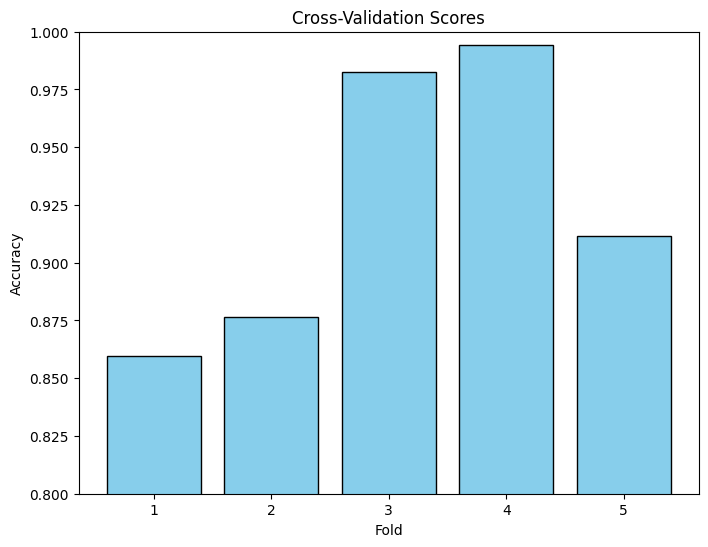

Average Cross-Validation Score: 0.9248710010319918


In [ ]:
# Perform cross-validation
scores = cross_val_score(rf_model, X_bs, Y_bs, cv=5)

# Plot Cross-Validation Scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), scores, color='skyblue', edgecolor='black')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.ylim(0.8, 1.0)
plt.xticks(range(1, 6))
plt.show()

# Print Average Score
print("Average Cross-Validation Score:", scores.mean())

In [ ]:
def evaluate_model1(predictions, true_labels, data_type="Test"):

    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    print(f"{data_type} Data Performance:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")

# Check score test and train
print("Logistic Regression:")
# Evaluate on training data
logreg_predictions_train = logreg_model.predict(X_train)  # Get predictions for training data
evaluate_model1(logreg_predictions_train, Y_train, data_type="Train")
# Evaluate on test data
evaluate_model1(logreg_predictions, Y_test, data_type="Test")

print("\nRandom Forest:")
# Evaluate on training data
rf_predictions_train = rf_model.predict(X_train)  # Get predictions for training data
evaluate_model1(rf_predictions_train, Y_train, data_type="Train")
# Evaluate on test data
evaluate_model1(rf_predictions, Y_test, data_type="Test")

Logistic Regression:
Train Data Performance:
  Accuracy: 0.9676
  Precision: 0.9773
  Recall: 0.8113
  F1 Score: 0.8866
Test Data Performance:
  Accuracy: 0.9474
  Precision: 0.8889
  Recall: 0.6957
  F1 Score: 0.7805

Random Forest:
Train Data Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
Test Data Performance:
  Accuracy: 0.9708
  Precision: 1.0000
  Recall: 0.7826
  F1 Score: 0.8780


In [ ]:
def evaluate_model2(predictions, true_labels, data_type="Test"):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
    }

# Store results
logreg_train_metrics = evaluate_model2(logreg_predictions_train, Y_train, data_type="Train")
logreg_test_metrics = evaluate_model2(logreg_predictions, Y_test, data_type="Test")
rf_train_metrics = evaluate_model2(rf_predictions_train, Y_train, data_type="Train")
rf_test_metrics = evaluate_model2(rf_predictions, Y_test, data_type="Test")

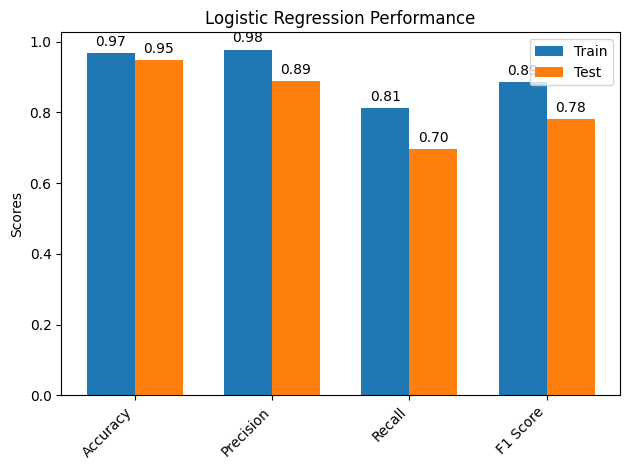

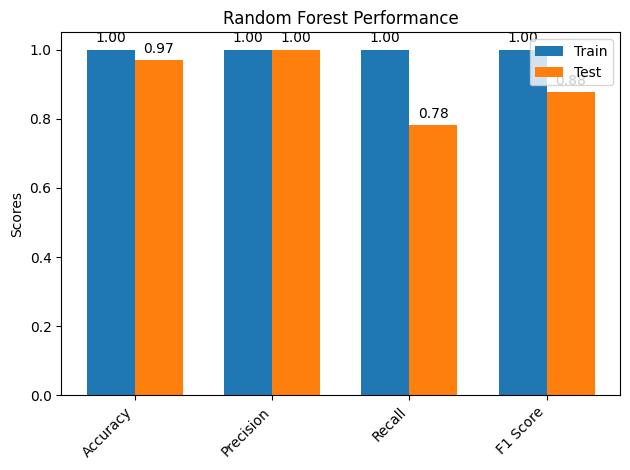

In [ ]:
# Function to create a bar chart for a single model
def plot_model_performance(model_name, train_metrics, test_metrics):
    metrics = list(train_metrics.keys())  # Get the metric names
    scores = [[train_metrics[m], test_metrics[m]] for m in metrics]

    x = np.arange(len(metrics))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, [score[0] for score in scores], width, label='Train')
    rects2 = ax.bar(x + width/2, [score[1] for score in scores], width, label='Test')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title(f'{model_name} Performance')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, rotation=45, ha='right')  # Rotate x-axis labels for better readability
    ax.legend()

    # Function to autolabel the bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)  # Add labels to Train bars
    autolabel(rects2)  # Add labels to Test bars

    fig.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

# Create separate bar charts for each model
plot_model_performance('Logistic Regression', logreg_train_metrics, logreg_test_metrics)
plot_model_performance('Random Forest', rf_train_metrics, rf_test_metrics)

In [ ]:
# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': range(2, 20, 2),
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# สร้าง GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')

# เริ่มการค้นหา
grid_search.fit(X_train, Y_train)

# แสดงผลลัพธ์
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# ใช้โมเดลที่ดีที่สุด
best_rf_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 14}
Best score: 0.9073319473319472


### Finding Features impotance

In [ ]:
# Get feature coefficients from the Logistic Regression model
coefficients = logreg_model.coef_[0]

# Create a DataFrame to store feature coefficients along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient value in descending order
feature_importances_df['Absolute_Coefficient'] = abs(feature_importances_df['Coefficient'])
feature_importances_df = feature_importances_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(10))

                                     Feature  Coefficient  \
39   Retained Earnings (Accumulated Deficit)     3.843123   
26                            Long Term Debt     2.282651   
34                            Other Payables    -1.878364   
37        Minority Interest - Non Redeemable    -1.835439   
40  Curr. Port. of LT Capital Leases, Suppl.    -1.815288   
22                                Total Debt    -1.607382   
5                               Total Assets    -1.529303   
6   Total Liabilities & Shareholders' Equity    -1.529301   
14                Additional Paid-In Capital     1.498357   
2         Accounts Receivable - Trade, Gross    -1.459308   

    Absolute_Coefficient  
39              3.843123  
26              2.282651  
34              1.878364  
37              1.835439  
40              1.815288  
22              1.607382  
5               1.529303  
6               1.529301  
14              1.498357  
2               1.459308  


In [ ]:
# Get feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(10))

                                     Feature  Importance
4                          Minority Interest    0.076996
37        Minority Interest - Non Redeemable    0.063900
35                      Total Current Assets    0.060357
7   Net Debt Incl. Pref.Stock & Min.Interest    0.055731
39   Retained Earnings (Accumulated Deficit)    0.054793
40  Curr. Port. of LT Capital Leases, Suppl.    0.054504
10          Other Current liabilities, Total    0.046312
34                            Other Payables    0.041524
17                       Common Stock, Total    0.036916
9                   Other Liabilities, Total    0.032187


## Cash-Flow Statement Normalized DataFrame (cf_df)

### Train, test model and valuation

In [ ]:
# Define features (X) and target (Y)
X_cf = cf_df_normalized.drop(columns=['Fraud','Period End Date','Company name'])  # Features: All columns except 'Fraud'
Y_cf = cf_df_normalized['Fraud']  # Target: 'Fraud' column

# Display the shapes of X and Y to confirm the split
print("Shape of X:", X_cf.shape)
print("Shape of Y:", Y_cf.shape)

Shape of X: (905, 33)
Shape of Y: (905,)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_cf, Y_cf, test_size=0.2, random_state=42)

# Display the shapes of the datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (724, 33)
Shape of X_test: (181, 33)
Shape of Y_train: (724,)
Shape of Y_test: (181,)


In [ ]:
# 1. Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# 2. Train Logistic Regression model
logreg_model.fit(X_train, Y_train)

# 3. Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 4. Train Random Forest model
rf_model.fit(X_train, Y_train)

# 5. Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# 6. Evaluate model performance
print("Logistic Regression Performance:")
evaluate_model(logreg_predictions, Y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_predictions, Y_test)

Logistic Regression Performance:
Accuracy: 0.9669
Precision: 1.0000
Recall: 0.8125
F1 Score: 0.8966

Random Forest Performance:
Accuracy: 0.9448
Precision: 1.0000
Recall: 0.6875
F1 Score: 0.8148


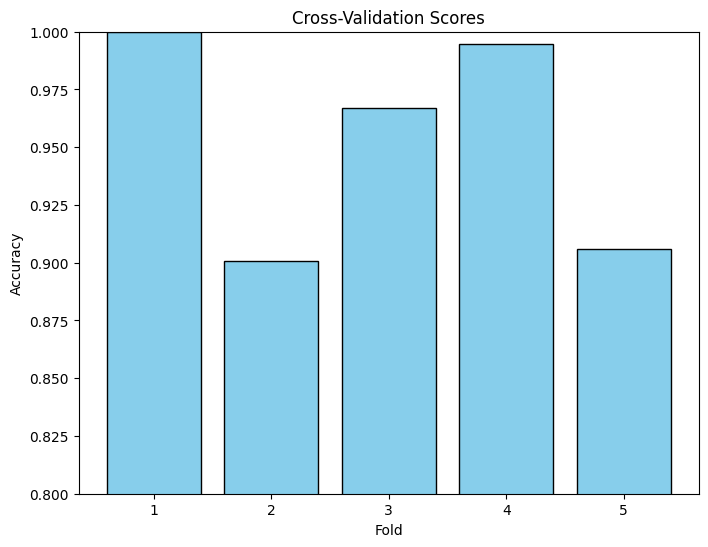

Average Cross-Validation Score: 0.9535911602209944


In [ ]:
# Perform cross-validation
scores = cross_val_score(rf_model, X_cf, Y_cf, cv=5)

# Plot Cross-Validation Scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), scores, color='skyblue', edgecolor='black')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.ylim(0.8, 1.0)
plt.xticks(range(1, 6))
plt.show()

# Print Average Score
print("Average Cross-Validation Score:", scores.mean())

In [ ]:
# Check score test and train
print("Logistic Regression:")
# Evaluate on training data
logreg_predictions_train = logreg_model.predict(X_train)  # Get predictions for training data
evaluate_model1(logreg_predictions_train, Y_train, data_type="Train")
# Evaluate on test data
evaluate_model1(logreg_predictions, Y_test, data_type="Test")

print("\nRandom Forest:")
# Evaluate on training data
rf_predictions_train = rf_model.predict(X_train)  # Get predictions for training data
evaluate_model1(rf_predictions_train, Y_train, data_type="Train")
# Evaluate on test data
evaluate_model1(rf_predictions, Y_test, data_type="Test")


Logistic Regression:
Train Data Performance:
  Accuracy: 0.9751
  Precision: 0.9780
  Recall: 0.8476
  F1 Score: 0.9082
Test Data Performance:
  Accuracy: 0.9669
  Precision: 1.0000
  Recall: 0.8125
  F1 Score: 0.8966

Random Forest:
Train Data Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
Test Data Performance:
  Accuracy: 0.9448
  Precision: 1.0000
  Recall: 0.6875
  F1 Score: 0.8148


In [ ]:
# Store results
logreg_train_metrics = evaluate_model2(logreg_predictions_train, Y_train, data_type="Train")
logreg_test_metrics = evaluate_model2(logreg_predictions, Y_test, data_type="Test")
rf_train_metrics = evaluate_model2(rf_predictions_train, Y_train, data_type="Train")
rf_test_metrics = evaluate_model2(rf_predictions, Y_test, data_type="Test")

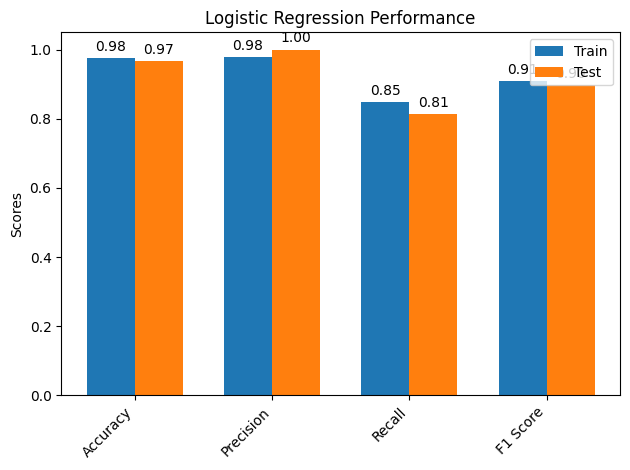

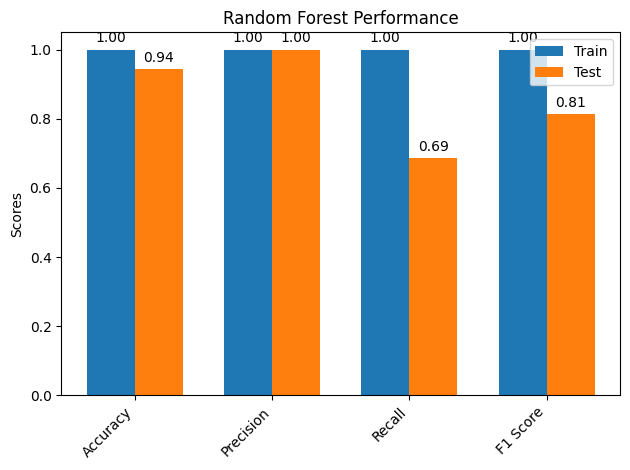

In [ ]:
# Create separate bar charts for each model
plot_model_performance('Logistic Regression', logreg_train_metrics, logreg_test_metrics)
plot_model_performance('Random Forest', rf_train_metrics, rf_test_metrics)

In [ ]:
# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': range(2, 20, 2),
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# สร้าง GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')

# เริ่มการค้นหา
grid_search.fit(X_train, Y_train)

# แสดงผลลัพธ์
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# ใช้โมเดลที่ดีที่สุด
best_rf_model = grid_search.best_estimator_

Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 18}
Best score: 0.8811511106247949


### Finding Features impotance

In [ ]:
# Get feature coefficients from the Logistic Regression model
coefficients = logreg_model.coef_[0]

# Create a DataFrame to store feature coefficients along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient value in descending order
feature_importances_df['Absolute_Coefficient'] = abs(feature_importances_df['Coefficient'])
feature_importances_df = feature_importances_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(10))

                                   Feature  Coefficient  Absolute_Coefficient
1                 Net Income/Starting Line     3.048152              3.048152
16                            Other Assets     2.604460              2.604460
18   Lease liability Reduced, Supplemental    -2.603353              2.603353
32                           Unusual Items     2.402014              2.402014
22          Net Changes in Working Capital     2.055454              2.055454
19                     Accounts Receivable     1.994071              1.994071
20              Changes in Working Capital     1.792712              1.792712
15  Other Investing Cash Flow Items, Total     1.367673              1.367673
10             Sale/Maturity of Investment    -1.324301              1.324301
24          Cash from Operating Activities    -1.247367              1.247367


In [ ]:
# Get feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(10))

                                  Feature  Importance
19                    Accounts Receivable    0.158065
0      Issuance (Retirement) of Debt, Net    0.094726
20             Changes in Working Capital    0.071587
2                     Long Term Debt, Net    0.061479
22         Net Changes in Working Capital    0.046497
10            Sale/Maturity of Investment    0.045476
28                   Other Non-Cash Items    0.044082
13              Net Cash - Ending Balance    0.041693
18  Lease liability Reduced, Supplemental    0.040746
9                  Depreciation/Depletion    0.034760


## Income Statement Normalized (is_df)

### Train, test model and valuation

In [ ]:
# Define features (X) and target (Y)
X_is = is_df_normalized.drop(columns=['Fraud','Period End Date','Company name'])  # Features: All columns except 'Fraud'
Y_is = is_df_normalized['Fraud']  # Target: 'Fraud' column

# Display the shapes of X and Y to confirm the split
print("Shape of X:", X_is.shape)
print("Shape of Y:", Y_is.shape)

Shape of X: (908, 37)
Shape of Y: (908,)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_is, Y_is, test_size=0.2, random_state=42)

# Display the shapes of the datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (726, 37)
Shape of X_test: (182, 37)
Shape of Y_train: (726,)
Shape of Y_test: (182,)


In [ ]:
# 1. Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# 2. Train Logistic Regression model
logreg_model.fit(X_train, Y_train)

# 3. Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 4. Train Random Forest model
rf_model.fit(X_train, Y_train)

# 5. Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# 6. Evaluate model performance
print("Logistic Regression Performance:")
evaluate_model(logreg_predictions, Y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_predictions, Y_test)

Logistic Regression Performance:
Accuracy: 0.8901
Precision: 0.8947
Recall: 0.4857
F1 Score: 0.6296

Random Forest Performance:
Accuracy: 0.9725
Precision: 1.0000
Recall: 0.8571
F1 Score: 0.9231


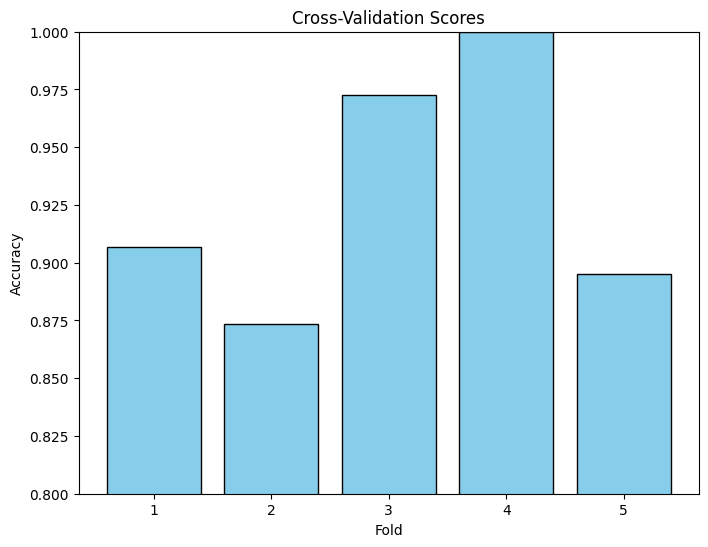

Average Cross-Validation Score: 0.929554975411329


In [ ]:
# Perform cross-validation
scores = cross_val_score(rf_model, X_is, Y_is, cv=5)

# Plot Cross-Validation Scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), scores, color='skyblue', edgecolor='black')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.ylim(0.8, 1.0)
plt.xticks(range(1, 6))
plt.show()

# Print Average Score
print("Average Cross-Validation Score:", scores.mean())

In [ ]:
# Check score test and train
print("Logistic Regression:")
# Evaluate on training data
logreg_predictions_train = logreg_model.predict(X_train)  # Get predictions for training data
evaluate_model1(logreg_predictions_train, Y_train, data_type="Train")
# Evaluate on test data
evaluate_model1(logreg_predictions, Y_test, data_type="Test")

print("\nRandom Forest:")
# Evaluate on training data
rf_predictions_train = rf_model.predict(X_train)  # Get predictions for training data
evaluate_model1(rf_predictions_train, Y_train, data_type="Train")
# Evaluate on test data
evaluate_model1(rf_predictions, Y_test, data_type="Test")

Logistic Regression:
Train Data Performance:
  Accuracy: 0.9463
  Precision: 0.9296
  Recall: 0.6600
  F1 Score: 0.7719
Test Data Performance:
  Accuracy: 0.8901
  Precision: 0.8947
  Recall: 0.4857
  F1 Score: 0.6296

Random Forest:
Train Data Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
Test Data Performance:
  Accuracy: 0.9725
  Precision: 1.0000
  Recall: 0.8571
  F1 Score: 0.9231


In [ ]:
# Store results
logreg_train_metrics = evaluate_model2(logreg_predictions_train, Y_train, data_type="Train")
logreg_test_metrics = evaluate_model2(logreg_predictions, Y_test, data_type="Test")
rf_train_metrics = evaluate_model2(rf_predictions_train, Y_train, data_type="Train")
rf_test_metrics = evaluate_model2(rf_predictions, Y_test, data_type="Test")

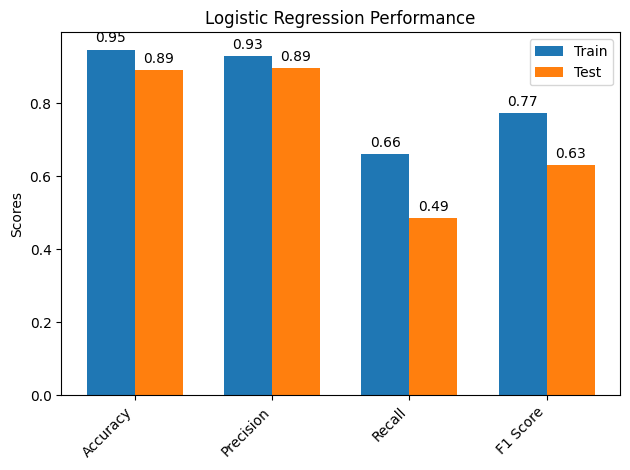

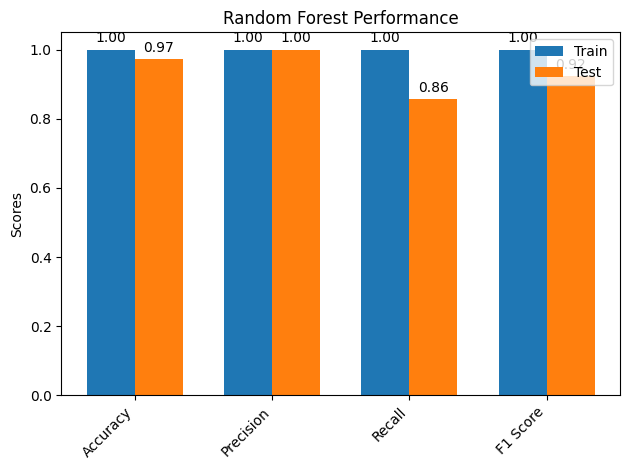

In [ ]:
# Create separate bar charts for each model
plot_model_performance('Logistic Regression', logreg_train_metrics, logreg_test_metrics)
plot_model_performance('Random Forest', rf_train_metrics, rf_test_metrics)

In [ ]:
# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': range(2, 20, 2),
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# สร้าง GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')

# เริ่มการค้นหา
grid_search.fit(X_train, Y_train)

# แสดงผลลัพธ์
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# ใช้โมเดลที่ดีที่สุด
best_rf_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 8}
Best score: 0.9359886201991465


### Finding Features impotance

In [ ]:
# Get feature coefficients from the Logistic Regression model
coefficients = logreg_model.coef_[0]

# Create a DataFrame to store feature coefficients along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient value in descending order
feature_importances_df['Absolute_Coefficient'] = abs(feature_importances_df['Coefficient'])
feature_importances_df = feature_importances_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(10))

                                    Feature  Coefficient  Absolute_Coefficient
8                                Other, Net    -5.371017              5.371017
7                         Normalized EBITDA     2.706634              2.706634
6             Inc Tax Ex Impact of Sp Items     1.663117              1.663117
13                  Total Operating Expense    -1.253544              1.253544
14     Diluted EPS Excluding ExtraOrd Items    -1.138966              1.138966
32          Other Operating Expenses, Total     1.138853              1.138853
27               Depreciation, Supplemental    -0.996430              0.996430
33                         Operating Income     0.957122              0.957122
34   Interest Inc.(Exp.),Net-Non-Op., Total     0.955427              0.955427
19  Basic EPS Excluding Extraordinary Items    -0.946326              0.946326


In [ ]:
# Get feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(10))

                                   Feature  Importance
8                               Other, Net    0.174314
24   Income Available to Com Incl ExtraOrd    0.097624
32         Other Operating Expenses, Total    0.073687
36                      Diluted Net Income    0.072411
20  Selling/General/Admin. Expenses, Total    0.061933
28           Normalized Inc. Avail to Com.    0.056591
21           Basic Weighted Average Shares    0.053398
11                  Net Income After Taxes    0.047309
9           Net Income Before Extra. Items    0.044104
3                  Net Income Before Taxes    0.039851


## Ratio-Key Metrics (ratio_df)

### Train, test model and valuation

In [ ]:
# Define features (X) and target (Y)
X_ratio = ratio_df_normalized.drop(columns=['Fraud','Period End Date','Company name'])  # Features: All columns except 'Fraud'
Y_ratio = ratio_df_normalized['Fraud']  # Target: 'Fraud' column

# Display the shapes of X and Y to confirm the split
print("Shape of X:", X_ratio.shape)
print("Shape of Y:", Y_ratio.shape)

Shape of X: (910, 23)
Shape of Y: (910,)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_ratio, Y_ratio, test_size=0.2, random_state=42)

# Display the shapes of the datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (728, 23)
Shape of X_test: (182, 23)
Shape of Y_train: (728,)
Shape of Y_test: (182,)


In [ ]:
# 1. Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# 2. Train Logistic Regression model
logreg_model.fit(X_train, Y_train)

# 3. Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 4. Train Random Forest model
rf_model.fit(X_train, Y_train)

# 5. Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# 6. Evaluate model performance
print("Logistic Regression Performance:")
evaluate_model(logreg_predictions, Y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_predictions, Y_test)

Logistic Regression Performance:
Accuracy: 0.9615
Precision: 1.0000
Recall: 0.7083
F1 Score: 0.8293

Random Forest Performance:
Accuracy: 0.9890
Precision: 1.0000
Recall: 0.9167
F1 Score: 0.9565


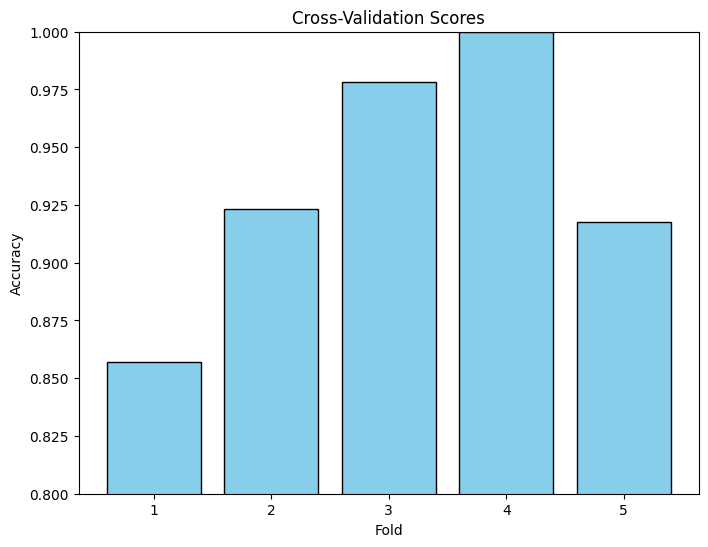

Average Cross-Validation Score: 0.9351648351648352


In [ ]:
# Perform cross-validation
scores = cross_val_score(rf_model, X_ratio, Y_ratio, cv=5)

# Plot Cross-Validation Scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), scores, color='skyblue', edgecolor='black')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.ylim(0.8, 1.0)
plt.xticks(range(1, 6))
plt.show()

# Print Average Score
print("Average Cross-Validation Score:", scores.mean())

In [ ]:
# Check score test and train
print("Logistic Regression:")
# Evaluate on training data
logreg_predictions_train = logreg_model.predict(X_train)  # Get predictions for training data
evaluate_model1(logreg_predictions_train, Y_train, data_type="Train")
# Evaluate on test data
evaluate_model1(logreg_predictions, Y_test, data_type="Test")

print("\nRandom Forest:")
# Evaluate on training data
rf_predictions_train = rf_model.predict(X_train)  # Get predictions for training data
evaluate_model1(rf_predictions_train, Y_train, data_type="Train")
# Evaluate on test data
evaluate_model1(rf_predictions, Y_test, data_type="Test")

Logistic Regression:
Train Data Performance:
  Accuracy: 0.9505
  Precision: 0.9756
  Recall: 0.7018
  F1 Score: 0.8163
Test Data Performance:
  Accuracy: 0.9615
  Precision: 1.0000
  Recall: 0.7083
  F1 Score: 0.8293

Random Forest:
Train Data Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
Test Data Performance:
  Accuracy: 0.9890
  Precision: 1.0000
  Recall: 0.9167
  F1 Score: 0.9565


In [ ]:
# Store results
logreg_train_metrics = evaluate_model2(logreg_predictions_train, Y_train, data_type="Train")
logreg_test_metrics = evaluate_model2(logreg_predictions, Y_test, data_type="Test")
rf_train_metrics = evaluate_model2(rf_predictions_train, Y_train, data_type="Train")
rf_test_metrics = evaluate_model2(rf_predictions, Y_test, data_type="Test")

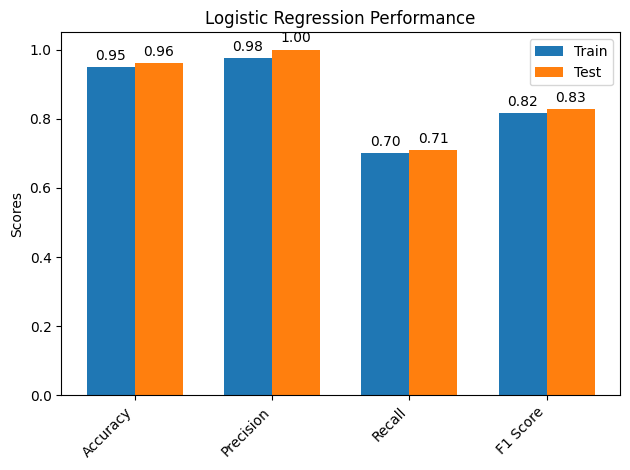

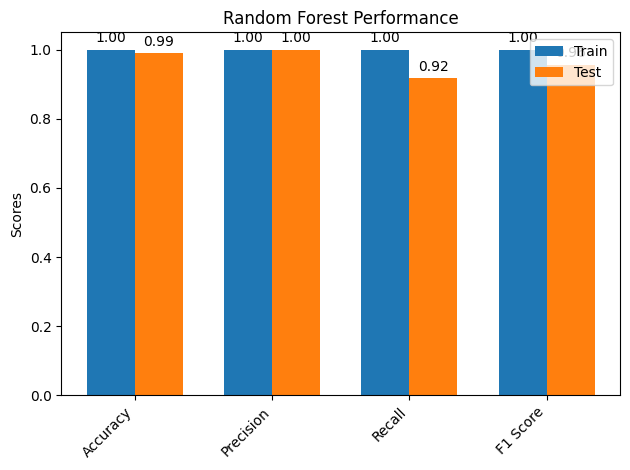

In [ ]:
# Create separate bar charts for each model
plot_model_performance('Logistic Regression', logreg_train_metrics, logreg_test_metrics)
plot_model_performance('Random Forest', rf_train_metrics, rf_test_metrics)

In [ ]:
# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators':  range(2, 20, 2),
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# สร้าง GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')

# เริ่มการค้นหา
grid_search.fit(X_train, Y_train)

# แสดงผลลัพธ์
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# ใช้โมเดลที่ดีที่สุด
best_rf_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 18}
Best score: 0.9336887880506712


### Finding Features importance

In [ ]:
# Get feature coefficients from the Logistic Regression model
coefficients = logreg_model.coef_[0]

# Create a DataFrame to store feature coefficients along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient value in descending order
feature_importances_df['Absolute_Coefficient'] = abs(feature_importances_df['Coefficient'])
feature_importances_df = feature_importances_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(10))

                  Feature  Coefficient  Absolute_Coefficient
17             Pretax ROA    -4.686737              4.686737
10                    ROE     3.228335              3.228335
11  Times Interest Earned     3.096309              3.096309
0              Pretax ROE     2.714419              2.714419
18         Asset Turnover    -2.464797              2.464797
22          EBITDA Margin     2.080434              2.080434
8      Effective Tax Rate     1.707730              1.707730
13            Quick Ratio    -1.401423              1.401423
20       x Tax Complement     1.207033              1.207033
2       Reinvestment Rate    -1.188965              1.188965


In [ ]:
# Get feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(10))

                  Feature  Importance
18         Asset Turnover    0.106714
0              Pretax ROE    0.089660
10                    ROE    0.084031
14      Cash Cycle (Days)    0.082329
11  Times Interest Earned    0.079690
2       Reinvestment Rate    0.071070
17             Pretax ROA    0.068875
20       x Tax Complement    0.066901
8      Effective Tax Rate    0.061261
22          EBITDA Margin    0.057783


## Top 3 Features with Price

### Create DataFrame

In [ ]:
bs_df_x = pd.DataFrame(bs_df_normalized[['Period End Date',
                                         'Retained Earnings (Accumulated Deficit)', 'Long Term Debt', 'Other Payables',
                                         'Minority Interest - Non Redeemable', 'Minority Interest',
                                         'Company name','Fraud']])

cf_df_x = pd.DataFrame(cf_df_normalized[['Period End Date',
                                         'Net Income/Starting Line', 'Other Assets', 'Lease liability Reduced, Supplemental',
                                         'Changes in Working Capital', 'Net Changes in Working Capital', 'Issuance (Retirement) of Debt, Net',
                                         'Company name', 'Fraud']])

is_df_x = pd.DataFrame(is_df_normalized[['Period End Date',
                                         'Other, Net', 'Normalized EBITDA', 'Inc Tax Ex Impact of Sp Items',
                                         'Other Operating Expenses, Total', 'Total Operating Expense',
                                         'Company name', 'Fraud']])

ratio_df_x = pd.DataFrame(ratio_df_normalized[['Period End Date',
                                               'Pretax ROA', 'ROE', 'Times Interest Earned',
                                               'Asset Turnover',
                                               'Company name', 'Fraud']])

ph_df_x = pd.DataFrame(ph_df_normalized[['Exchange Date','Close','Company name','Fraud']]) # Changed pd.df to pd.DataFrame

In [ ]:
print(bs_df_x.shape)
print(is_df_x.shape)
print(cf_df_x.shape)
print(ratio_df_x.shape)
print(ph_df_x.shape)

(851, 8)
(908, 8)
(905, 9)
(910, 7)
(51797, 4)


In [ ]:
# Renaming 'Exchange Date' to 'Period End Date'
ph_df_x = ph_df_x.rename(columns={'Exchange Date': 'Period End Date'})
ph_df_x.head()

,Period End Date,Close,Company name,Fraud
0,2014-09-26,0.75,AKR,0
1,2014-09-27,0.75,AKR,0
2,2014-09-28,0.75,AKR,0
3,2014-09-29,0.75,AKR,0
4,2014-09-30,0.75,AKR,0


In [ ]:
# Merge the DataFrames sequentially using 'outer' join
merged_df = pd.merge(bs_df_x, is_df_x, on=['Period End Date', 'Company name', 'Fraud'], how='outer')
merged_df = pd.merge(merged_df, cf_df_x, on=['Period End Date', 'Company name', 'Fraud'], how='outer')
merged_df = pd.merge(merged_df, ratio_df_x, on=['Period End Date', 'Company name', 'Fraud'], how='outer')
merged_df = pd.merge(merged_df, ph_df_x, on=['Period End Date', 'Company name', 'Fraud'], how='outer')

# Fill NaN values with blank strings
merged_df = merged_df.fillna('')

In [ ]:
print(merged_df["Company name"].unique())
print(len(merged_df["Company name"].unique()))

['LNE' 'SPCG' 'STARK' 'SUPER' 'AKR' 'TRTm' 'EA' 'TMIm' 'CKP' 'SCI' 'BCPG'
 'TPIPP' 'CPT' 'SSP' 'ACE' 'ETC' 'TGE' 'BBGI']
18


In [ ]:
cols = list(merged_df.columns)

# Move 'Company name' and 'Fraud' to the end
cols.remove('Company name')
cols.remove('Fraud')
cols.extend(['Company name', 'Fraud'])

# Reorder the DataFrame columns
merged_df = merged_df[cols]

In [ ]:
merged_df

,Period End Date,Retained Earnings (Accumulated Deficit),Long Term Debt,Other Payables,Minority Interest - Non Redeemable,Minority Interest,"Other, Net",Normalized EBITDA,Inc Tax Ex Impact of Sp Items,"Other Operating Expenses, Total",...,Changes in Working Capital,Net Changes in Working Capital,"Issuance (Retirement) of Debt, Net",Pretax ROA,ROE,Times Interest Earned,Asset Turnover,Close,Company name,Fraud
0,2003-03-01,,,,,,,,,,...,,,,0.660714,0.640625,0.232,0.84375,,LNE,0
1,2003-03-31,,,,,,0.221172,0.344362,0.271767,0.614077,...,,,,,,,,,LNE,0
2,2003-06-01,,,,,,,,,,...,,,,0.660714,0.640625,0.352,0.84375,,LNE,0
3,2003-06-30,,,,,,0.280566,0.099116,0.347667,0.778984,...,0.523479,0.481172,0.452877,,,,,,LNE,0
4,2003-09-01,,,,,,,,,,...,,,,0.660714,0.640625,0.456,0.84375,,LNE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52522,2024-09-27,,,,,,,,,,...,,,,,,,,0.032864,SUPER,0
52523,2024-09-27,,,,,,,,,,...,,,,,,,,0.506173,TGE,0
52524,2024-09-27,,,,,,,,,,...,,,,,,,,0.585034,TMIm,0
52525,2024-09-27,,,,,,,,,,...,,,,,,,,0.061372,TPIPP,0


In [ ]:
merged_df = merged_df.replace('', np.nan)

<ipython-input-185-76aad9d960e2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df = merged_df.replace('', np.nan)


In [ ]:
# กำหนดคอลัมน์ที่ใช้จัดกลุ่ม
group_cols = ['Company name', 'Fraud']

# จัดกลุ่ม DataFrame
grouped = merged_df.groupby(group_cols)

# เติม NaN ด้วย ffill และ bfill ภายในแต่ละกลุ่ม
merged_df = grouped.apply(lambda x: x.ffill().bfill())

# รีเซ็ต index
merged_df = merged_df.reset_index(drop=True)

<ipython-input-186-a4068c09767d>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged_df = grouped.apply(lambda x: x.ffill().bfill())


In [ ]:
merged_df

,Period End Date,Retained Earnings (Accumulated Deficit),Long Term Debt,Other Payables,Minority Interest - Non Redeemable,Minority Interest,"Other, Net",Normalized EBITDA,Inc Tax Ex Impact of Sp Items,"Other Operating Expenses, Total",...,Changes in Working Capital,Net Changes in Working Capital,"Issuance (Retirement) of Debt, Net",Pretax ROA,ROE,Times Interest Earned,Asset Turnover,Close,Company name,Fraud
0,2018-03-01,0.0,0.733456,0.084028,0.463111,0.463111,0.864062,0.168822,0.000000,0.864062,...,0.795964,0.730505,0.839621,0.052632,0.232558,0.000000,0.500000,0.901538,ACE,0
1,2018-03-31,0.0,0.733456,0.084028,0.463111,0.463111,0.864062,0.168822,0.000000,0.864062,...,0.795964,0.730505,0.839621,0.052632,0.232558,0.000000,0.500000,0.901538,ACE,0
2,2018-06-01,0.0,0.733456,0.084028,0.463111,0.463111,0.864062,0.168822,0.000000,0.864062,...,0.795964,0.730505,0.839621,0.052632,0.232558,0.000000,0.500000,0.901538,ACE,0
3,2018-06-30,0.0,0.733456,0.084028,0.463111,0.463111,0.785630,0.167555,0.654053,0.785630,...,0.759265,0.693521,0.800278,0.052632,0.232558,0.000000,0.500000,0.901538,ACE,0
4,2018-09-01,0.0,0.733456,0.084028,0.463111,0.463111,0.785630,0.167555,0.654053,0.785630,...,0.759265,0.693521,0.800278,0.052632,0.232558,0.000000,0.500000,0.901538,ACE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52522,2024-09-23,1.0,0.248654,0.876496,0.000512,0.000512,0.306761,0.914274,0.646758,0.320060,...,0.000000,0.000000,0.438928,0.524476,0.589623,0.581227,0.302326,0.387868,TRTm,0
52523,2024-09-24,1.0,0.248654,0.876496,0.000512,0.000512,0.306761,0.914274,0.646758,0.320060,...,0.000000,0.000000,0.438928,0.524476,0.589623,0.581227,0.302326,0.387868,TRTm,0
52524,2024-09-25,1.0,0.248654,0.876496,0.000512,0.000512,0.306761,0.914274,0.646758,0.320060,...,0.000000,0.000000,0.438928,0.524476,0.589623,0.581227,0.302326,0.387868,TRTm,0
52525,2024-09-26,1.0,0.248654,0.876496,0.000512,0.000512,0.306761,0.914274,0.646758,0.320060,...,0.000000,0.000000,0.438928,0.524476,0.589623,0.581227,0.302326,0.387868,TRTm,0


### With Price

In [ ]:
# Define the save path
save_path = '/content/drive/MyDrive/EC439/merged_df.csv'

# Ensure the directory exists (create if necessary)
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the DataFrame to CSV
merged_df.to_csv(save_path, index=False)

#### Train, test model and valuation

In [ ]:
# Separate features (X) and target (Y)
X_merged = merged_df.drop(columns=['Fraud', 'Period End Date','Company name'])  # All columns except 'Fraud'
Y_merged = merged_df['Fraud']  # Only the 'Fraud' column

# Display the shapes of X and Y to confirm the split
print("Shape of X:", X_merged.shape)
print("Shape of Y:", Y_merged.shape)

Shape of X: (52527, 21)
Shape of Y: (52527,)


In [ ]:
# Split the data into training and testing sets
# Typically, 80% for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X_merged, Y_merged, test_size=0.2, random_state=42)

# Display the shapes of the datasets to confirm the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (42021, 21)
Shape of X_test: (10506, 21)
Shape of Y_train: (42021,)
Shape of Y_test: (10506,)


In [ ]:
# 1. Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# 2. Train Logistic Regression model
logreg_model.fit(X_train, Y_train)

# 3. Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 4. Train Random Forest model
rf_model.fit(X_train, Y_train)

# 5. Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# 6. Evaluate model performance
print("Logistic Regression Performance:")
evaluate_model(logreg_predictions, Y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_predictions, Y_test)

Logistic Regression Performance:
Accuracy: 0.9839
Precision: 0.9590
Recall: 0.9262
F1 Score: 0.9423

Random Forest Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


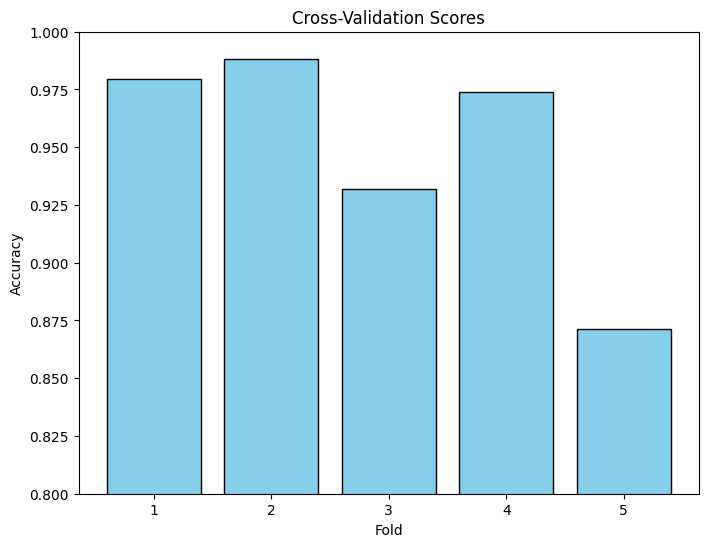

Average Cross-Validation Score: 0.9489772866582529


In [ ]:
# Perform cross-validation
scores = cross_val_score(rf_model, X_merged, Y_merged, cv=5)

# Plot Cross-Validation Scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), scores, color='skyblue', edgecolor='black')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.ylim(0.8, 1.0)
plt.xticks(range(1, 6))
plt.show()

# Print Average Score
print("Average Cross-Validation Score:", scores.mean())

In [ ]:
# Check score test and train
print("Logistic Regression:")
# Evaluate on training data
logreg_predictions_train = logreg_model.predict(X_train)  # Get predictions for training data
evaluate_model1(logreg_predictions_train, Y_train, data_type="Train")
# Evaluate on test data
evaluate_model1(logreg_predictions, Y_test, data_type="Test")

print("\nRandom Forest:")
# Evaluate on training data
rf_predictions_train = rf_model.predict(X_train)  # Get predictions for training data
evaluate_model1(rf_predictions_train, Y_train, data_type="Train")
# Evaluate on test data
evaluate_model1(rf_predictions, Y_test, data_type="Test")

Logistic Regression:
Train Data Performance:
  Accuracy: 0.9833
  Precision: 0.9568
  Recall: 0.9235
  F1 Score: 0.9398
Test Data Performance:
  Accuracy: 0.9839
  Precision: 0.9590
  Recall: 0.9262
  F1 Score: 0.9423

Random Forest:
Train Data Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
Test Data Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000


In [ ]:
# Store results
logreg_train_metrics = evaluate_model2(logreg_predictions_train, Y_train, data_type="Train")
logreg_test_metrics = evaluate_model2(logreg_predictions, Y_test, data_type="Test")
rf_train_metrics = evaluate_model2(rf_predictions_train, Y_train, data_type="Train")
rf_test_metrics = evaluate_model2(rf_predictions, Y_test, data_type="Test")

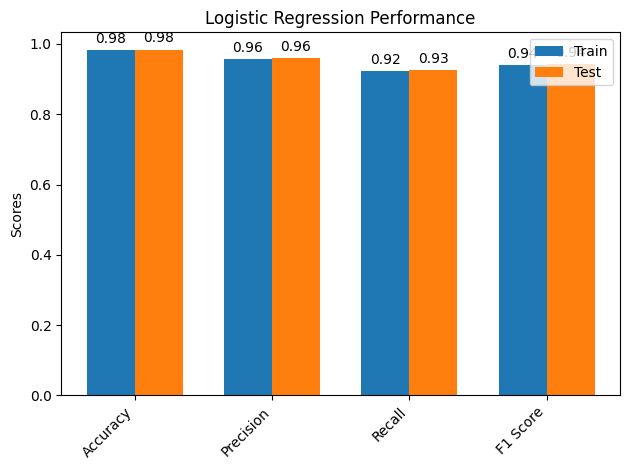

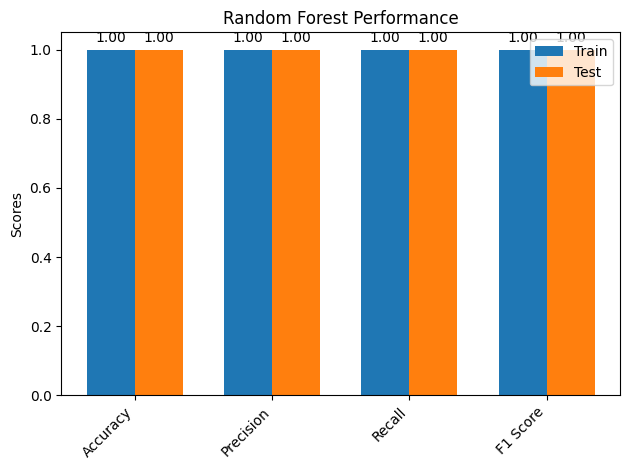

In [ ]:
# Create separate bar charts for each model
plot_model_performance('Logistic Regression', logreg_train_metrics, logreg_test_metrics)
plot_model_performance('Random Forest', rf_train_metrics, rf_test_metrics)

In [ ]:
# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': range(2, 20, 2),
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# สร้าง GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')

# เริ่มการค้นหา
grid_search.fit(X_train, Y_train)

# แสดงผลลัพธ์
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# ใช้โมเดลที่ดีที่สุด
best_rf_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 4}
Best score: 1.0


#### Finding Features importance

In [ ]:
# Get feature coefficients from the Logistic Regression model
coefficients = logreg_model.coef_[0]

# Create a DataFrame to store feature coefficients along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient value in descending order
feature_importances_df['Absolute_Coefficient'] = abs(feature_importances_df['Coefficient'])
feature_importances_df = feature_importances_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(24))

                                    Feature  Coefficient  Absolute_Coefficient
16                               Pretax ROA   -19.565968             19.565968
17                                      ROE    18.315308             18.315308
5                                Other, Net    -6.619273              6.619273
11                             Other Assets     5.087376              5.087376
13               Changes in Working Capital     4.416327              4.416327
18                    Times Interest Earned     3.697296              3.697296
8           Other Operating Expenses, Total     3.227230              3.227230
7             Inc Tax Ex Impact of Sp Items     3.186754              3.186754
14           Net Changes in Working Capital    -3.126576              3.126576
4                         Minority Interest    -3.105136              3.105136
12    Lease liability Reduced, Supplemental    -2.813632              2.813632
1                            Long Term Debt     2.25

In [ ]:
# Get feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(25))

                                    Feature  Importance
5                                Other, Net    0.303896
8           Other Operating Expenses, Total    0.163865
19                           Asset Turnover    0.099335
14           Net Changes in Working Capital    0.076027
2                            Other Payables    0.065055
3        Minority Interest - Non Redeemable    0.041126
12    Lease liability Reduced, Supplemental    0.036629
1                            Long Term Debt    0.034441
18                    Times Interest Earned    0.033373
6                         Normalized EBITDA    0.030905
0   Retained Earnings (Accumulated Deficit)    0.030696
17                                      ROE    0.025559
16                               Pretax ROA    0.025482
10                 Net Income/Starting Line    0.009770
20                                    Close    0.005961
9                   Total Operating Expense    0.005377
15       Issuance (Retirement) of Debt, Net    0

### Without Price

In [ ]:
merged_df_noprice = merged_df.drop(columns=['Close'])
merged_df_noprice.head()

,Period End Date,Retained Earnings (Accumulated Deficit),Long Term Debt,Other Payables,Minority Interest - Non Redeemable,Minority Interest,"Other, Net",Normalized EBITDA,Inc Tax Ex Impact of Sp Items,"Other Operating Expenses, Total",...,"Lease liability Reduced, Supplemental",Changes in Working Capital,Net Changes in Working Capital,"Issuance (Retirement) of Debt, Net",Pretax ROA,ROE,Times Interest Earned,Asset Turnover,Company name,Fraud
0,2018-03-01,0.0,0.733456,0.084028,0.463111,0.463111,0.864062,0.168822,0.000000,0.864062,...,0.68924,0.795964,0.730505,0.839621,0.052632,0.232558,0.0,0.5,ACE,0
1,2018-03-31,0.0,0.733456,0.084028,0.463111,0.463111,0.864062,0.168822,0.000000,0.864062,...,0.68924,0.795964,0.730505,0.839621,0.052632,0.232558,0.0,0.5,ACE,0
2,2018-06-01,0.0,0.733456,0.084028,0.463111,0.463111,0.864062,0.168822,0.000000,0.864062,...,0.68924,0.795964,0.730505,0.839621,0.052632,0.232558,0.0,0.5,ACE,0
3,2018-06-30,0.0,0.733456,0.084028,0.463111,0.463111,0.785630,0.167555,0.654053,0.785630,...,0.68924,0.759265,0.693521,0.800278,0.052632,0.232558,0.0,0.5,ACE,0
4,2018-09-01,0.0,0.733456,0.084028,0.463111,0.463111,0.785630,0.167555,0.654053,0.785630,...,0.68924,0.759265,0.693521,0.800278,0.052632,0.232558,0.0,0.5,ACE,0


In [ ]:
# Define the save path
save_path = '/content/drive/MyDrive/EC439/merged_df_noprice.csv'

# Ensure the directory exists (create if necessary)
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the DataFrame to CSV
merged_df_noprice.to_csv(save_path, index=False)

#### Train, test model and valuation

In [ ]:
# Separate features (X) and target (Y)
X_merged_noprice = merged_df_noprice.drop(columns=['Fraud', 'Period End Date','Company name'])  # All columns except 'Fraud'
Y_merged_noprice= merged_df_noprice['Fraud']  # Only the 'Fraud' column

# Display the shapes of X and Y to confirm the split
print("Shape of X:", X_merged_noprice.shape)
print("Shape of Y:", Y_merged_noprice.shape)

Shape of X: (52527, 20)
Shape of Y: (52527,)


In [ ]:
# Split the data into training and testing sets
# Typically, 80% for training and 20% for testing
X_train_noprice, X_test_noprice, Y_train_noprice, Y_test_noprice = train_test_split(X_merged_noprice, Y_merged_noprice, test_size=0.2, random_state=42)

# Display the shapes of the datasets to confirm the split
print("Shape of X_train_noprice:", X_train_noprice.shape)
print("Shape of X_test_noprice:", X_test_noprice.shape)
print("Shape of Y_train_noprice:", Y_train_noprice.shape)
print("Shape of Y_test_noprice:", Y_test_noprice.shape)

Shape of X_train_noprice: (42021, 20)
Shape of X_test_noprice: (10506, 20)
Shape of Y_train_noprice: (42021,)
Shape of Y_test_noprice: (10506,)


In [ ]:
# 1. Create Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# 2. Train Logistic Regression model
logreg_model.fit(X_train_noprice, Y_train_noprice)

# 3. Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 4. Train Random Forest model
rf_model.fit(X_train_noprice, Y_train_noprice)

# 5. Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test_noprice)
rf_predictions = rf_model.predict(X_test_noprice)

# 6. Evaluate model performance
print("Logistic Regression Performance:")
evaluate_model(logreg_predictions, Y_test_noprice)

print("\nRandom Forest Performance:")
evaluate_model(rf_predictions, Y_test_noprice)

Logistic Regression Performance:
Accuracy: 0.9861
Precision: 0.9752
Recall: 0.9255
F1 Score: 0.9497

Random Forest Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


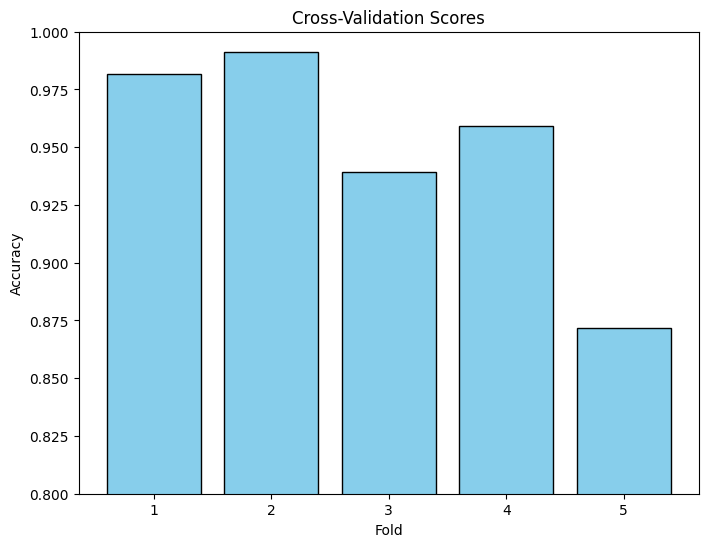

Average Cross-Validation Score: 0.9486725737646526


In [ ]:
# Perform cross-validation
scores = cross_val_score(rf_model, X_merged_noprice, Y_merged_noprice, cv=5)

# Plot Cross-Validation Scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), scores, color='skyblue', edgecolor='black')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.ylim(0.8, 1.0)
plt.xticks(range(1, 6))
plt.show()

# Print Average Score
print("Average Cross-Validation Score:", scores.mean())

In [ ]:
# Check score test and train
print("Logistic Regression:")
# Evaluate on training data
logreg_predictions_train = logreg_model.predict(X_train_noprice)  # Get predictions for training data
evaluate_model1(logreg_predictions_train, Y_train_noprice, data_type="Train")
# Evaluate on test data
evaluate_model1(logreg_predictions, Y_test_noprice, data_type="Test")

print("\nRandom Forest:")
# Evaluate on training data
rf_predictions_train = rf_model.predict(X_train_noprice)  # Get predictions for training data
evaluate_model1(rf_predictions_train, Y_train_noprice, data_type="Train")
# Evaluate on test data
evaluate_model1(rf_predictions, Y_test_noprice, data_type="Test")

Logistic Regression:
Train Data Performance:
  Accuracy: 0.9849
  Precision: 0.9681
  Recall: 0.9236
  F1 Score: 0.9453
Test Data Performance:
  Accuracy: 0.9861
  Precision: 0.9752
  Recall: 0.9255
  F1 Score: 0.9497

Random Forest:
Train Data Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
Test Data Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000


In [ ]:
# Store results
logreg_train_metrics = evaluate_model2(logreg_predictions_train, Y_train_noprice, data_type="Train")
logreg_test_metrics = evaluate_model2(logreg_predictions, Y_test_noprice, data_type="Test")
rf_train_metrics = evaluate_model2(rf_predictions_train, Y_train_noprice, data_type="Train")
rf_test_metrics = evaluate_model2(rf_predictions, Y_test_noprice, data_type="Test")

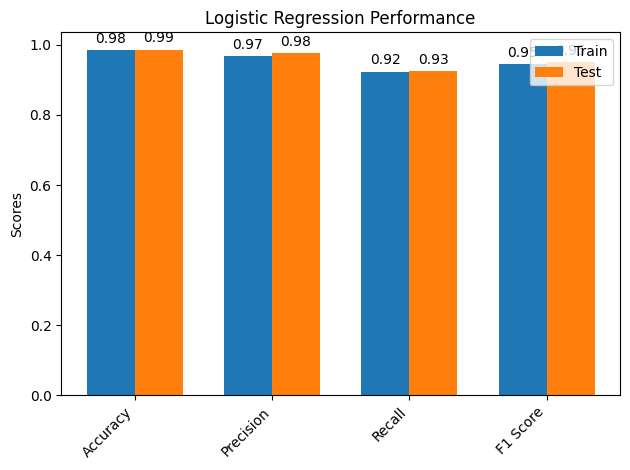

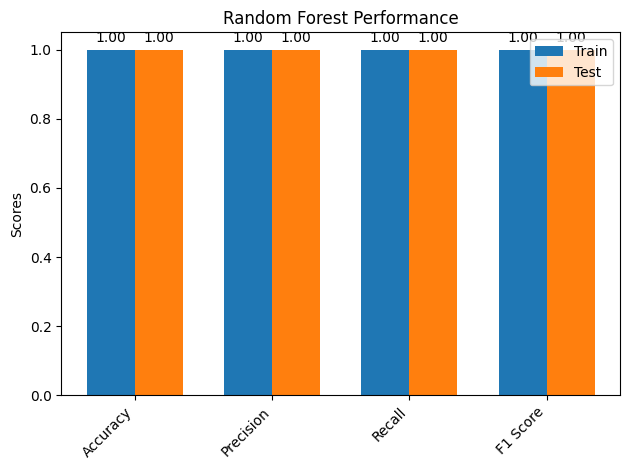

In [ ]:
# Create separate bar charts for each model
plot_model_performance('Logistic Regression', logreg_train_metrics, logreg_test_metrics)
plot_model_performance('Random Forest', rf_train_metrics, rf_test_metrics)

In [ ]:
# กำหนดพารามิเตอร์ที่ต้องการทดสอบ
param_grid = {
    'n_estimators': range(2, 20, 2),
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# สร้าง GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')

# เริ่มการค้นหา
grid_search.fit(X_train_noprice, Y_train_noprice)

# แสดงผลลัพธ์
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# ใช้โมเดลที่ดีที่สุด
best_rf_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}
Best score: 1.0


#### Finding Features importance

In [ ]:
# Get feature coefficients from the Logistic Regression model
coefficients = logreg_model.coef_[0]

# Create a DataFrame to store feature coefficients along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train_noprice.columns, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient value in descending order
feature_importances_df['Absolute_Coefficient'] = abs(feature_importances_df['Coefficient'])
feature_importances_df = feature_importances_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(24))

                                    Feature  Coefficient  Absolute_Coefficient
16                               Pretax ROA   -19.539314             19.539314
17                                      ROE    18.693615             18.693615
5                                Other, Net    -6.546091              6.546091
11                             Other Assets     5.167174              5.167174
13               Changes in Working Capital     4.650499              4.650499
18                    Times Interest Earned     3.636727              3.636727
8           Other Operating Expenses, Total     3.323447              3.323447
14           Net Changes in Working Capital    -3.318248              3.318248
7             Inc Tax Ex Impact of Sp Items     3.226638              3.226638
12    Lease liability Reduced, Supplemental    -2.641305              2.641305
4                         Minority Interest    -2.620326              2.620326
1                            Long Term Debt     2.35

In [ ]:
# Get feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances along with their names
feature_importances_df = pd.DataFrame({'Feature': X_train_noprice.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the top N important features (e.g., top 10)
print(feature_importances_df.head(25))

                                    Feature  Importance
5                                Other, Net    0.183847
8           Other Operating Expenses, Total    0.151875
19                           Asset Turnover    0.141930
17                                      ROE    0.075885
3        Minority Interest - Non Redeemable    0.048680
18                    Times Interest Earned    0.041376
4                         Minority Interest    0.038468
2                            Other Payables    0.037701
7             Inc Tax Ex Impact of Sp Items    0.037321
13               Changes in Working Capital    0.036902
15       Issuance (Retirement) of Debt, Net    0.036741
14           Net Changes in Working Capital    0.026137
1                            Long Term Debt    0.024349
11                             Other Assets    0.021880
16                               Pretax ROA    0.021009
9                   Total Operating Expense    0.020423
10                 Net Income/Starting Line    0